# Étape 1  Projet d'analyse turnover dans l'entrepise ESN TechNova


## Setup

### Install dependencies


dependencies are installed through the pyproject.toml file


### Loading source files

In [2]:
# Loading extrait_sirh.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

sirh = pd.read_csv('source/extrait_sirh.csv')
eval = pd.read_csv('source/extrait_eval.csv')
sondage = pd.read_csv('source/extrait_sondage.csv')

sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [3]:
sirh.head(5)

id_employee  age genre  revenu_mensuel statut_marital departement  \
0            1   41     F            5993    Célibataire  Commercial   
1            2   49     M            5130       Marié(e)  Consulting   
2            4   37     M            2090    Célibataire  Consulting   
3            5   33     F            2909       Marié(e)  Consulting   
4            7   27     M            3468       Marié(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   nombre_heures_travailless  annee_experience_totale  \
0                         80                        8   
1                         80                       10   
2                         80                        7   
3                         80                        8   
4                         80                        6   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  
0                         6                            4  
1                        10                            7  
2                         0                            0  
3                         8                            7  
4                         2                            2

In [4]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [5]:
eval.head(5)

satisfaction_employee_environnement  note_evaluation_precedente  \
0                                    2                           3   
1                                    3                           2   
2                                    4                           2   
3                                    4                           3   
4                                    1                           3   

   niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                          2                                     4   
1                          2                                     2   
2                          1                                     3   
3                          1                                     3   
4                          1                                     2   

   satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                             1                                          1   
1                             4                                          3   
2                             2                                          3   
3                             3                                          3   
4                             4                                          3   

  eval_number  note_evaluation_actuelle heure_supplementaires  \
0         E_1                         3                   Oui   
1         E_2                         4                   Non   
2         E_4                         3                   Oui   
3         E_5                         3                   Oui   
4         E_7                         3                   Non   

  augementation_salaire_precedente  
0                             11 %  
1                             23 %  
2                             15 %  
3                             11 %  
4                             12 %

In [6]:
sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

In [7]:
sondage.head(5)

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                   Oui                         0                      0   
1                   Non                         1                      3   
2                   Oui                         0                      3   
3                   Non                         0                      3   
4                   Non                         1                      3   

   nombre_employee_sous_responsabilite  code_sondage  \
0                                    1             1   
1                                    1             2   
2                                    1             4   
3                                    1             5   
4                                    1             7   

   distance_domicile_travail  niveau_education            domaine_etude  \
0                          1                 2            Infra & Cloud   
1                          8                 1            Infra & Cloud   
2                          2                 2                    Autre   
3                          3                 4            Infra & Cloud   
4                          2                 1  Transformation Digitale   

  ayant_enfants frequence_deplacement  annees_depuis_la_derniere_promotion  \
0             Y           Occasionnel                                    0   
1             Y              Frequent                                    1   
2             Y           Occasionnel                                    0   
3             Y              Frequent                                    3   
4             Y           Occasionnel                                    2   

   annes_sous_responsable_actuel  
0                              5  
1                              7  
2                              0  
3                              0  
4                              2

## Jointure des données

In [8]:
eval['eval_number'] = eval['eval_number'].apply(lambda x: int(x.strip().split('_')[1]))

In [9]:
# Jointure sirh + eval basé sur l'ordre cohérent des lignes
merged_data = sirh.merge(eval, left_on='id_employee', right_on='eval_number', how='inner')
# Jointure sirh + eval +  sondage
merged_data = merged_data.merge(sondage, left_on='id_employee', right_on='code_sondage', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

In [10]:
def merge_and_report(sirh, eval_df, sondage, show=True):
    """
    Joint sirh, eval, sondage en sécurisant la colonne eval_number et renvoie (merged, report).
    report contient shapes et pourcentages de perte.
    """
    # safe parse eval_number
    eval_copy = eval_df.copy()
    if 'eval_number' in eval_copy.columns and eval_copy['eval_number'].dtype == object:
        eval_copy['eval_number'] = eval_copy['eval_number'].apply(lambda x: int(str(x).strip().split('_')[-1]) if pd.notna(x) else x)
    before = {'sirh': len(sirh), 'eval': len(eval_df), 'sondage': len(sondage)}
    m1 = sirh.merge(eval_copy, left_on='id_employee', right_on='eval_number', how='inner')
    merged = m1.merge(sondage, left_on='id_employee', right_on='code_sondage', how='inner')
    after = {'merged': len(merged)}
    report = {'before': before, 'after': after, 'lost_rows_after_merge': before['sirh'] - after['merged']}
    if show:
        print(f"Rows before: {before}, rows after merged: {after['merged']}, lost from sirh: {report['lost_rows_after_merge']}")
    return merged, report

merged, report  = merge_and_report(sirh, eval, sondage)
print(merged.columns)
print(report)

Rows before: {'sirh': 1470, 'eval': 1470, 'sondage': 1470}, rows after merged: 1470, lost from sirh: 0
Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'nombre_heures_travailless', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'nombre_employee_sous_responsabilite', 'code_sondage',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'ayant_enfants', 'frequence_deplacement',

## Nettoyage de la data

In [11]:
data = merged_data.drop(["eval_number","code_sondage"], axis=1)
data['augementation_salaire_precedente'] = data['augementation_salaire_precedente'].apply(lambda x: int(x.strip().split('%')[0]))

In [12]:
data.select_dtypes(include='number').nunique()

id_employee                                  1470
age                                            43
revenu_mensuel                               1349
nombre_experiences_precedentes                 10
nombre_heures_travailless                       1
annee_experience_totale                        40
annees_dans_l_entreprise                       37
annees_dans_le_poste_actuel                    19
satisfaction_employee_environnement             4
note_evaluation_precedente                      4
niveau_hierarchique_poste                       5
satisfaction_employee_nature_travail            4
satisfaction_employee_equipe                    4
satisfaction_employee_equilibre_pro_perso       4
note_evaluation_actuelle                        2
augementation_salaire_precedente               15
nombre_participation_pee                        4
nb_formations_suivies                           7
nombre_employee_sous_responsabilite             1
distance_domicile_travail                      29


In [13]:
data_cleaned = data.drop(columns=['nombre_employee_sous_responsabilite','nombre_heures_travailless', 'id_employee'])

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        1470 non-null   int64 
 1   genre                                      1470 non-null   object
 2   revenu_mensuel                             1470 non-null   int64 
 3   statut_marital                             1470 non-null   object
 4   departement                                1470 non-null   object
 5   poste                                      1470 non-null   object
 6   nombre_experiences_precedentes             1470 non-null   int64 
 7   annee_experience_totale                    1470 non-null   int64 
 8   annees_dans_l_entreprise                   1470 non-null   int64 
 9   annees_dans_le_poste_actuel                1470 non-null   int64 
 10  satisfaction_employee_environnement 

In [14]:
target = 'a_quitte_l_entreprise'
cols_numeriques_continues = [
    'revenu_mensuel', 'age', 'annee_experience_totale',
    'annees_dans_l_entreprise', 'distance_domicile_travail',
    'annees_dans_le_poste_actuel', 'annes_sous_responsable_actuel',
    'annees_depuis_la_derniere_promotion', 'augementation_salaire_precedente'
]
data_num = data_cleaned[cols_numeriques_continues+[target]].copy()
data_cat = data_cleaned.drop(columns=cols_numeriques_continues)
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   genre                                      1470 non-null   object
 1   statut_marital                             1470 non-null   object
 2   departement                                1470 non-null   object
 3   poste                                      1470 non-null   object
 4   nombre_experiences_precedentes             1470 non-null   int64 
 5   satisfaction_employee_environnement        1470 non-null   int64 
 6   note_evaluation_precedente                 1470 non-null   int64 
 7   niveau_hierarchique_poste                  1470 non-null   int64 
 8   satisfaction_employee_nature_travail       1470 non-null   int64 
 9   satisfaction_employee_equipe               1470 non-null   int64 
 10  satisfaction_employee_equilibre_pro_

In [15]:
def clean_basic(df, drop_cols=None):
    """
    Nettoyage simple : suppression colonnes, parsing augmentation %, reset index.
    """
    d = df.copy()
    d = d.drop(columns=drop_cols, errors='ignore')
    # parse augmentation_salaire_precedente si présent
    col = 'augementation_salaire_precedente'
    if col in d.columns:
        def parse_pct(x):
            try:
                if pd.isna(x): return x
                return int(str(x).strip().split('%')[0])
            except:
                return x
        d[col] = d[col].apply(parse_pct)
    d = d.reset_index(drop=True)
    return d

col_to_del = merged.columns[(merged.nunique() == 1) | merged.columns.isin(['id_employee', 'code_sondage', 'eval_number'])]
merged_cleaned = clean_basic(merged, col_to_del)
merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        1470 non-null   int64 
 1   genre                                      1470 non-null   object
 2   revenu_mensuel                             1470 non-null   int64 
 3   statut_marital                             1470 non-null   object
 4   departement                                1470 non-null   object
 5   poste                                      1470 non-null   object
 6   nombre_experiences_precedentes             1470 non-null   int64 
 7   annee_experience_totale                    1470 non-null   int64 
 8   annees_dans_l_entreprise                   1470 non-null   int64 
 9   annees_dans_le_poste_actuel                1470 non-null   int64 
 10  satisfaction_employee_environnement 

## Analyse simple

#### SIRH source file

In [16]:
sirh.describe(include='number')

id_employee          age  revenu_mensuel  \
count  1470.000000  1470.000000     1470.000000   
mean   1024.865306    36.923810     6502.931293   
std     602.024335     9.135373     4707.956783   
min       1.000000    18.000000     1009.000000   
25%     491.250000    30.000000     2911.000000   
50%    1020.500000    36.000000     4919.000000   
75%    1555.750000    43.000000     8379.000000   
max    2068.000000    60.000000    19999.000000   

       nombre_experiences_precedentes  nombre_heures_travailless  \
count                     1470.000000                     1470.0   
mean                         2.693197                       80.0   
std                          2.498009                        0.0   
min                          0.000000                       80.0   
25%                          1.000000                       80.0   
50%                          2.000000                       80.0   
75%                          4.000000                       80.0   
max                          9.000000                       80.0   

       annee_experience_totale  annees_dans_l_entreprise  \
count              1470.000000               1470.000000   
mean                 11.279592                  7.008163   
std                   7.780782                  6.126525   
min                   0.000000                  0.000000   
25%                   6.000000                  3.000000   
50%                  10.000000                  5.000000   
75%                  15.000000                  9.000000   
max                  40.000000                 40.000000   

       annees_dans_le_poste_actuel  
count                  1470.000000  
mean                      4.229252  
std                       3.623137  
min                       0.000000  
25%                       2.000000  
50%                       3.000000  
75%                       7.000000  
max                      18.000000

##### Outliers Verification

- Age: max 60 / Q75% = 43 OK
- revenu_mensuel: max 19999 / Q75% = 8379 OK grande ancienneté + poste hierarchique


In [17]:
data_type = {
    'numeric_continuous': [],
    'ordinal_numeric': [],
    'nominal_categorical': []
}
for serie in sirh:
    if sirh[serie].nunique() > 10 and sirh[serie].dtype == 'int64': # numeric_continuous
        data_type['numeric_continuous'].append(serie)
    if sirh[serie].nunique() <= 10 and sirh[serie].nunique() > 1 and sirh[serie].dtype == 'int64': # ordinal_numeric
        data_type['ordinal_numeric'].append(serie)
    if sirh[serie].nunique() <= 10 and sirh[serie].nunique() > 1 and sirh[serie].dtype == 'object': # nominal_categorical
        data_type['nominal_categorical'].append(serie)


##### Histogramme / KDE

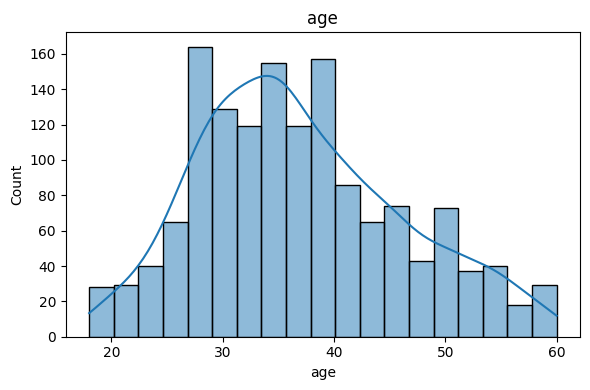

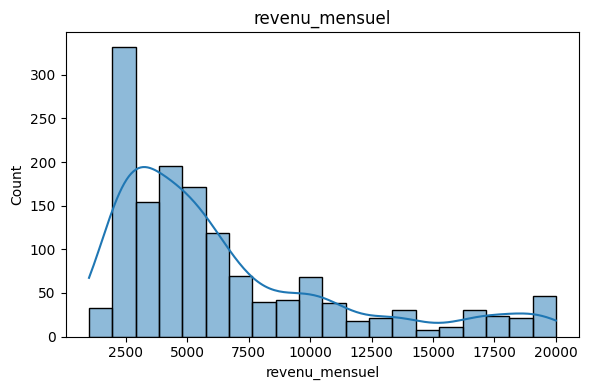

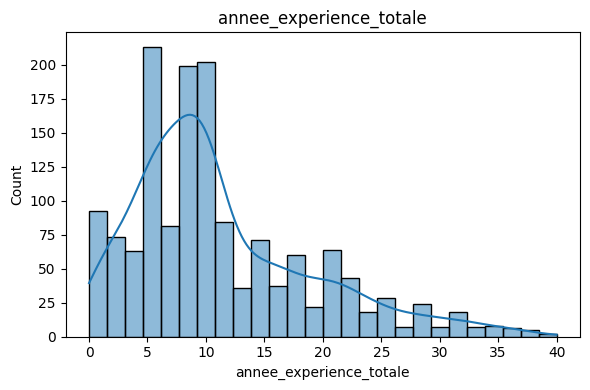

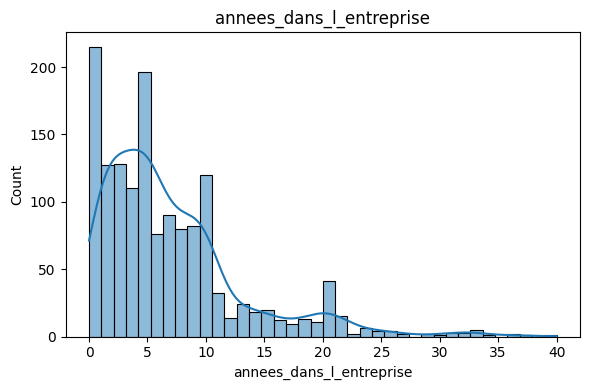

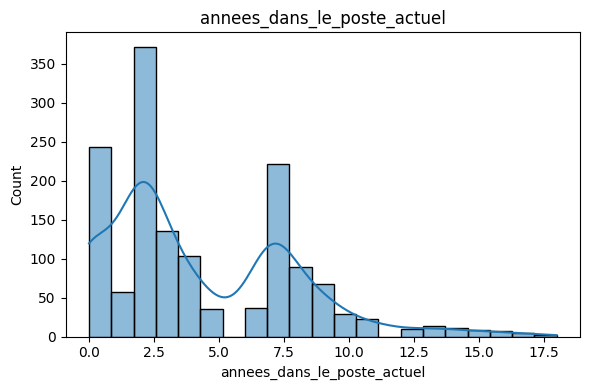

In [18]:
for col in [c for c in data_type['numeric_continuous'] if c != 'id_employee']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=sirh, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()


##### CountPlot

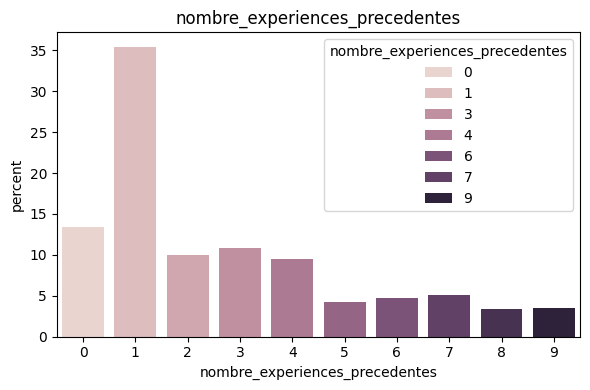

In [19]:
for col in [c for c in data_type['ordinal_numeric'] if c != 'id_employee']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=sirh, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

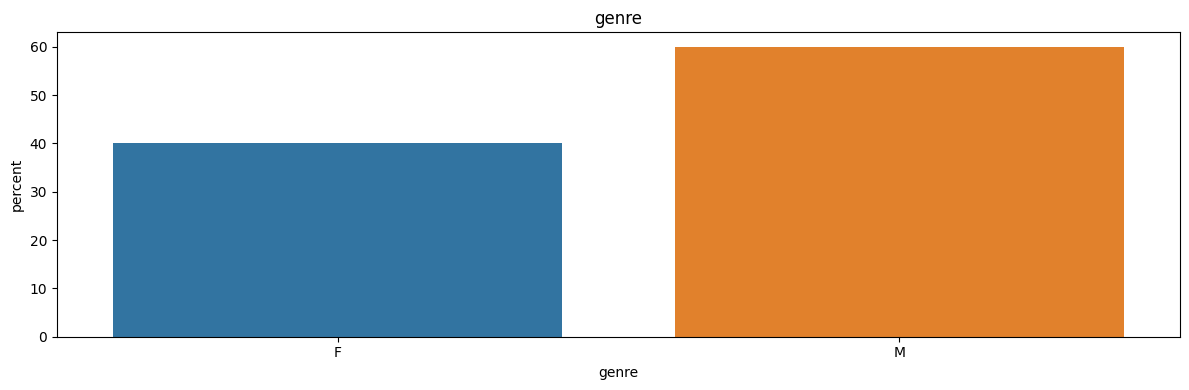

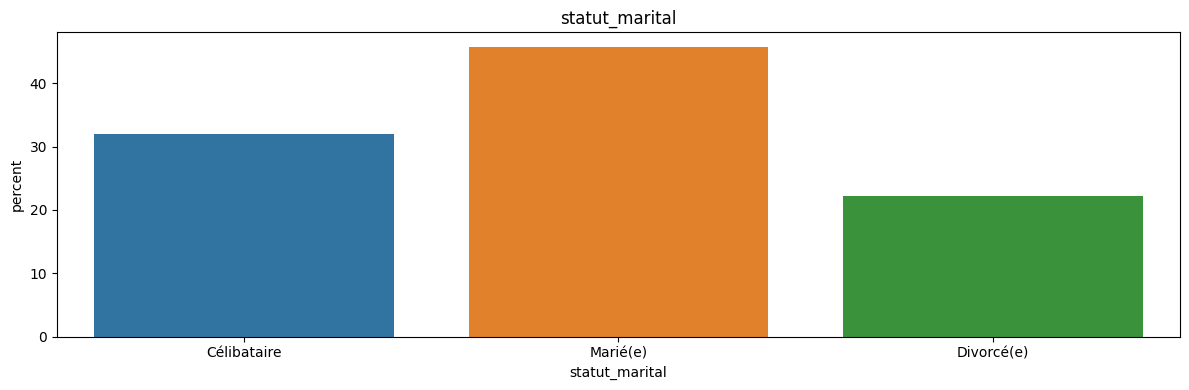

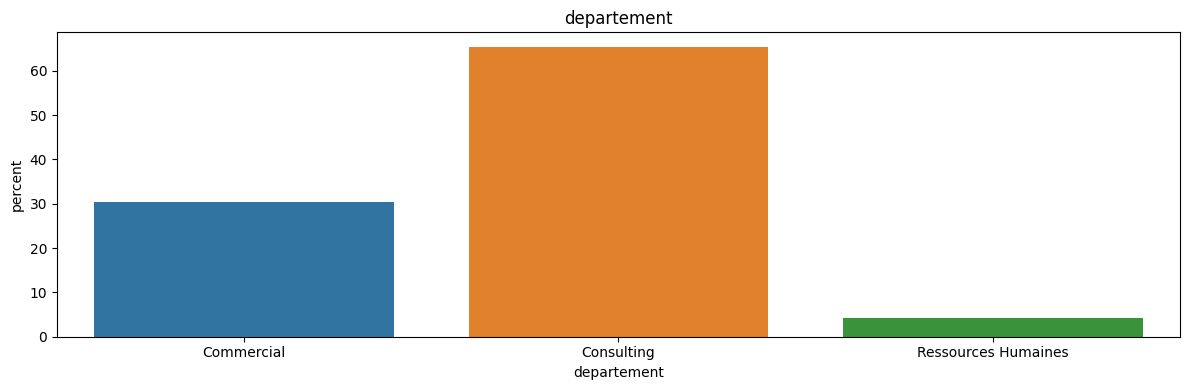

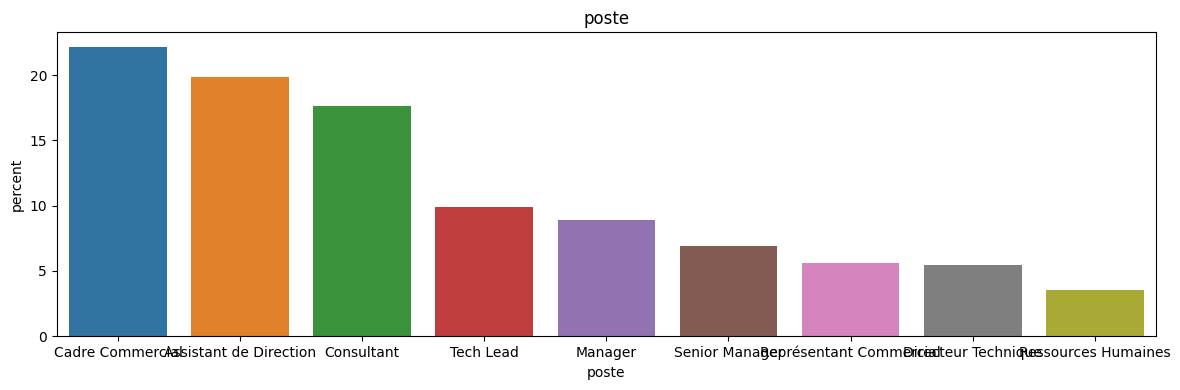

In [20]:
for col in [c for c in data_type['nominal_categorical'] if c != 'id_employee']:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=sirh, x=col, stat='percent', hue=col, legend='auto')
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

#### EVAL source file

In [21]:
eval.describe(include='number')

satisfaction_employee_environnement  note_evaluation_precedente  \
count                          1470.000000                 1470.000000   
mean                              2.721769                    2.729932   
std                               1.093082                    0.711561   
min                               1.000000                    1.000000   
25%                               2.000000                    2.000000   
50%                               3.000000                    3.000000   
75%                               4.000000                    3.000000   
max                               4.000000                    4.000000   

       niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
count                1470.000000                           1470.000000   
mean                    2.063946                              2.728571   
std                     1.106940                              1.102846   
min                     1.000000                              1.000000   
25%                     1.000000                              2.000000   
50%                     2.000000                              3.000000   
75%                     3.000000                              4.000000   
max                     5.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso  eval_number  \
count                                1470.000000  1470.000000   
mean                                    2.761224  1024.865306   
std                                     0.706476   602.024335   
min                                     1.000000     1.000000   
25%                                     2.000000   491.250000   
50%                                     3.000000  1020.500000   
75%                                     3.000000  1555.750000   
max                                     4.000000  2068.000000   

       note_evaluation_actuelle  
count               1470.000000  
mean                   3.153741  
std                    0.360824  
min                    3.000000  
25%                    3.000000  
50%                    3.000000  
75%                    3.000000  
max                    4.000000

##### Outliers Verification

Pas d'outliers significatif

In [22]:
print('Eval count of unique values for each series : \n{}\n\nEval series dtypes: \n{}'.format(eval.nunique(),eval.dtypes))

Eval count of unique values for each series : 
satisfaction_employee_environnement             4
note_evaluation_precedente                      4
niveau_hierarchique_poste                       5
satisfaction_employee_nature_travail            4
satisfaction_employee_equipe                    4
satisfaction_employee_equilibre_pro_perso       4
eval_number                                  1470
note_evaluation_actuelle                        2
heure_supplementaires                           2
augementation_salaire_precedente               15
dtype: int64

Eval series dtypes: 
satisfaction_employee_environnement           int64
note_evaluation_precedente                    int64
niveau_hierarchique_poste                     int64
satisfaction_employee_nature_travail          int64
satisfaction_employee_equipe                  int64
satisfaction_employee_equilibre_pro_perso     int64
eval_number                                   int64
note_evaluation_actuelle                      int64
he

In [23]:
data_type = {
    'numeric_continuous': [],
    'ordinal_numeric': [],
    'nominal_categorical': []
}
for serie in eval:
    if eval[serie].nunique() > 10 and eval[serie].dtype == 'int64': # numeric_continuous
        data_type['numeric_continuous'].append(serie)
    if eval[serie].nunique() <= 10 and eval[serie].nunique() > 1 and eval[serie].dtype == 'int64': # ordinal_numeric
        data_type['ordinal_numeric'].append(serie)
    if eval[serie].nunique() <= 20 and eval[serie].nunique() > 1 and eval[serie].dtype == 'object': # nominal_categorical
        data_type['nominal_categorical'].append(serie)


##### Histogramme / KDE

In [24]:
for col in [c for c in data_type['numeric_continuous'] if c != 'eval_number']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=eval, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

##### CountPlot

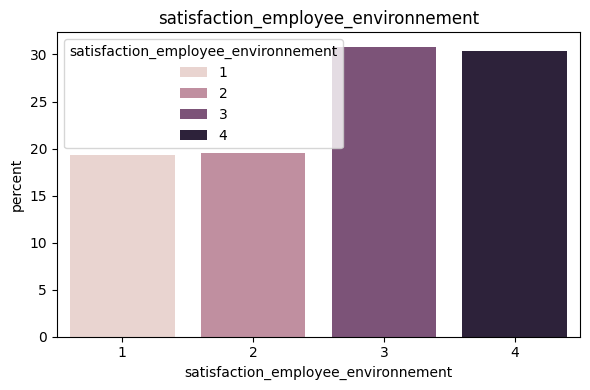

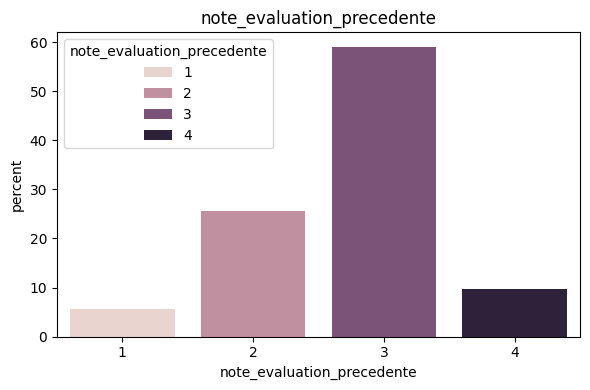

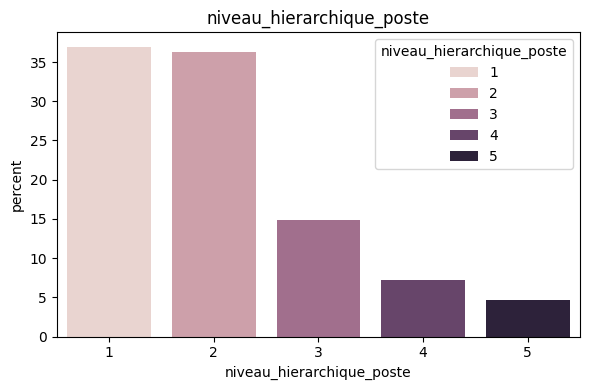

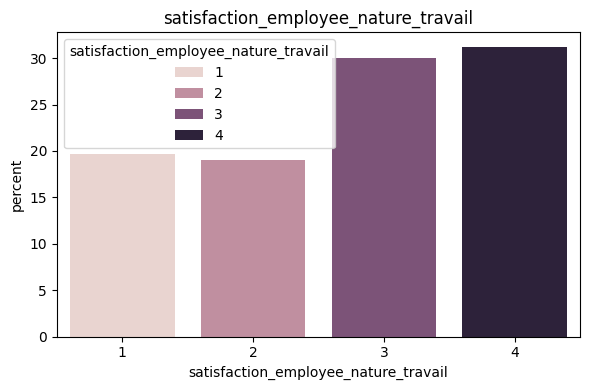

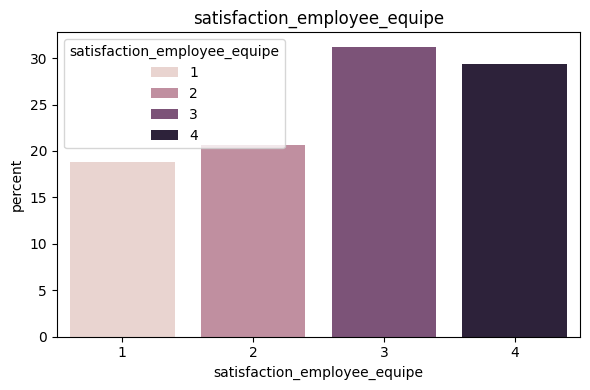

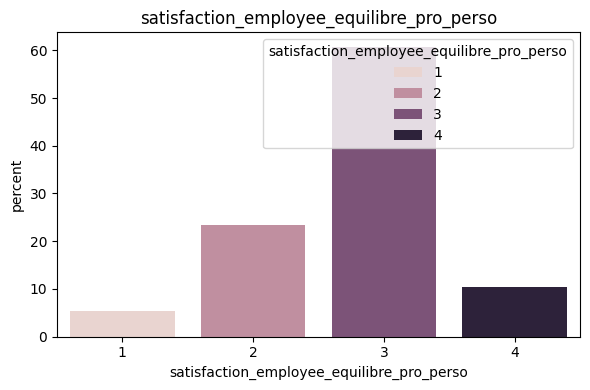

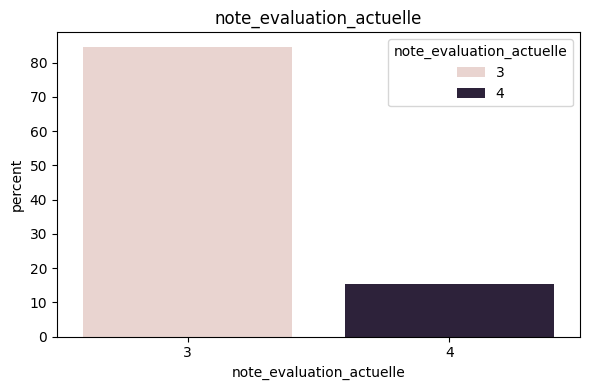

In [25]:
for col in [c for c in data_type['ordinal_numeric'] if c != 'eval_number']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=eval, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

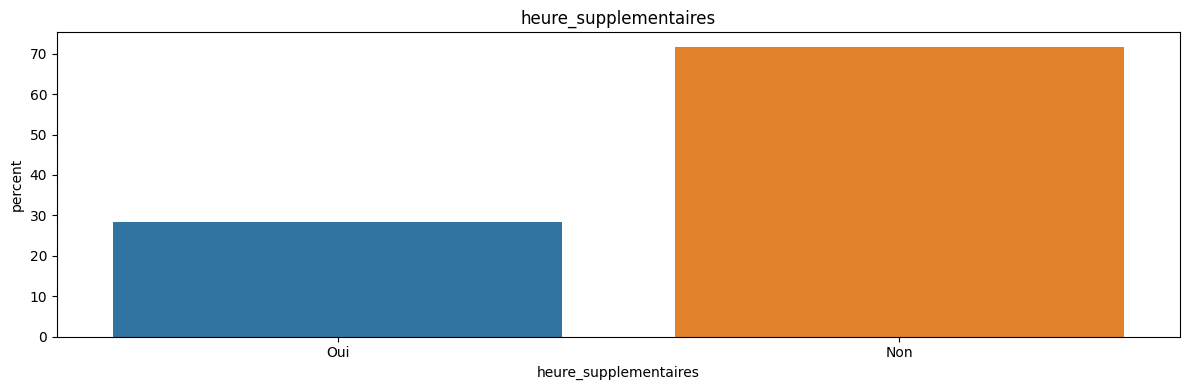

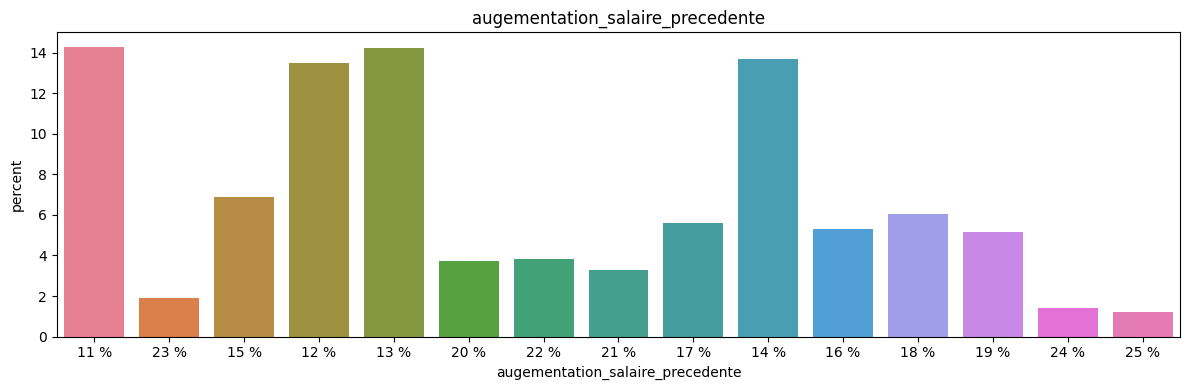

In [26]:
for col in [c for c in data_type['nominal_categorical'] if c != 'eval_number']:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=eval, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

#### Sondage source file

In [27]:
sondage.describe(include='number')

nombre_participation_pee  nb_formations_suivies  \
count               1470.000000            1470.000000   
mean                   0.793878               2.799320   
std                    0.852077               1.289271   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    1.000000               3.000000   
75%                    1.000000               3.000000   
max                    3.000000               6.000000   

       nombre_employee_sous_responsabilite  code_sondage  \
count                               1470.0   1470.000000   
mean                                   1.0   1024.865306   
std                                    0.0    602.024335   
min                                    1.0      1.000000   
25%                                    1.0    491.250000   
50%                                    1.0   1020.500000   
75%                                    1.0   1555.750000   
max                                    1.0   2068.000000   

       distance_domicile_travail  niveau_education  \
count                1470.000000       1470.000000   
mean                    9.192517          2.912925   
std                     8.106864          1.024165   
min                     1.000000          1.000000   
25%                     2.000000          2.000000   
50%                     7.000000          3.000000   
75%                    14.000000          4.000000   
max                    29.000000          5.000000   

       annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  
count                          1470.000000                    1470.000000  
mean                              2.187755                       4.123129  
std                               3.222430                       3.568136  
min                               0.000000                       0.000000  
25%                               0.000000                       2.000000  
50%                               1.000000                       3.000000  
75%                               3.000000                       7.000000  
max                              15.000000                      17.000000

##### Outliers Verification

Pas d'outliers significatif

In [28]:
print('Sondage count of unique values for each series : \n{}\n\nSondage series dtypes: \n{}'.format(sondage.nunique(),sondage.dtypes))

Sondage count of unique values for each series : 
a_quitte_l_entreprise                     2
nombre_participation_pee                  4
nb_formations_suivies                     7
nombre_employee_sous_responsabilite       1
code_sondage                           1470
distance_domicile_travail                29
niveau_education                          5
domaine_etude                             6
ayant_enfants                             1
frequence_deplacement                     3
annees_depuis_la_derniere_promotion      16
annes_sous_responsable_actuel            18
dtype: int64

Sondage series dtypes: 
a_quitte_l_entreprise                  object
nombre_participation_pee                int64
nb_formations_suivies                   int64
nombre_employee_sous_responsabilite     int64
code_sondage                            int64
distance_domicile_travail               int64
niveau_education                        int64
domaine_etude                          object
ayant_enfants   

In [29]:
data_type = {
    'numeric_continuous': [],
    'ordinal_numeric': [],
    'nominal_categorical': []
}
for serie in sondage:
    if sondage[serie].nunique() > 10 and sondage[serie].dtype == 'int64': # numeric_continuous
        data_type['numeric_continuous'].append(serie)
    if sondage[serie].nunique() <= 10 and sondage[serie].nunique() > 1 and sondage[serie].dtype == 'int64': # ordinal_numeric
        data_type['ordinal_numeric'].append(serie)
    if sondage[serie].nunique() <= 20 and sondage[serie].nunique() > 1 and sondage[serie].dtype == 'object': # nominal_categorical
        data_type['nominal_categorical'].append(serie)

##### Histogramme / KDE

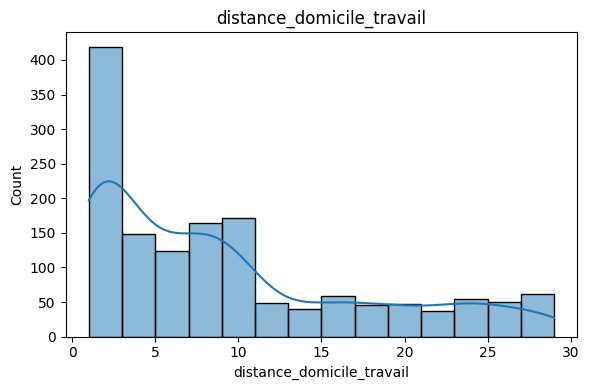

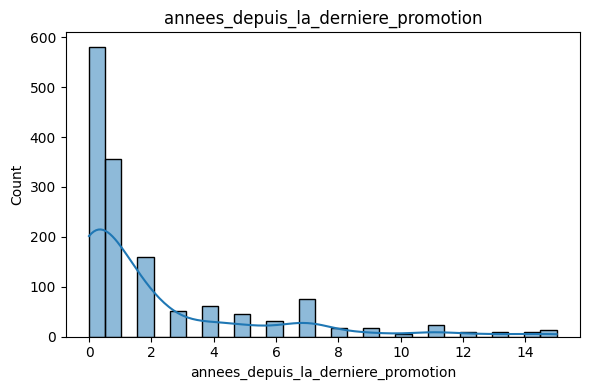

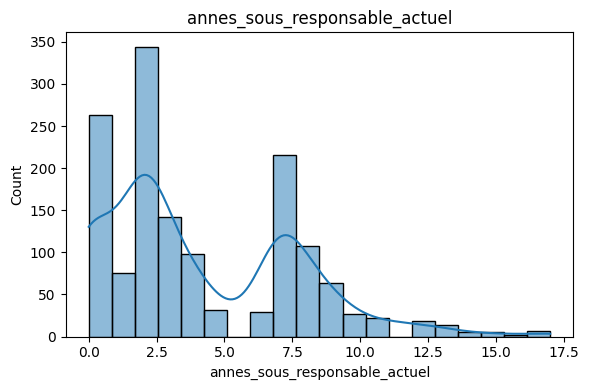

In [30]:
for col in [c for c in data_type['numeric_continuous'] if c != 'code_sondage']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=sondage, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

##### CountPlot

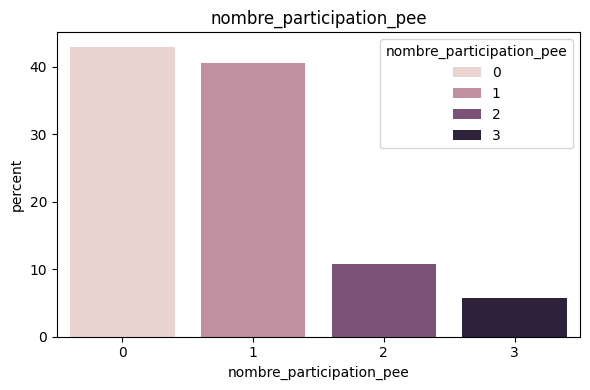

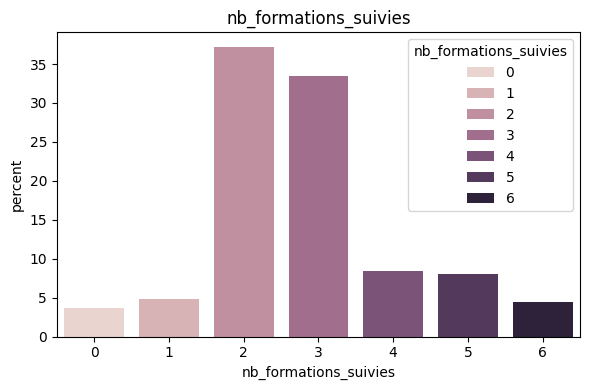

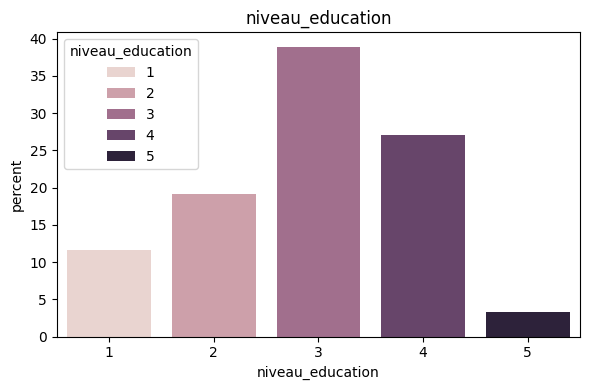

In [31]:
for col in [c for c in data_type['ordinal_numeric'] if c != 'code_sondage']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=sondage, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

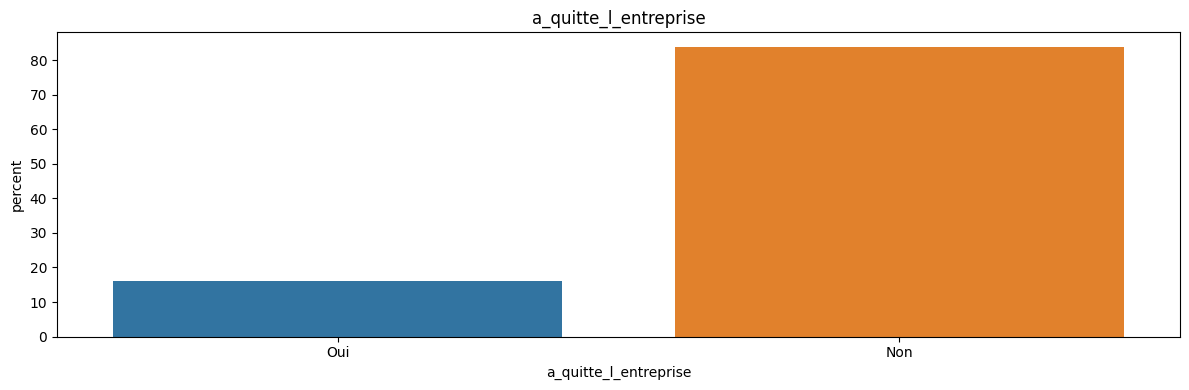

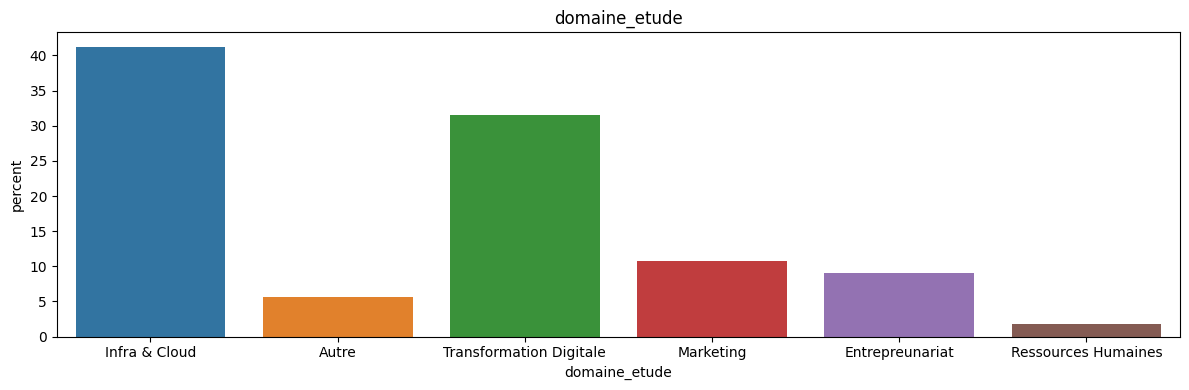

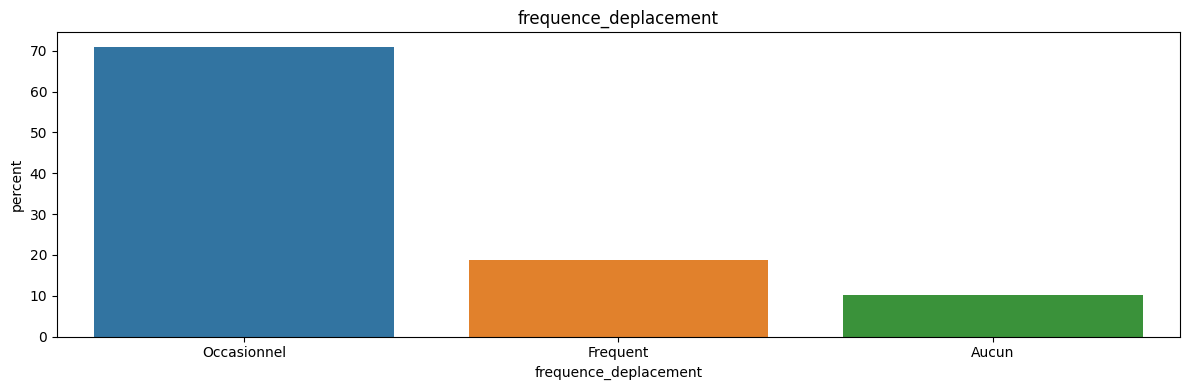

In [32]:
for col in [c for c in data_type['nominal_categorical'] if c != 'code_sondage']:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=sondage, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

## Analyse statistique


#### Merged and Cleaned DataSet

In [33]:
merged_cleaned.describe(include='number')

age  revenu_mensuel  nombre_experiences_precedentes  \
count  1470.000000     1470.000000                     1470.000000   
mean     36.923810     6502.931293                        2.693197   
std       9.135373     4707.956783                        2.498009   
min      18.000000     1009.000000                        0.000000   
25%      30.000000     2911.000000                        1.000000   
50%      36.000000     4919.000000                        2.000000   
75%      43.000000     8379.000000                        4.000000   
max      60.000000    19999.000000                        9.000000   

       annee_experience_totale  annees_dans_l_entreprise  \
count              1470.000000               1470.000000   
mean                 11.279592                  7.008163   
std                   7.780782                  6.126525   
min                   0.000000                  0.000000   
25%                   6.000000                  3.000000   
50%                  10.000000                  5.000000   
75%                  15.000000                  9.000000   
max                  40.000000                 40.000000   

       annees_dans_le_poste_actuel  satisfaction_employee_environnement  \
count                  1470.000000                          1470.000000   
mean                      4.229252                             2.721769   
std                       3.623137                             1.093082   
min                       0.000000                             1.000000   
25%                       2.000000                             2.000000   
50%                       3.000000                             3.000000   
75%                       7.000000                             4.000000   
max                      18.000000                             4.000000   

       note_evaluation_precedente  niveau_hierarchique_poste  \
count                 1470.000000                1470.000000   
mean                     2.729932                   2.063946   
std                      0.711561                   1.106940   
min                      1.000000                   1.000000   
25%                      2.000000                   1.000000   
50%                      3.000000                   2.000000   
75%                      3.000000                   3.000000   
max                      4.000000                   5.000000   

       satisfaction_employee_nature_travail  satisfaction_employee_equipe  \
count                           1470.000000                   1470.000000   
mean                               2.728571                      2.712245   
std                                1.102846                      1.081209   
min                                1.000000                      1.000000   
25%                                2.000000                      2.000000   
50%                                3.000000                      3.000000   
75%                                4.000000                      4.000000   
max                                4.000000                      4.000000   

       satisfaction_employee_equilibre_pro_perso  note_evaluation_actuelle  \
count                                1470.000000               1470.000000   
mean                                    2.761224                  3.153741   
std                                     0.706476                  0.360824   
min                                     1.000000                  3.000000   
25%                                     2.000000                  3.000000   
50%                                     3.000000                  3.000000   
75%                                     3.000000                  3.000000   
max                                     4.000000                  4.000000   

       augementation_salaire_precedente  nombre_participation_pee  \
count                       1470.000000               1470.000000   
mean                          15.209524                

In [34]:
print('Merged data count of unique values for each series : \n{}\n\nMerged data series dtypes: \n{}'.format(merged_cleaned.nunique(),merged_cleaned.dtypes))

Merged data count of unique values for each series : 
age                                            43
genre                                           2
revenu_mensuel                               1349
statut_marital                                  3
departement                                     3
poste                                           9
nombre_experiences_precedentes                 10
annee_experience_totale                        40
annees_dans_l_entreprise                       37
annees_dans_le_poste_actuel                    19
satisfaction_employee_environnement             4
note_evaluation_precedente                      4
niveau_hierarchique_poste                       5
satisfaction_employee_nature_travail            4
satisfaction_employee_equipe                    4
satisfaction_employee_equilibre_pro_perso       4
note_evaluation_actuelle                        2
heure_supplementaires                           2
augementation_salaire_precedente              

In [35]:
data_type = {
    'numeric_continuous': [],
    'ordinal_numeric': [],
    'nominal_categorical': []
}
for serie in merged_cleaned:
    if merged_cleaned[serie].nunique() > 20 and merged_cleaned[serie].dtype == 'int64': # numeric_continuous
        data_type['numeric_continuous'].append(serie)
    if merged_cleaned[serie].nunique() <= 20 and merged_cleaned[serie].nunique() > 1 and merged_cleaned[serie].dtype == 'int64': # ordinal_numeric
        data_type['ordinal_numeric'].append(serie)
    if merged_cleaned[serie].nunique() <= 20 and merged_cleaned[serie].nunique() > 1 and merged_cleaned[serie].dtype == 'object': # nominal_categorical
        data_type['nominal_categorical'].append(serie)

##### Histogramme/KDE

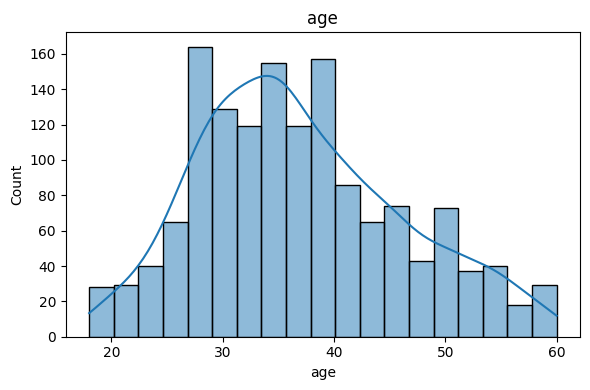

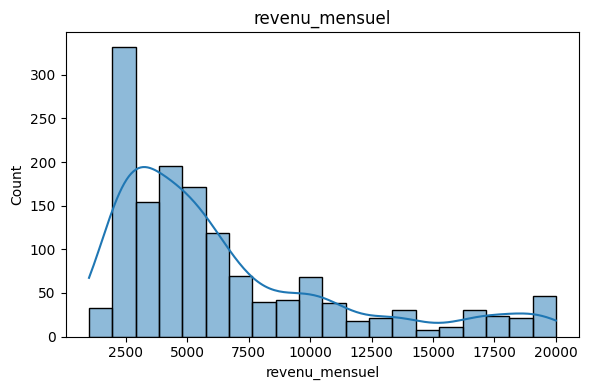

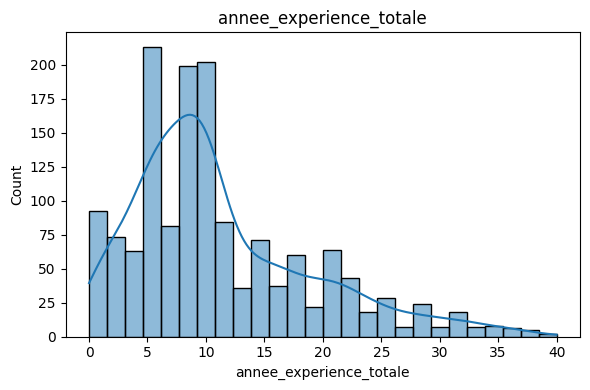

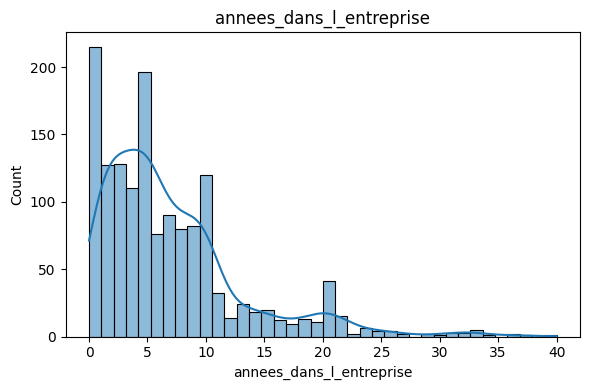

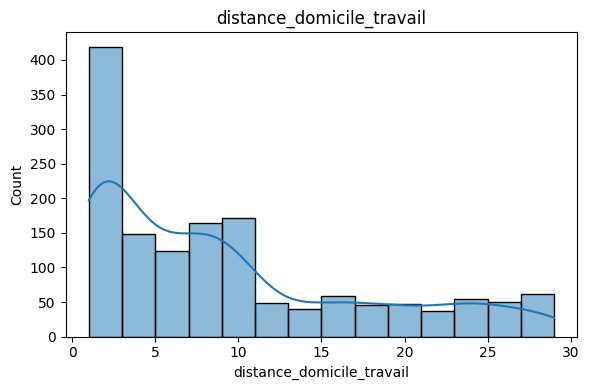

In [36]:
for col in data_type['numeric_continuous']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=merged_cleaned, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

##### CounterPlot

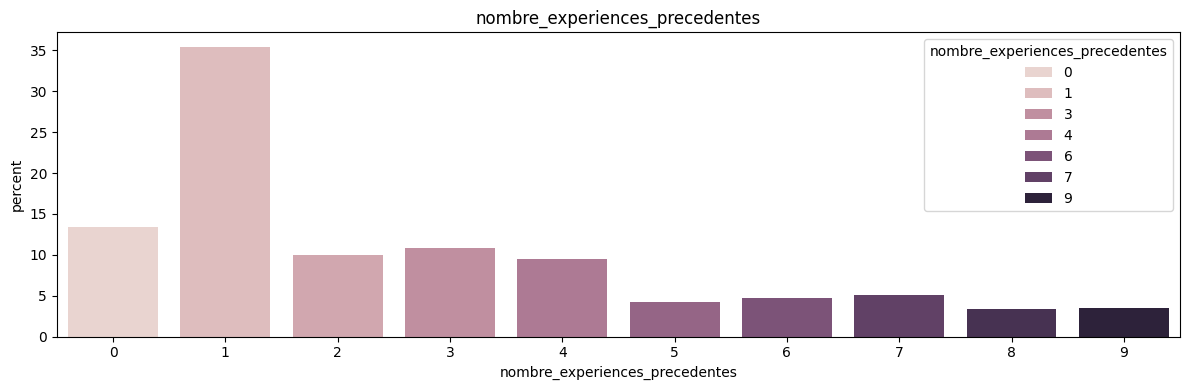

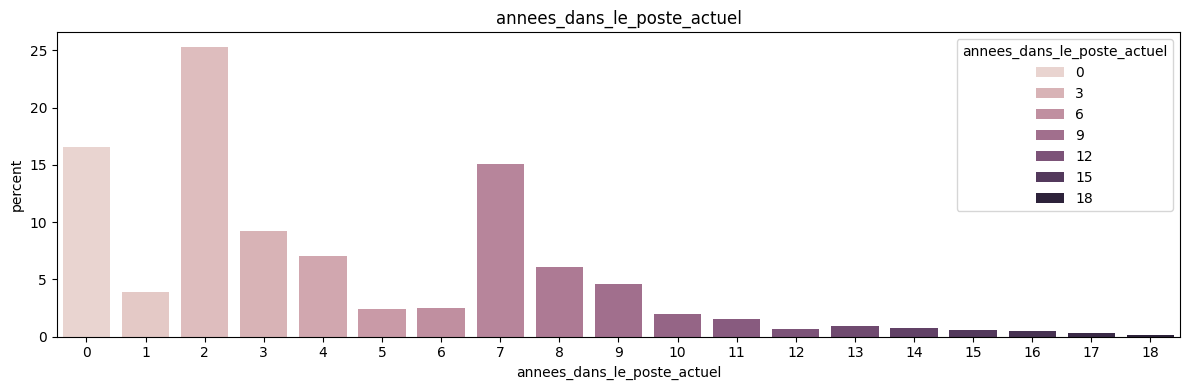

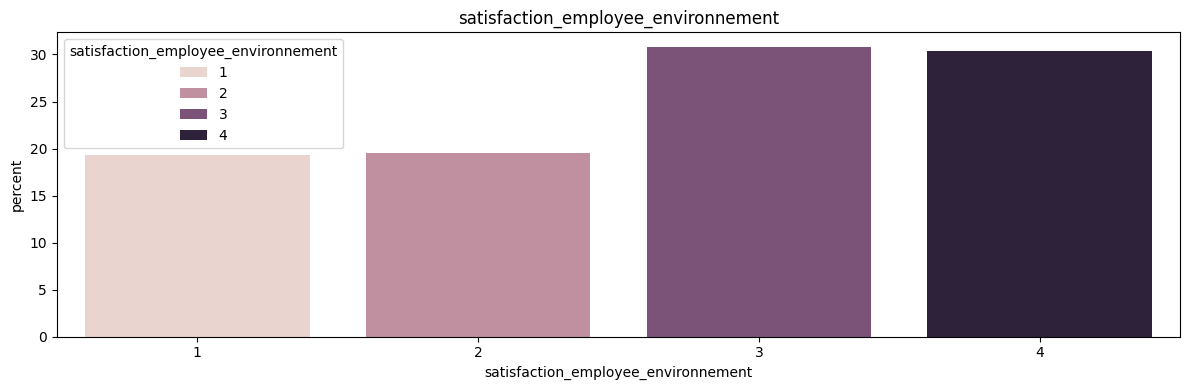

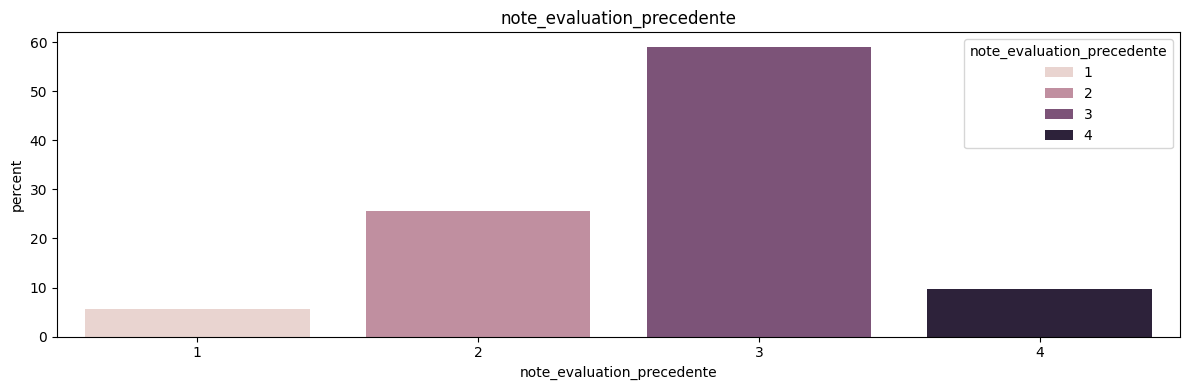

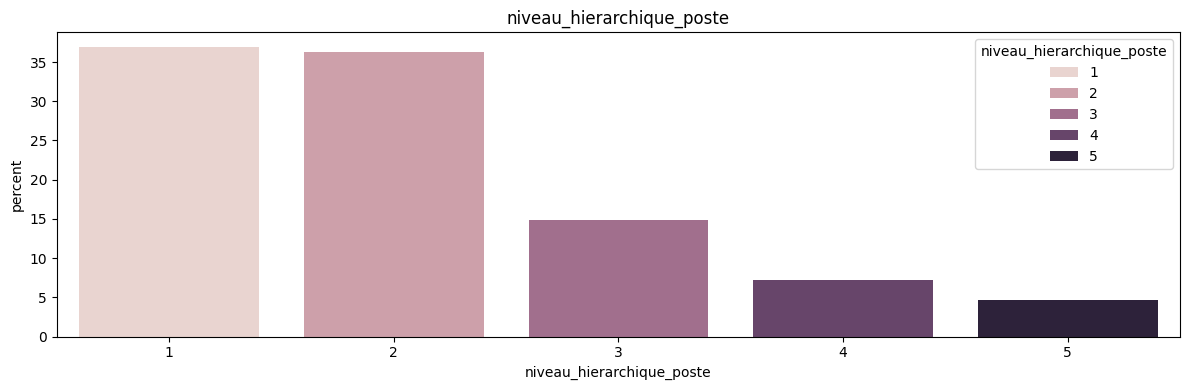

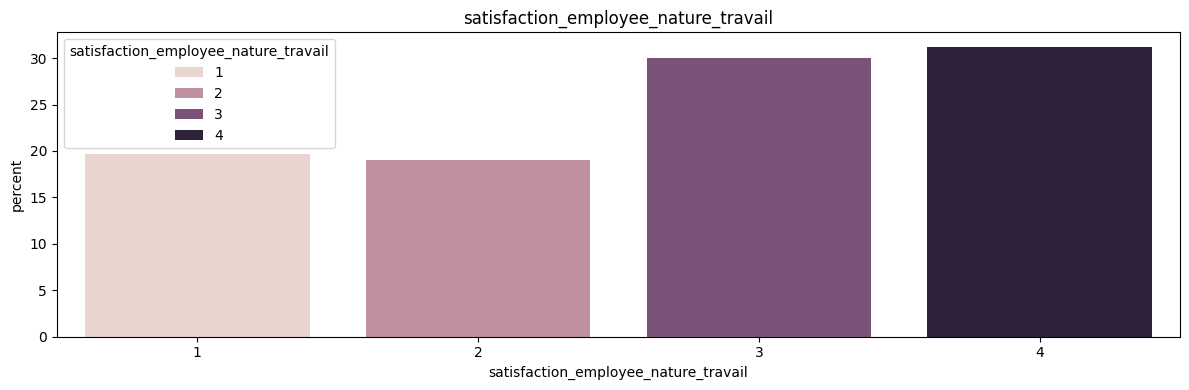

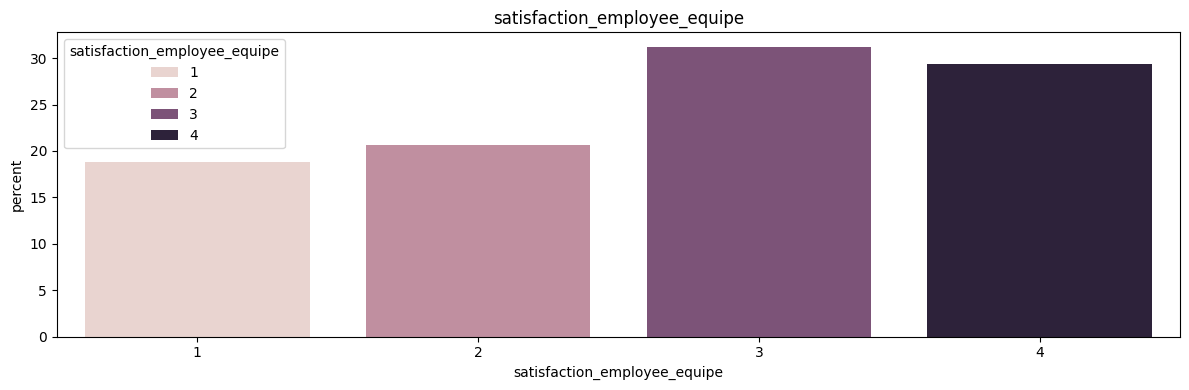

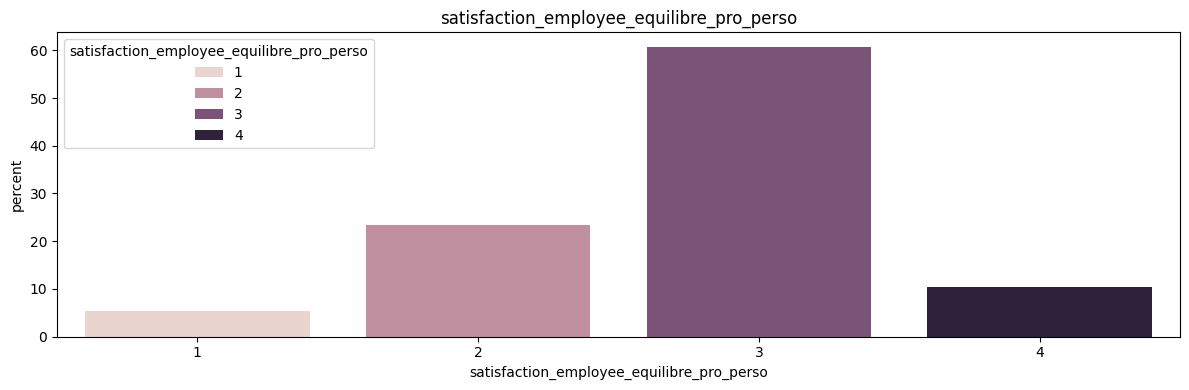

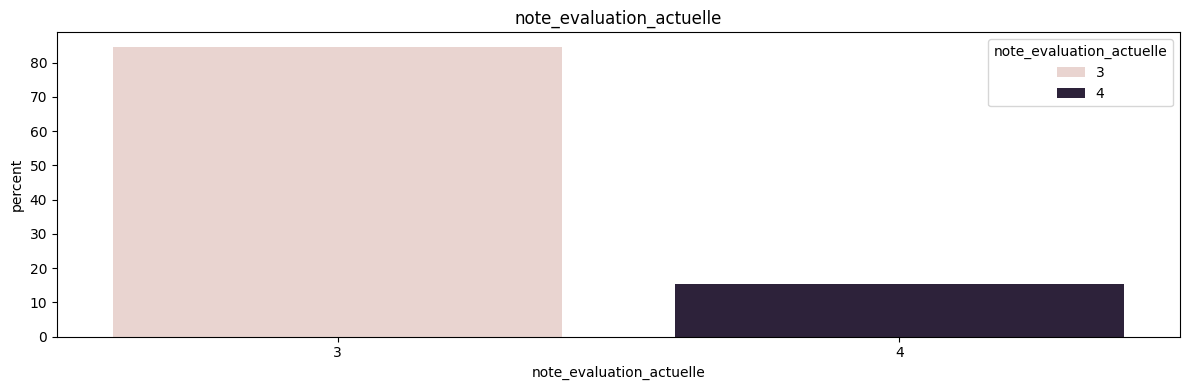

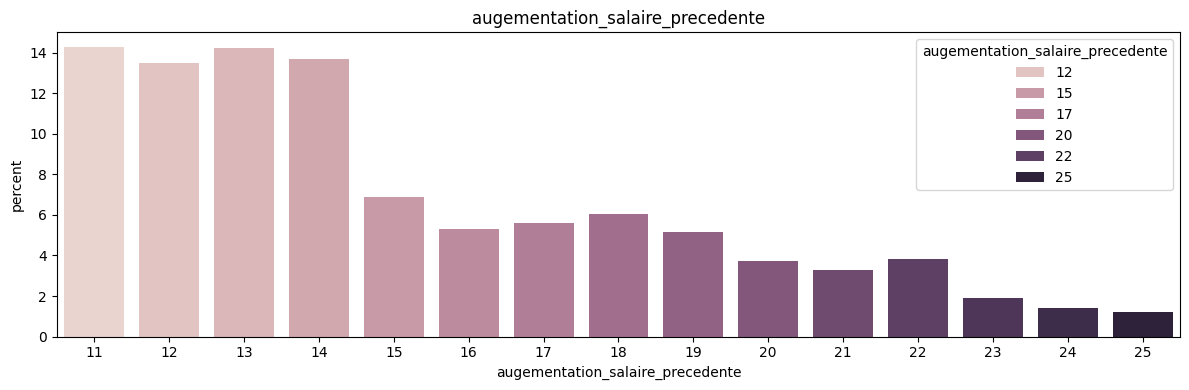

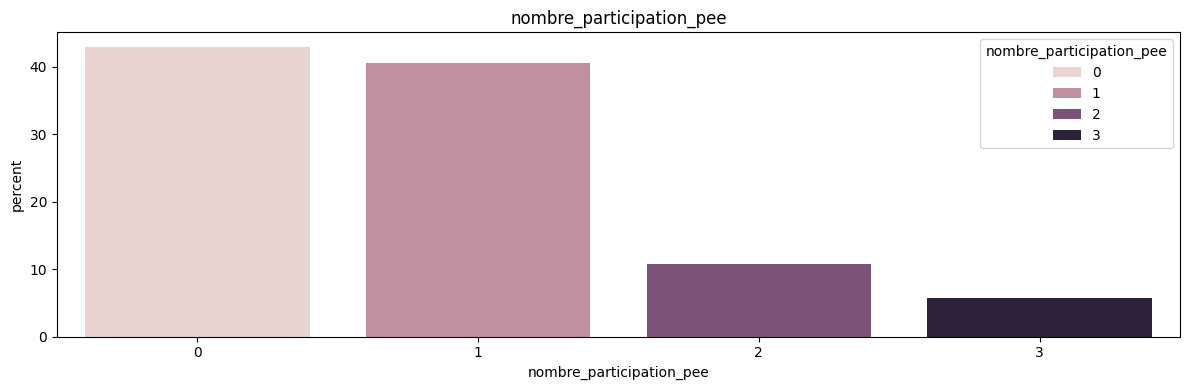

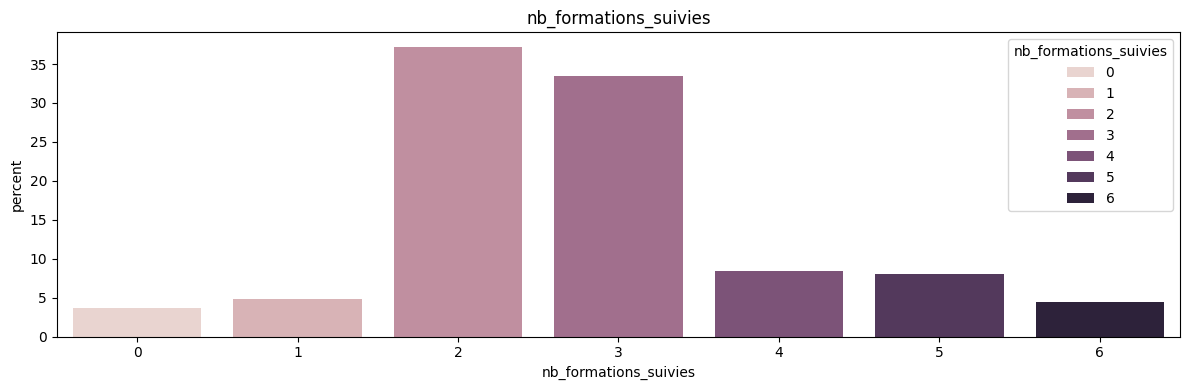

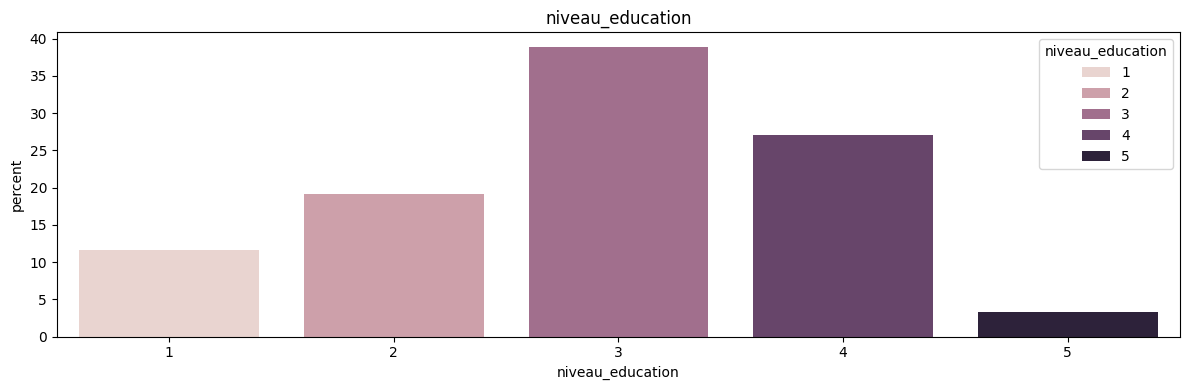

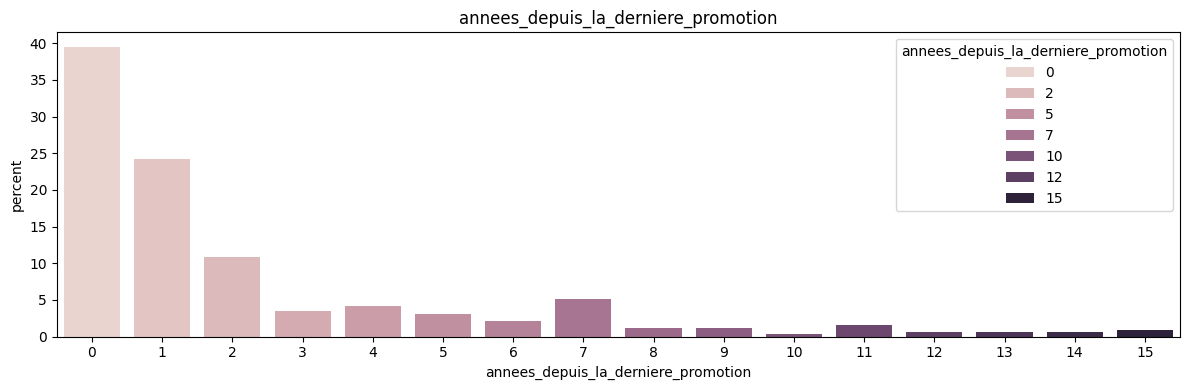

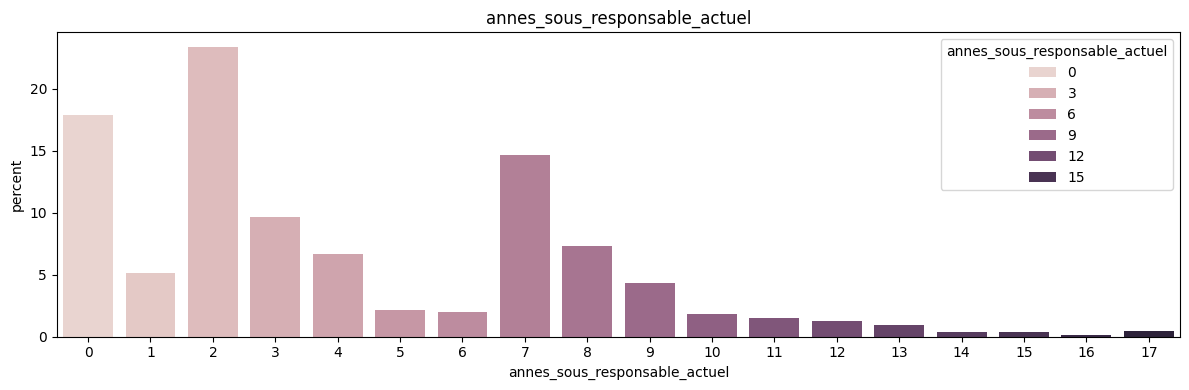

In [37]:
for col in data_type['ordinal_numeric']:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=merged_cleaned, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

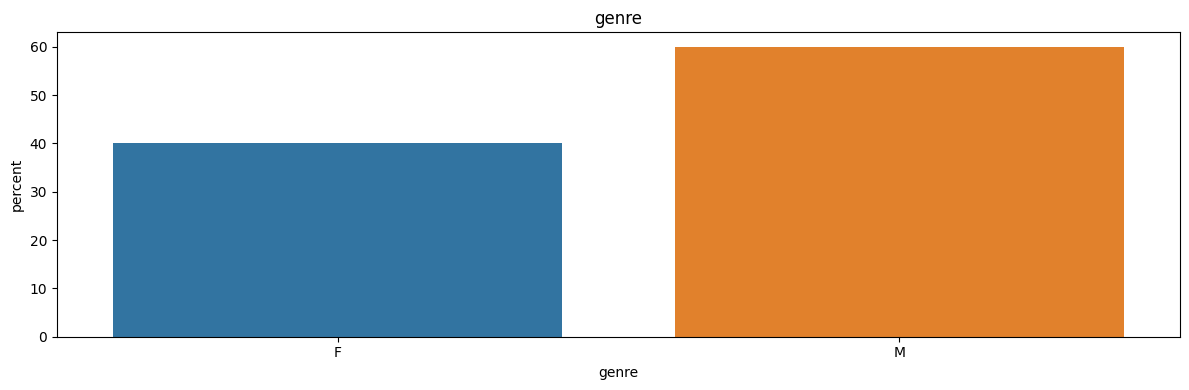

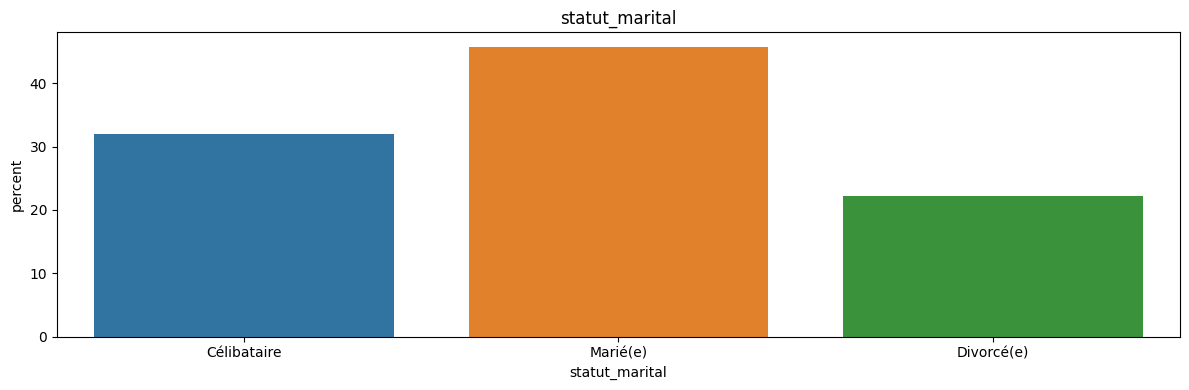

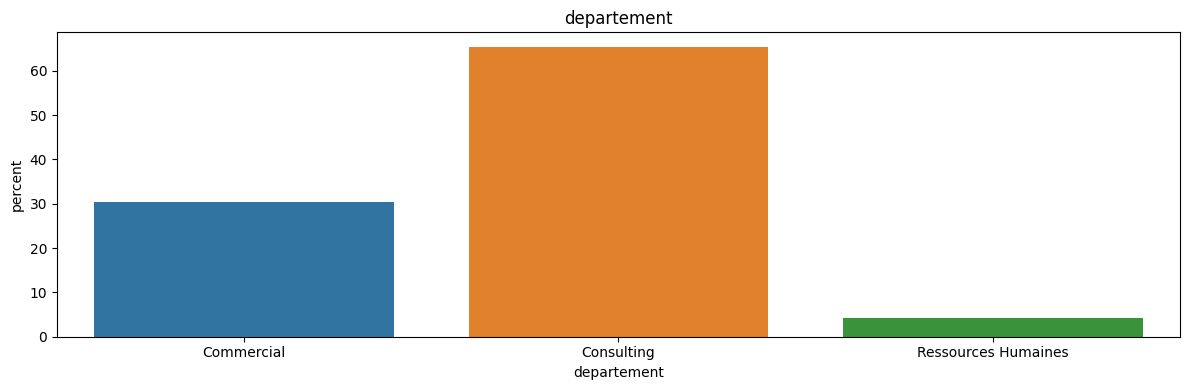

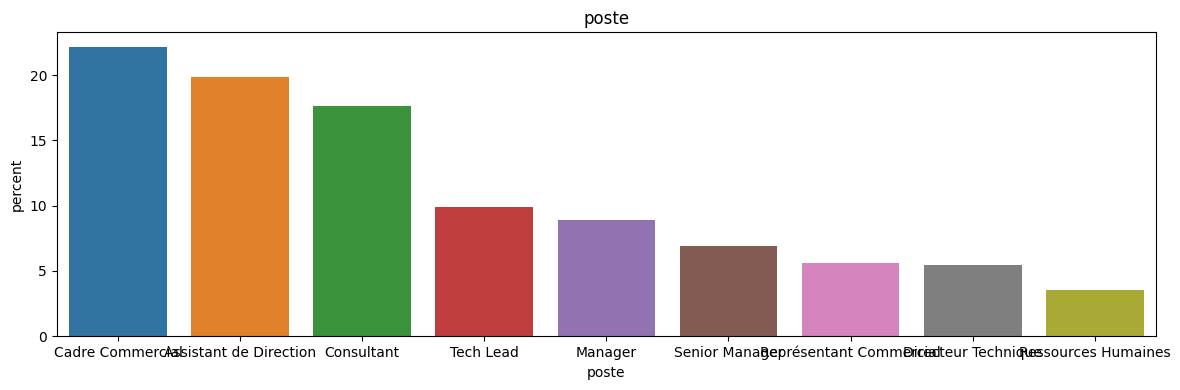

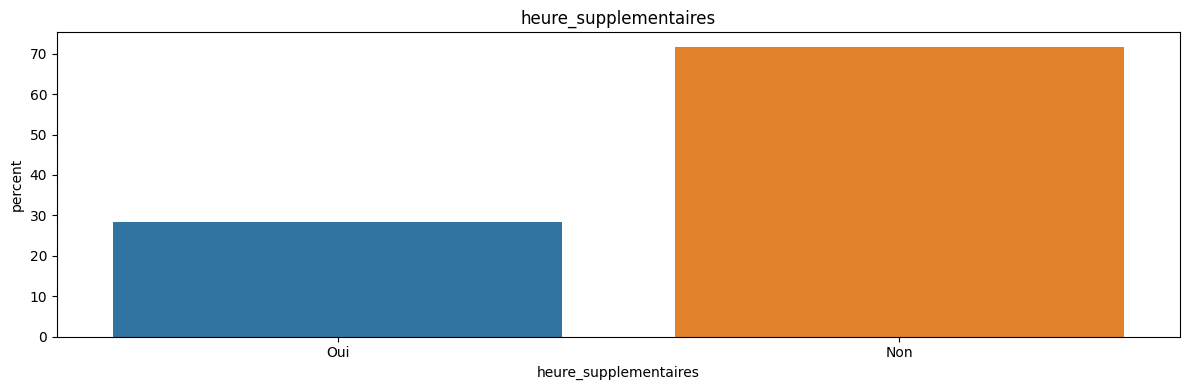

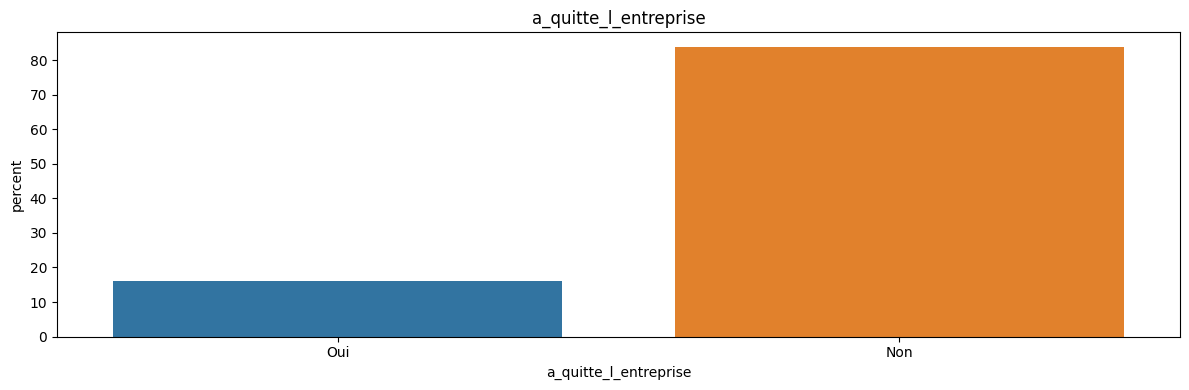

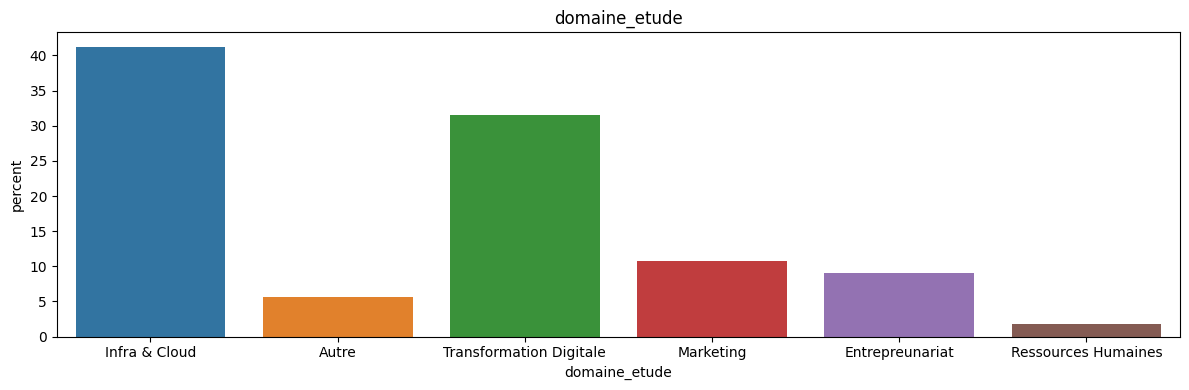

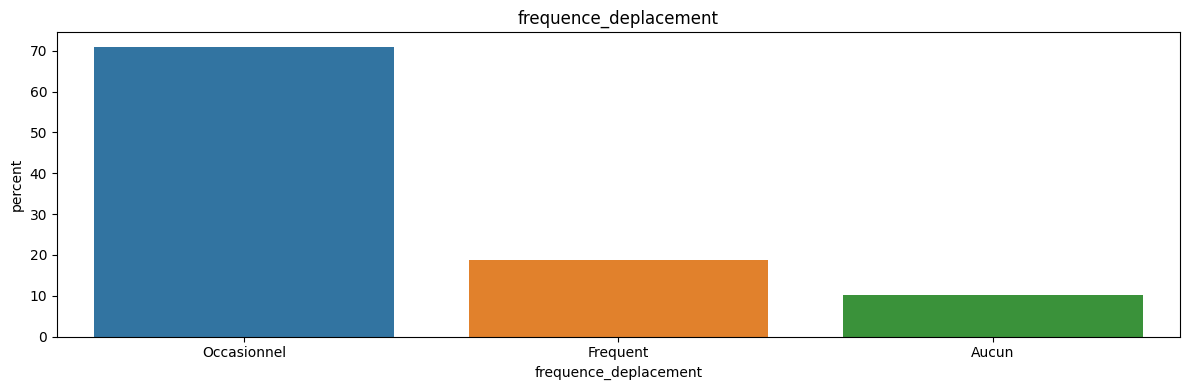

In [38]:
for col in data_type['nominal_categorical']:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=merged_cleaned, x=col, stat='percent', hue=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.close()

### Analyse filtrer sur la valeur du départ

#### Numérique

In [39]:
# Creer deux dataframe en fonction des agents ayant quitté ou non l'entreprise pour observer les différence
merged_data_leave = data_num[data_num['a_quitte_l_entreprise'] == 'Oui']
merged_data_stay = data_num[data_num['a_quitte_l_entreprise'] == 'Non']

# Recupération des valeurs statistiques numériques
desc_merged_data_leave = merged_data_leave.describe(include='number')
desc_merged_data_stay = merged_data_stay.describe(include='number')

##### Analyse des moyennes et ecart relatif

In [40]:
# desc_merged_data_leave.loc['mean']
ecart_relatif = ((desc_merged_data_leave.loc['mean'] - desc_merged_data_stay.loc['mean']).abs()) / desc_merged_data_stay.loc['mean']
ecart_relatif_sorted = ecart_relatif[ecart_relatif > 0].sort_values(ascending=False)
ecart_relatif_sorted

annees_dans_le_poste_actuel            0.352624
annes_sous_responsable_actuel          0.346906
annee_experience_totale                0.305001
annees_dans_l_entreprise               0.303733
revenu_mensuel                         0.299389
distance_domicile_travail              0.192612
annees_depuis_la_derniere_promotion    0.129449
age                                    0.105258
augementation_salaire_precedente       0.008804
Name: mean, dtype: float64

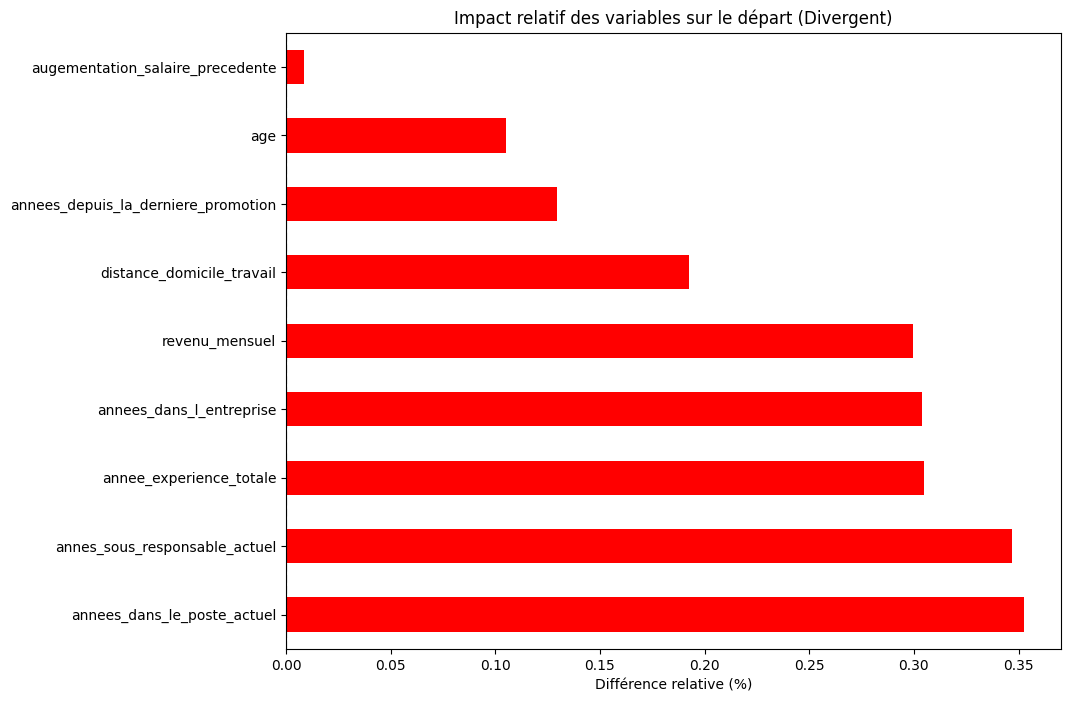

In [41]:
couleurs = ['red' if x > 0 else 'green' for x in ecart_relatif_sorted]
ecart_relatif_sorted.plot(kind='barh', color=couleurs, figsize=(10, 8))
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Impact relatif des variables sur le départ (Divergent)")
plt.xlabel("Différence relative (%)")
plt.show()

/tmp/ipykernel_1054494/3487319411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='annees_dans_le_poste_actuel', y='a_quitte_l_entreprise',


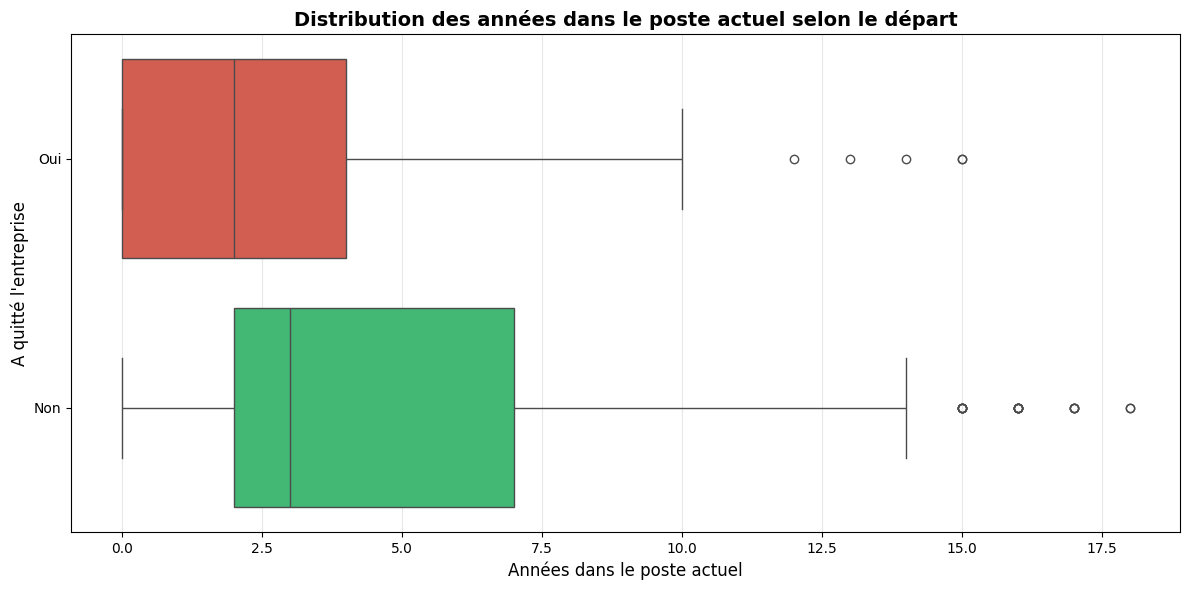

In [42]:
data['annees_dans_le_poste_actuel'].unique()
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='annees_dans_le_poste_actuel', y='a_quitte_l_entreprise',
            palette={'Oui': '#e74c3c', 'Non': '#2ecc71'})
plt.title("Distribution des années dans le poste actuel selon le départ", fontsize=14, fontweight='bold')
plt.xlabel("Années dans le poste actuel", fontsize=12)
plt.ylabel("A quitté l'entreprise", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

###### Analyse Univarié

Top 5 : ['annees_dans_le_poste_actuel', 'annes_sous_responsable_actuel', 'annee_experience_totale', 'annees_dans_l_entreprise', 'revenu_mensuel']


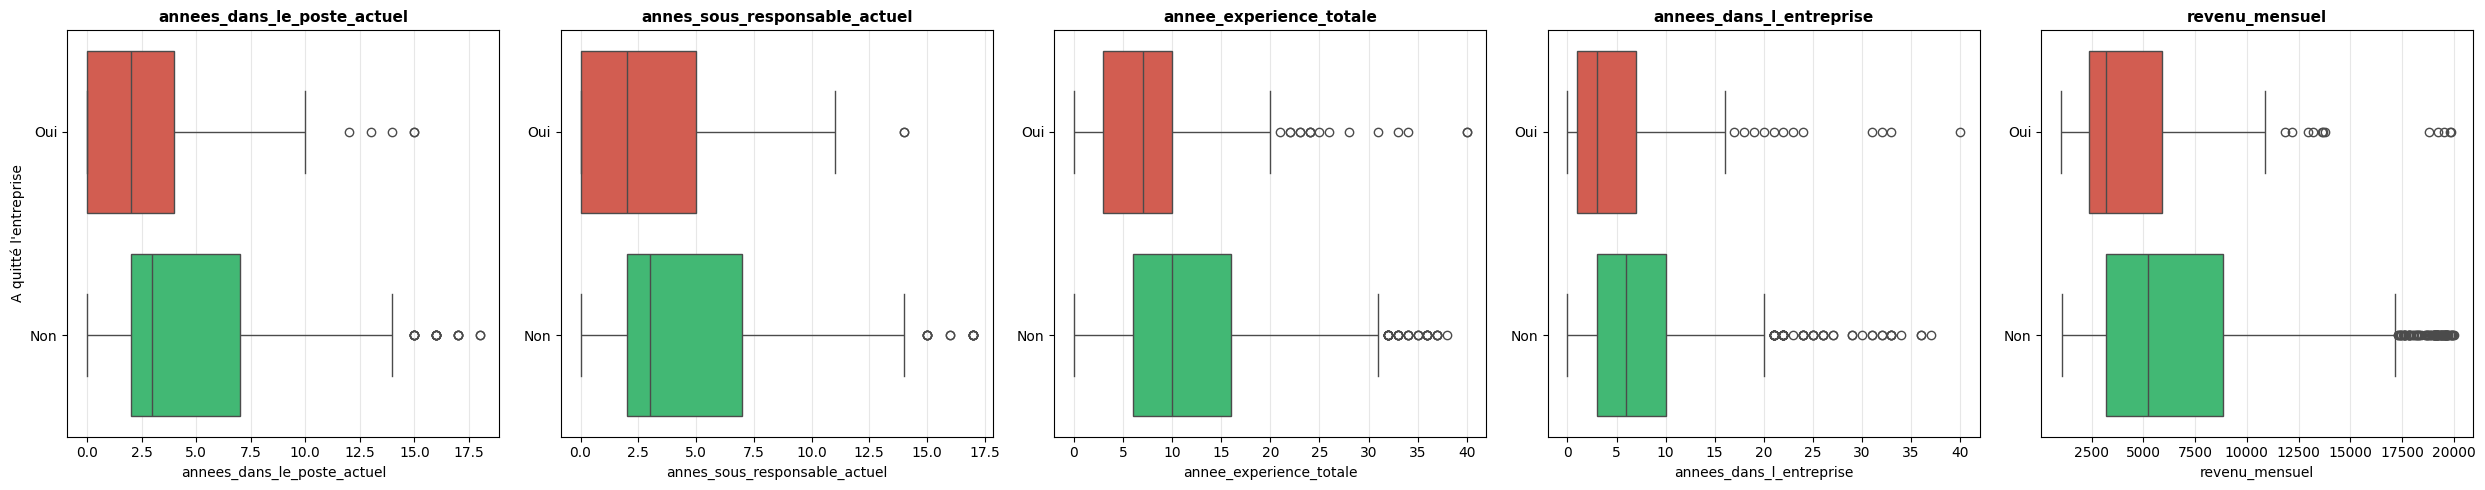

In [43]:
top5_variables = ecart_relatif_sorted.head(5).index.tolist()
print("Top 5 :", top5_variables)

# J'augmente un peu la largeur (25) pour que les 5 graphiques respirent
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, variable in enumerate(top5_variables):
    sns.boxplot(
        data=data,
        x=variable,              # La variable numérique (ex: Salaire)
        y='a_quitte_l_entreprise', # La variable catégorielle (Oui/Non)
        hue='a_quitte_l_entreprise', # Important pour que la palette s'applique aux couleurs
        palette={'Oui': '#e74c3c', 'Non': '#2ecc71'},
        ax=axes[i]               # INDISPENSABLE : On dessine sur le i-ème graphique
    )

    # On utilise les méthodes de l'objet 'ax' et non 'plt'
    axes[i].set_title(f"{variable}", fontsize=11, fontweight='bold')
    axes[i].set_xlabel(variable, fontsize=10)

    # Pour éviter de répéter "A quitté..." 5 fois, on le met que sur le premier
    if i == 0:
        axes[i].set_ylabel("A quitté l'entreprise", fontsize=10)
    else:
        axes[i].set_ylabel("") # On vide le label pour les autres

    axes[i].grid(axis='x', alpha=0.3)

# Le tight_layout se met TOUJOURS à la fin, hors de la boucle
plt.tight_layout()
plt.show()


###### Analyse multivarié

**Corrélation/HeatMap**

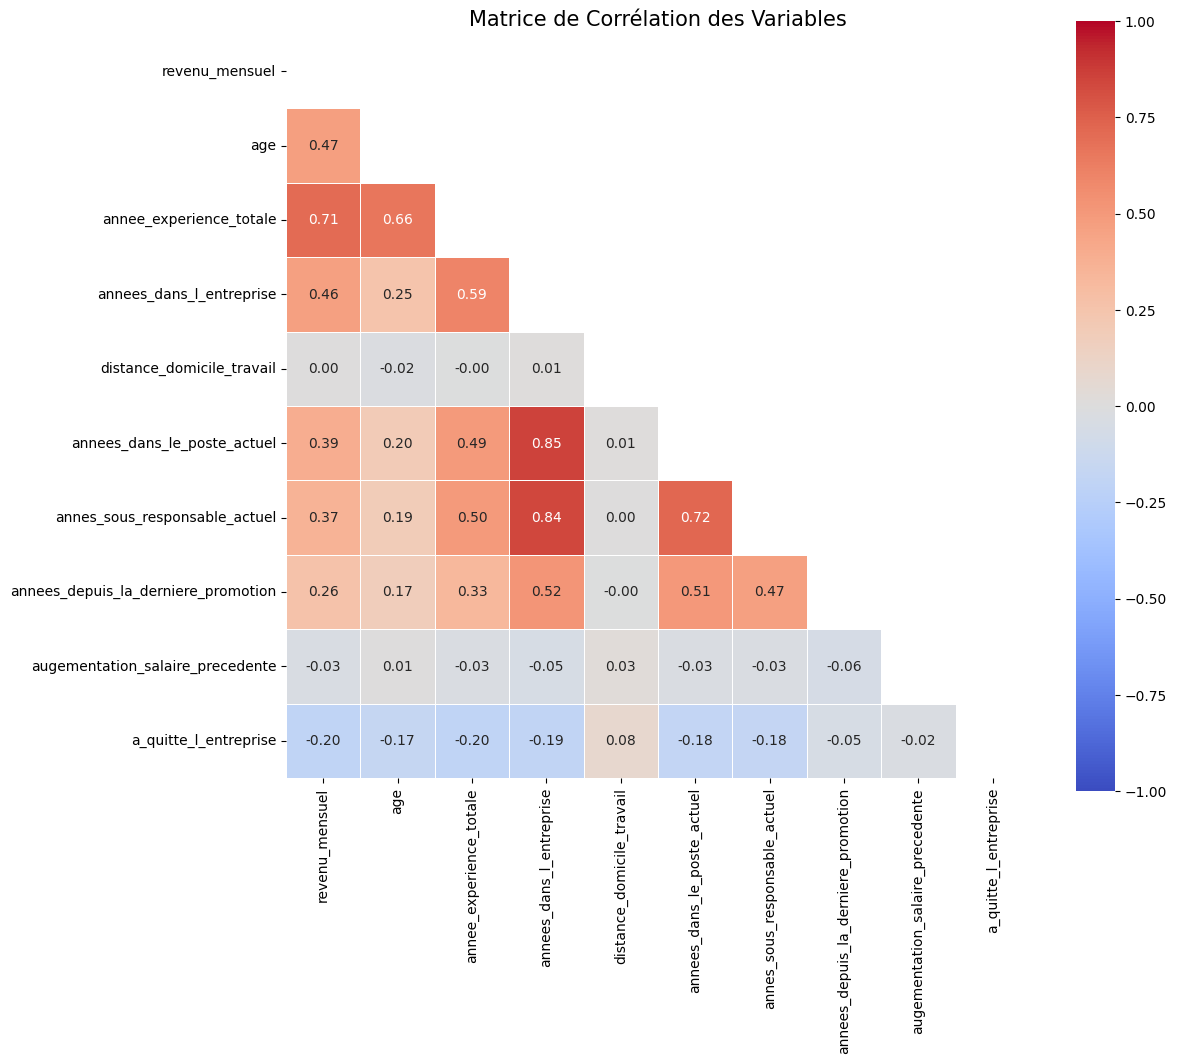

In [44]:
corr_matrix = data_num.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(12, 10)) # Une taille suffisante est clé pour la lisibilité
df_temp = data_num.copy()
df_temp[target] = data['a_quitte_l_entreprise'].apply(lambda x: 1 if x == 'Oui' else 0)
corr_matrix = df_temp.corr(method='spearman', numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Configuration Expert
sns.heatmap(
    corr_matrix,
    annot=True,         # Affiche les chiffres dans les cases
    fmt=".2f",          # Formattage : 2 chiffres après la virgule (lisibilité)
    cmap='coolwarm',    # Palette divergente (Bleu = Négatif, Rouge = Positif)
    center=0,           # Le blanc est à 0 (neutre)
    vmin=-1, vmax=1,    # Borne l'échelle pour que les couleurs soient justes
    linewidths=0.5,     # Petites lignes blanches pour séparer les cases
    square=True,        # Force les cases à être carrées
    mask=mask
)

plt.title("Matrice de Corrélation des Variables", fontsize=15)
plt.show()

#### Catégorielle

In [45]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   genre                                      1470 non-null   object
 1   statut_marital                             1470 non-null   object
 2   departement                                1470 non-null   object
 3   poste                                      1470 non-null   object
 4   nombre_experiences_precedentes             1470 non-null   int64 
 5   satisfaction_employee_environnement        1470 non-null   int64 
 6   note_evaluation_precedente                 1470 non-null   int64 
 7   niveau_hierarchique_poste                  1470 non-null   int64 
 8   satisfaction_employee_nature_travail       1470 non-null   int64 
 9   satisfaction_employee_equipe               1470 non-null   int64 
 10  satisfaction_employee_equilibre_pro_

In [46]:
# 1. Calcul du Taux Global
taux_global = (data_cat['a_quitte_l_entreprise'] == 'Oui').mean()
print(f"--- Taux de départ Global de l'entreprise : {taux_global:.2%} ---\n")

--- Taux de départ Global de l'entreprise : 16.12% ---



##### Analyse Bivariée

**Le Profilage du Risque (Risk Profiling)**

In [47]:
# 2. Liste des colonnes à analyser (Tout sauf la cible)
cols_a_analyser = [c for c in data_cat.columns if c != 'a_quitte_l_entreprise']

In [48]:
risk_data = []

# 3. La Boucle d'Analyse
for col in cols_a_analyser:
    # Tableau croisé : Variable vs Départ (en %)
    ct = pd.crosstab(data_cat[col], data_cat['a_quitte_l_entreprise'], normalize='index')

    # Sécurité : Si une catégorie n'a aucun départ (pas de colonne 'Oui'), on passe
    if 'Oui' in ct.columns:
        # On cherche la catégorie (index) qui a le taux 'Oui' le plus fort
        worst_category = ct['Oui'].idxmax()
        worst_rate = ct['Oui'].max()

        # On ne garde que si c'est significativement supérieur à la moyenne (ex: > Taux Global + 5%)
        if worst_rate > taux_global:
            risk_data.append({
                'Variable': col,
                'Segment_a_Risque': worst_category,
                'Taux_Depart_Segment': round(worst_rate, 4),
                'Ecart_vs_Global': round(worst_rate - taux_global, 4)
            })

In [49]:
# 4. Création et Tri du DataFrame final
df_risk = pd.DataFrame(risk_data).sort_values('Taux_Depart_Segment', ascending=False)
# Affichage avec une barre de progression visuelle (style pandas)
print(df_risk)

                                     Variable         Segment_a_Risque  \
3                                       poste  Représentant Commercial   
6                  note_evaluation_precedente                        1   
10  satisfaction_employee_equilibre_pro_perso                        1   
12                      heure_supplementaires                      Oui   
14                      nb_formations_suivies                        0   
7                   niveau_hierarchique_poste                        1   
16                              domaine_etude      Ressources Humaines   
1                              statut_marital              Célibataire   
4              nombre_experiences_precedentes                        5   
5         satisfaction_employee_environnement                        1   
17                      frequence_deplacement                 Frequent   
13                   nombre_participation_pee                        0   
8        satisfaction_employee_nature_

##### Enquête Croisée (Catégorie vs Catégorie)

In [50]:
# Indice : On croise le Top 1 (Poste) avec le Heures
# On normalise par index pour voir : "Parmi les Commerciaux, quel % fait des heures sup ?"
interaction = pd.crosstab(
    data['poste'],
    data['heure_supplementaires'],
    normalize='index'
)

# Affiche les "mauvais élèves" en premier (ceux qui font le plus d'heures sup)
print(interaction.sort_values(by='Oui', ascending=False))

heure_supplementaires         Non       Oui
poste                                      
Assistant de Direction   0.667808  0.332192
Représentant Commercial  0.710843  0.289157
Cadre Commercial         0.711656  0.288344
Directeur Technique      0.712500  0.287500
Manager                  0.717557  0.282443
Tech Lead                0.731034  0.268966
Senior Manager           0.735294  0.264706
Ressources Humaines      0.750000  0.250000
Consultant               0.760618  0.239382


In [51]:
# Indice : On croise le Top 1 (Poste) avec le top 2 (note_evaluation_precedente)
# On normalise par index pour voir : "Parmi les Commerciaux, quel % fait des heures sup ?"
interaction = pd.crosstab(
    data['poste'],
    data['note_evaluation_precedente'],
    normalize='index'
)

# Affiche les "mauvais élèves" en premier (ceux qui font le plus d'heures sup)
print(interaction.sort_values(by=1, ascending=False))

note_evaluation_precedente         1         2         3         4
poste                                                             
Représentant Commercial     0.084337  0.240964  0.614458  0.060241
Consultant                  0.073359  0.258687  0.567568  0.100386
Cadre Commercial            0.058282  0.254601  0.601227  0.085890
Ressources Humaines         0.057692  0.269231  0.576923  0.096154
Tech Lead                   0.055172  0.289655  0.572414  0.082759
Manager                     0.053435  0.282443  0.541985  0.122137
Directeur Technique         0.050000  0.225000  0.625000  0.100000
Assistant de Direction      0.041096  0.243151  0.592466  0.123288
Senior Manager              0.039216  0.225490  0.656863  0.078431


##### Heatmap d'Association (V de Cramér)

Le V de Cramér, c'est la somme des différences entre la réalité et le hasard ($\chi^2$), divisée par le nombre de personnes ($N$), puis ajustée par la taille du tableau, pour obtenir un pourcentage de corrélation pur.

In [52]:
# 1. La fonction mathématique (V de Cramér)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    with np.errstate(divide='ignore', invalid='ignore'):
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [53]:
# 2. Sélection intelligente des colonnes
# On prend la cible + le top des variables suspectes (numériques déguisées en cat + texte)
cols_etude = [
    'a_quitte_l_entreprise',      # La cible
    'poste',                      # Le suspect n°1
    'note_evaluation_precedente',
    'satisfaction_employee_equilibre_pro_perso',
    'heure_supplementaires',  # Ordinale
    'nb_formations_suivies',           # Ordinale
    'niveau_hierarchique_poste',
    'domaine_etude',
    'nombre_experiences_precedentes',
    'satisfaction_employee_environnement',
    'frequence_deplacement',
    'nombre_participation_pee',
    'satisfaction_employee_nature_travail'
]

# 3. Calcul de la matrice
cramers_matrix = pd.DataFrame(index=cols_etude, columns=cols_etude)

for col1 in cols_etude:
    for col2 in cols_etude:
        cramers_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Conversion en float pour l'affichage
cramers_matrix = cramers_matrix.astype(float)

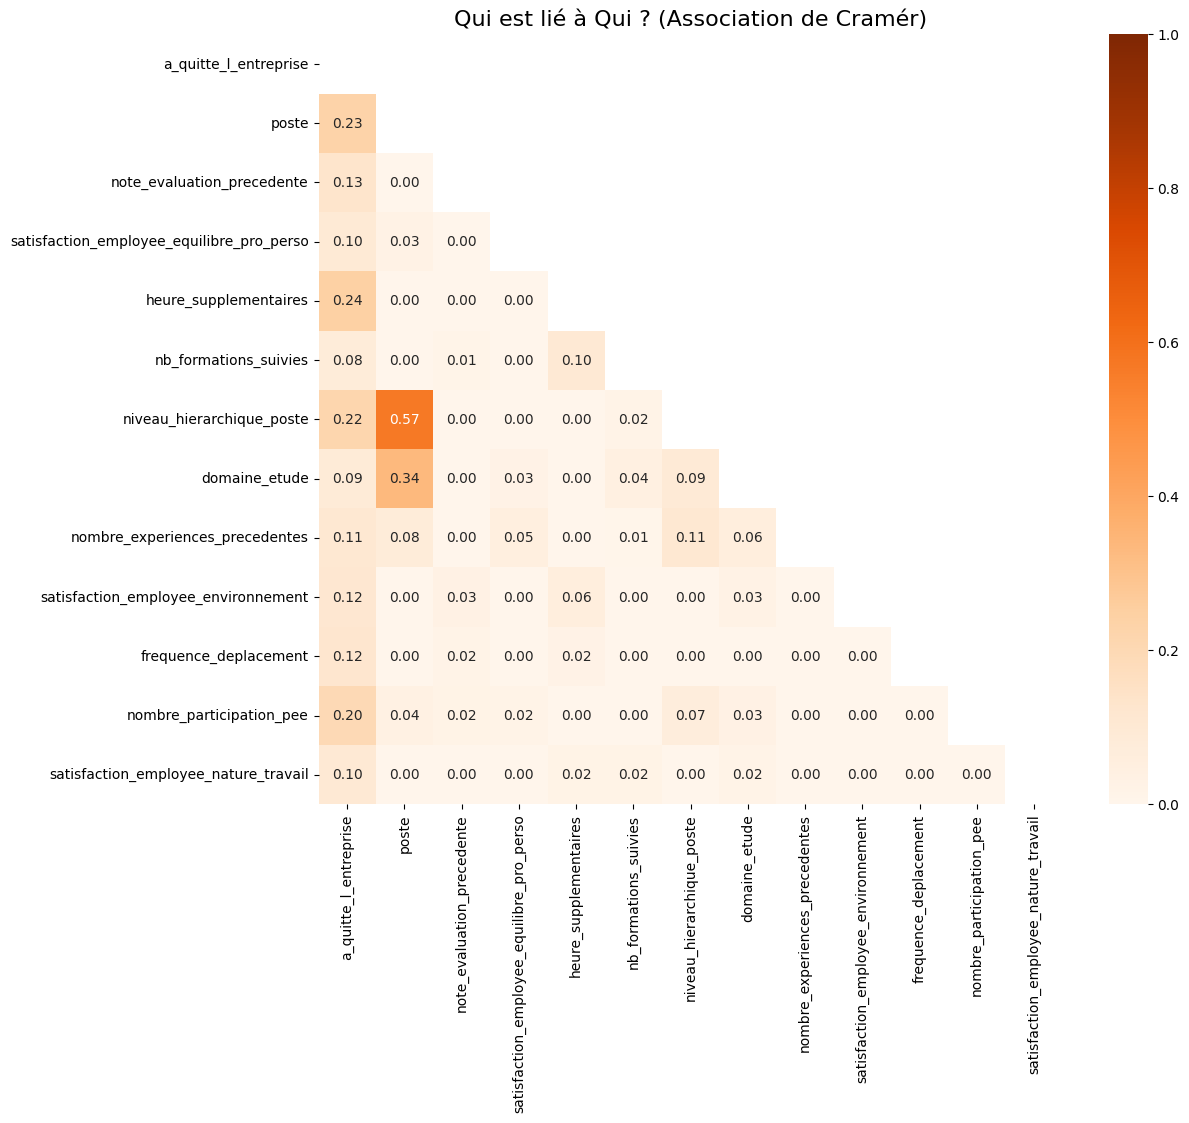

In [54]:
# 4. Affichage
plt.figure(figsize=(12, 10))
# Masque pour couper le triangle haut (doublon)
mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))

sns.heatmap(
    cramers_matrix,
    annot=True,
    fmt=".2f",
    cmap='Oranges',
    mask=mask,
    vmin=0, vmax=1
)
plt.title("Qui est lié à Qui ? (Association de Cramér)", fontsize=16)
plt.show()

#### Global Analyse

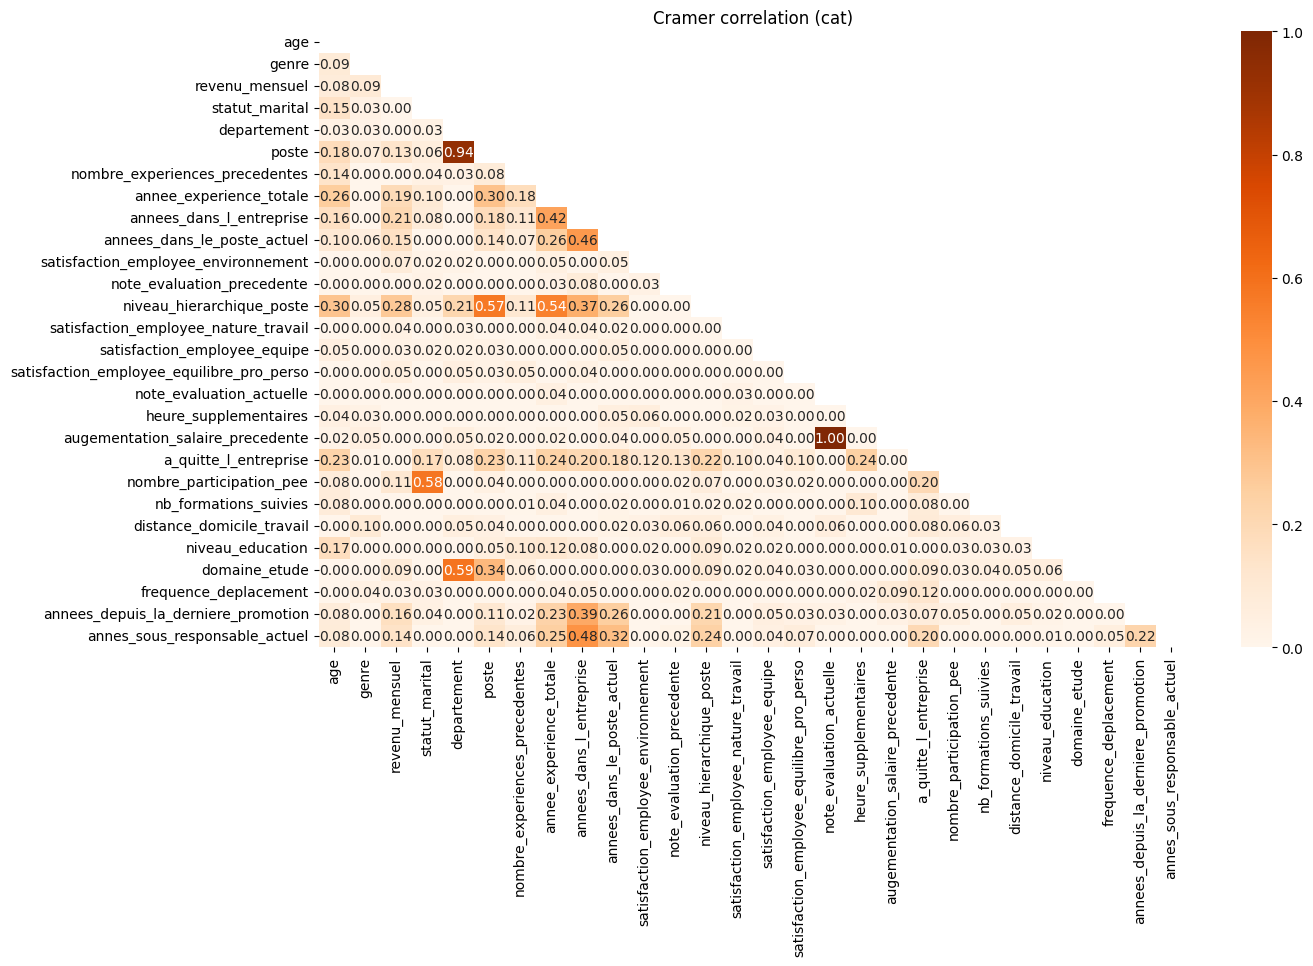

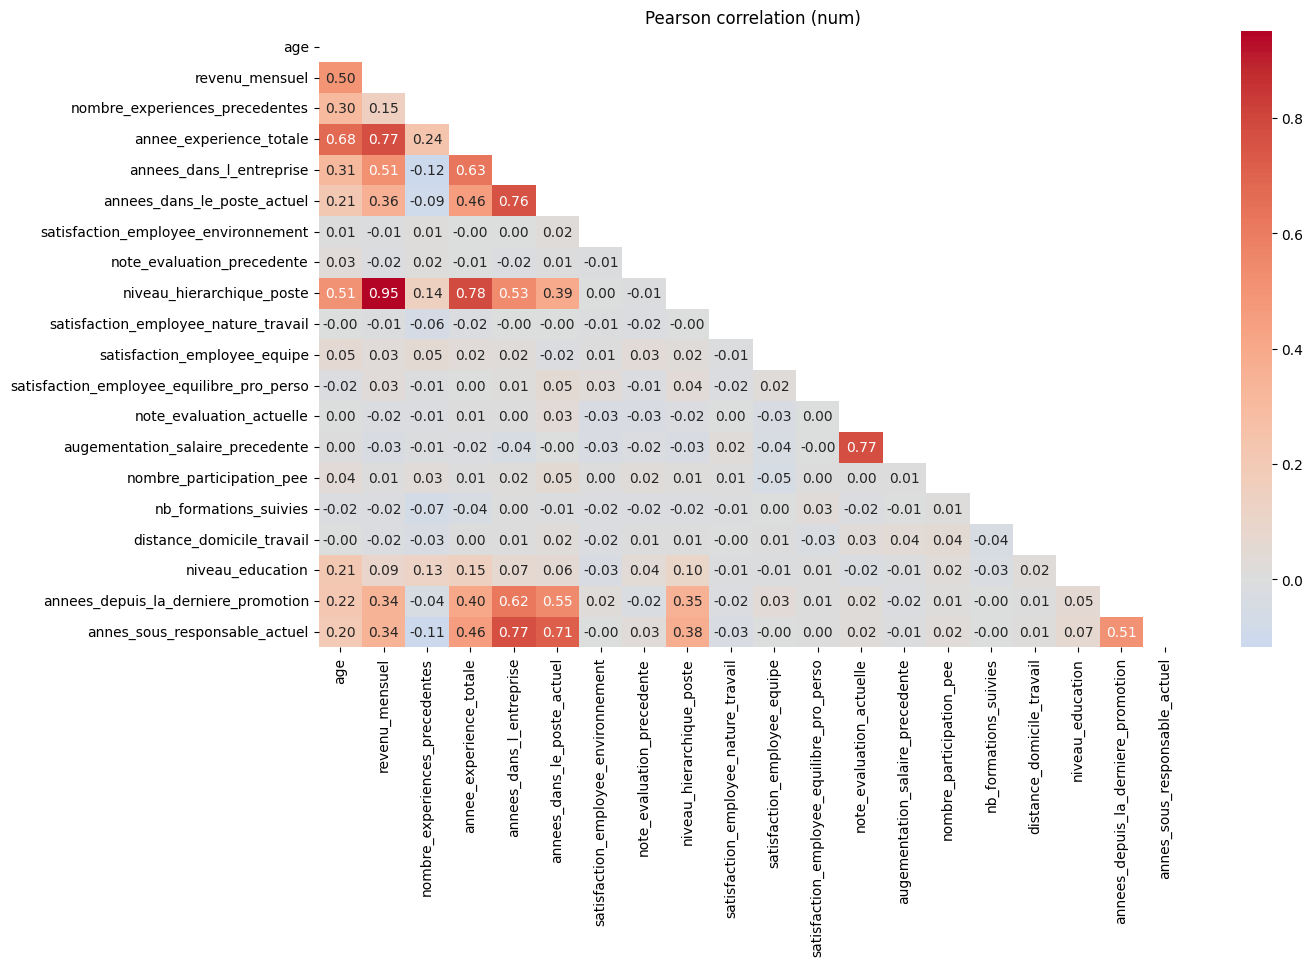

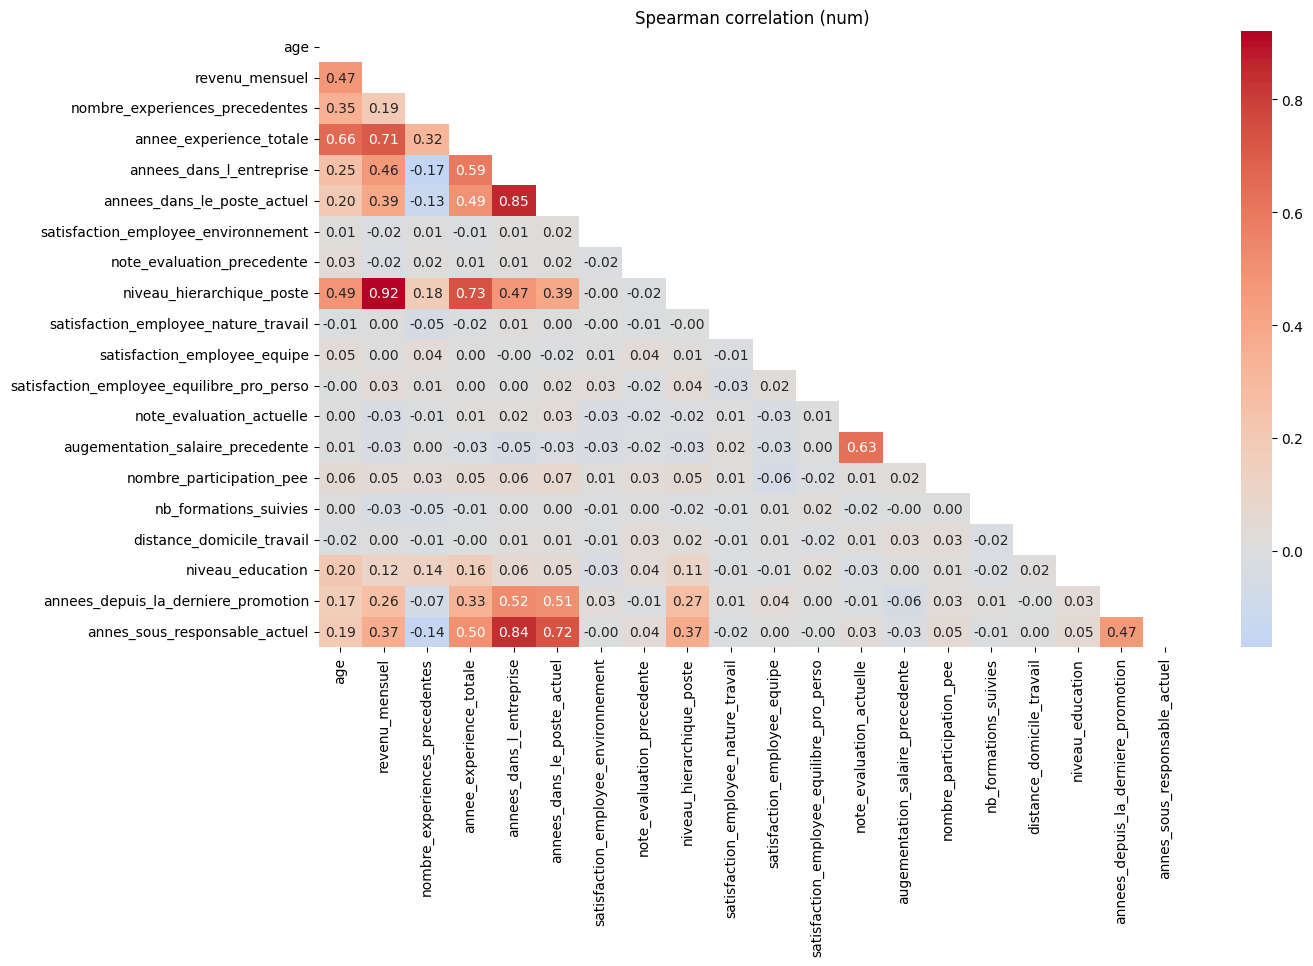

In [55]:
def compare(df, target='a_quitte_l_entreprise'):
    import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
    from scipy import stats

    X = df.copy()  # no mutation

    numeric_cols = []
    for col in X:
        if X[col].dtype == 'int64':
            numeric_cols.append(col)


    categorielle_cols = [col for col in merged_cleaned.columns]

    df_num = X[numeric_cols].copy()
    df_cat = X[categorielle_cols].copy()

    # correlations
    pearson = df_num.corr(method='pearson')
    spearman = df_num.corr(method='spearman')

    cramers_matrix = pd.DataFrame(index=categorielle_cols, columns=categorielle_cols)

    for col1 in categorielle_cols:
        for col2 in categorielle_cols:
            cramers_matrix.loc[col1, col2] = cramers_v(df_cat[col1], df_cat[col2])

    # Conversion en float pour l'affichage
    cramers_matrix = cramers_matrix.astype(float)

    pearson_mask = np.triu(np.ones_like(pearson, dtype=bool))
    spearman_mask= np.triu(np.ones_like(spearman, dtype=bool))
    cramer_mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))

    plt.figure(figsize=(14,8))
    sns.heatmap(
        cramers_matrix,
        annot=True,
        fmt=".2f",
        cmap='Oranges',
        mask=cramer_mask,
        vmin=0, vmax=1
    )
    plt.title('Cramer correlation (cat)')
    plt.show(); plt.close()

    plt.figure(figsize=(14,8))
    sns.heatmap(
        pearson,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        mask=pearson_mask)
    plt.title('Pearson correlation (num)')
    plt.show(); plt.close()

    plt.figure(figsize=(14,8))
    sns.heatmap(
        spearman,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        mask=spearman_mask)
    plt.title('Spearman correlation (num)')
    plt.show(); plt.close()



    return spearman, pearson, cramers_matrix

spearman, pearson, cramers_matrix = compare(merged_cleaned)




<class 'pandas.core.series.Series'>


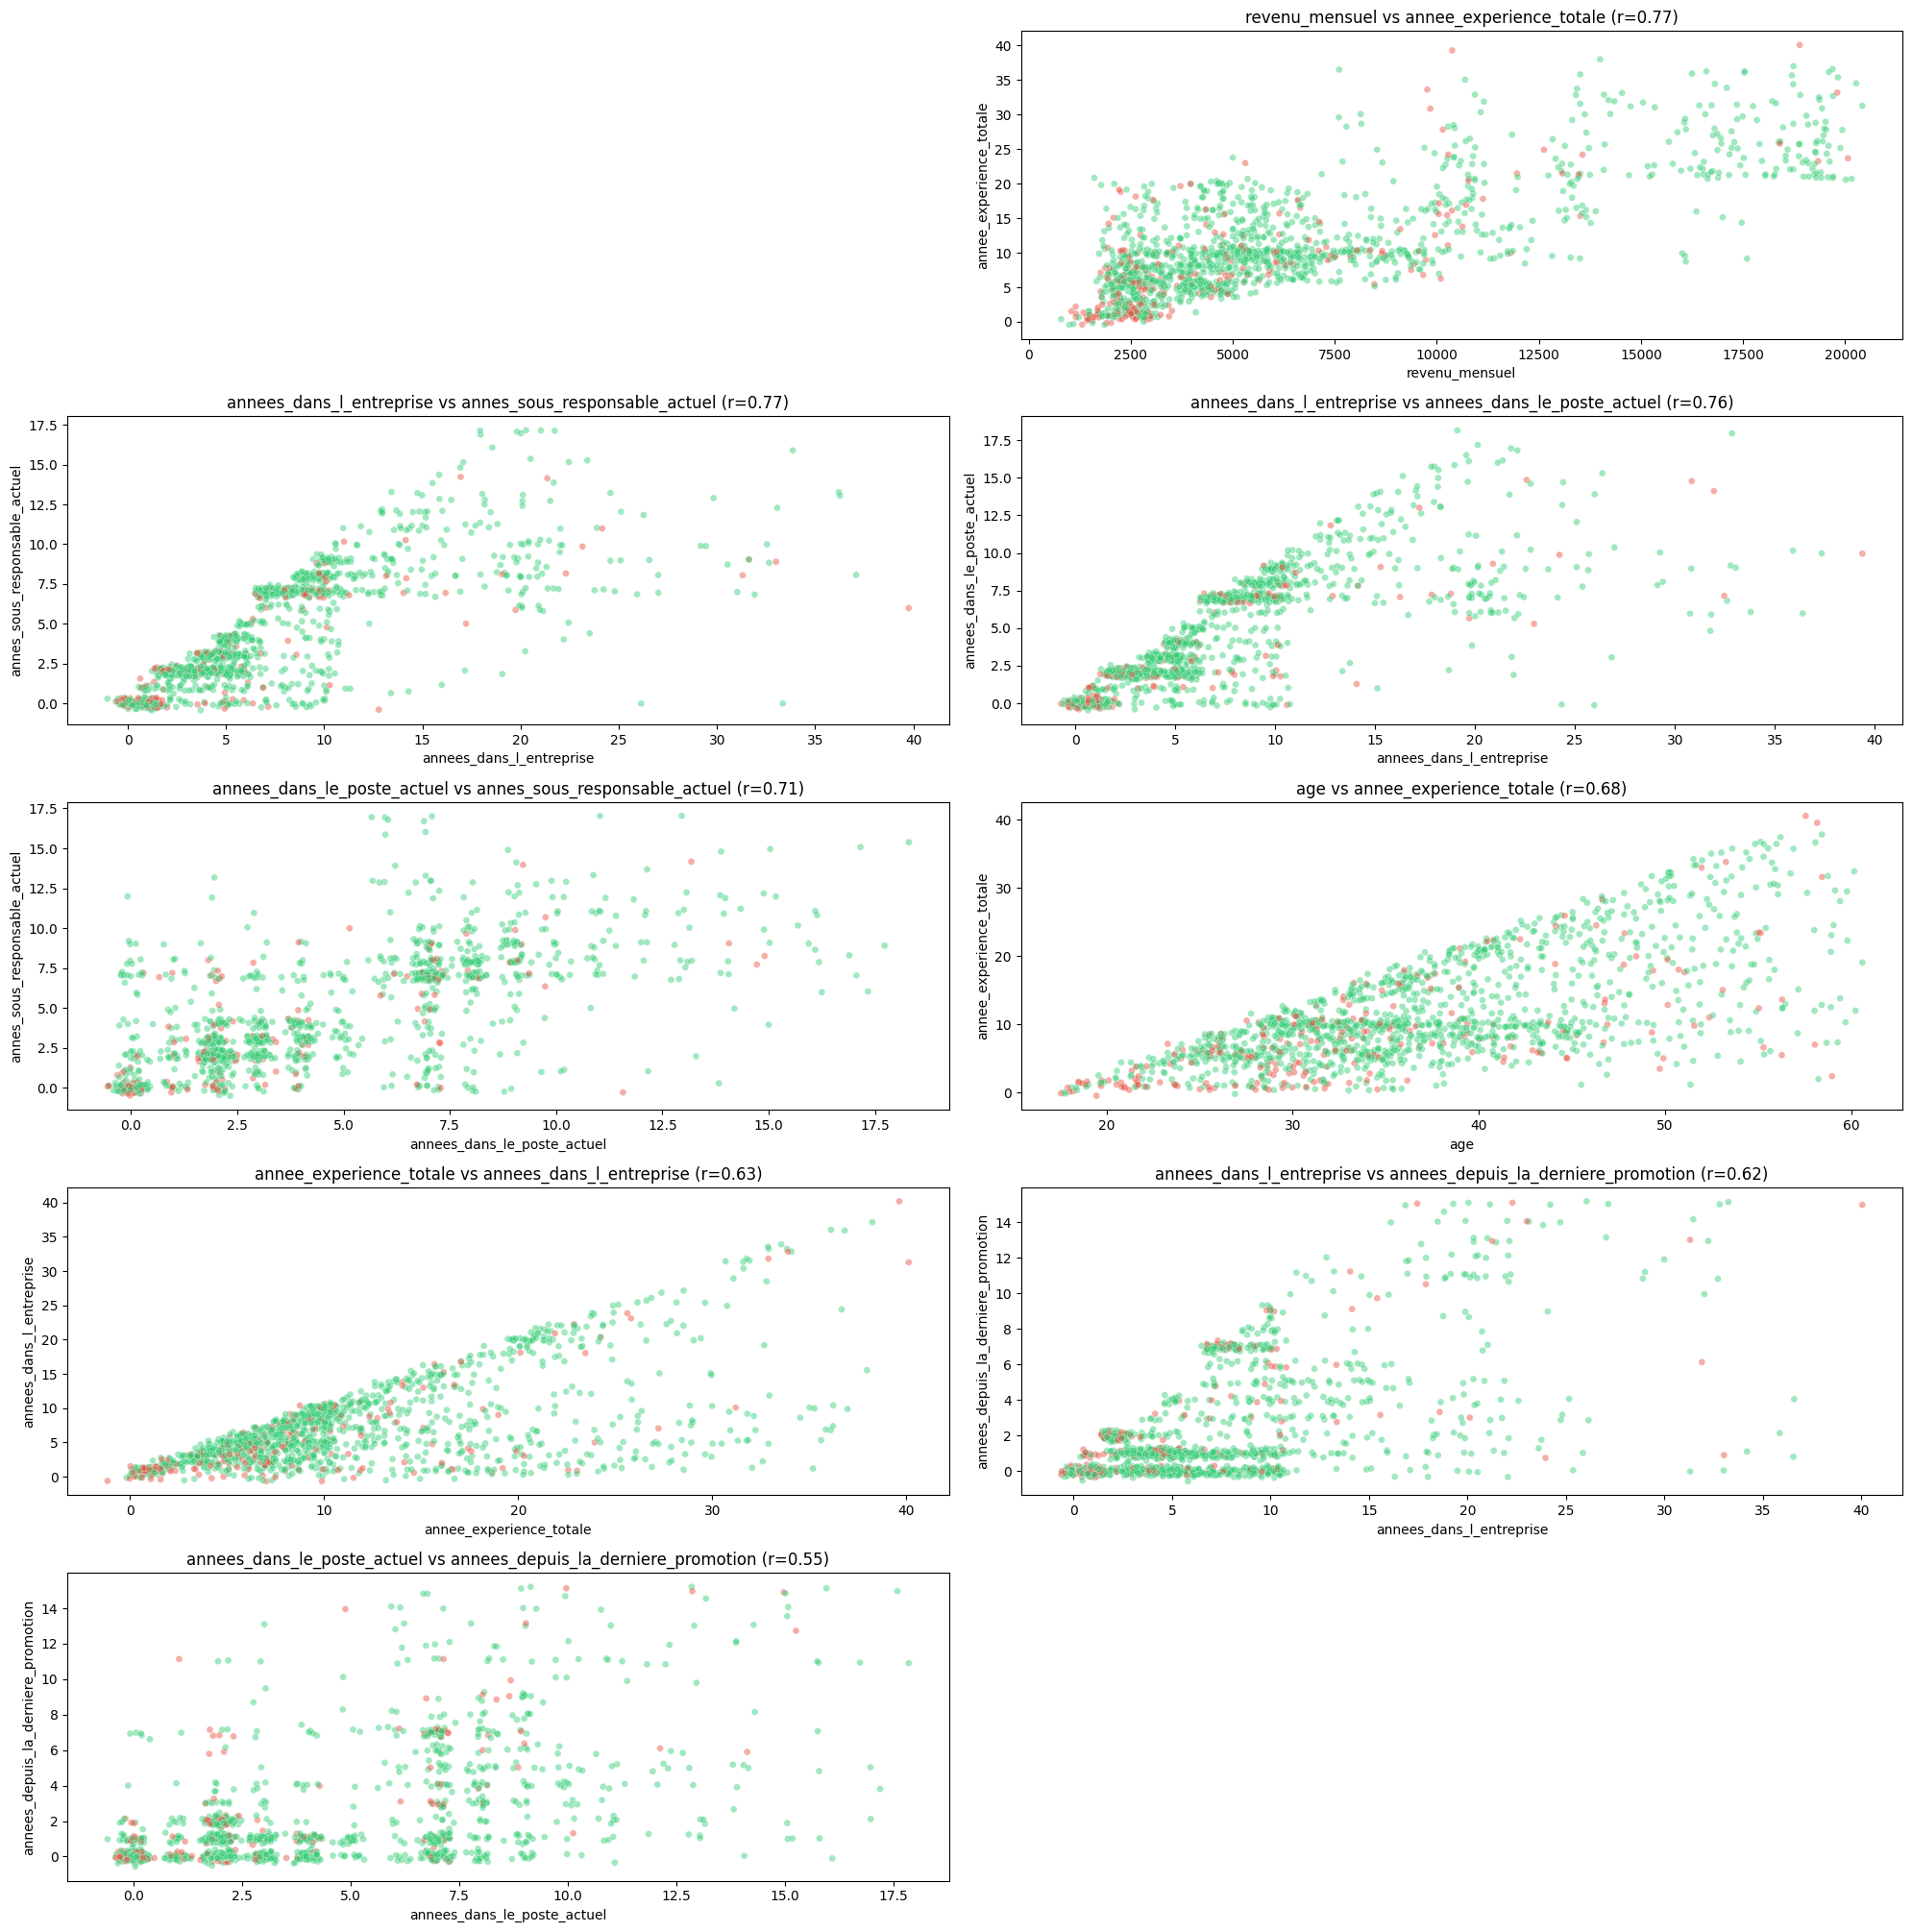

In [56]:
def top_corr_columns_from_matrix(corr_df, threshold=0.20, top_k=None):
    """
    corr_df : DataFrame carrée (corrélation)
    threshold : valeur minimale absolue pour garder une paire
    top_k : si fourni, garde uniquement les top_k paires les plus fortes (après threshold)
    retourne : (set_cols, pairs_series)
    """
    corr = corr_df.copy().abs().astype(float)
    # ne garder que la triangle supérieure (évite doublons et diagonale)
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    upper = corr.where(mask)
    pairs = upper.stack().sort_values(ascending=False)  # Series index=(col1,col2)
    if threshold is not None:
        pairs = pairs[pairs >= threshold]
    if top_k is not None:
        pairs = pairs.head(top_k)
    cols = set([c for idx in pairs.index for c in idx])
    return cols, pairs

# exemples d'usage avec tes matrices existantes
pearson_cols, pearson_pairs = top_corr_columns_from_matrix(pearson, threshold=0.5)
spearman_cols, spearman_pairs = top_corr_columns_from_matrix(spearman, threshold=0.5)
cramer_cols, cramer_pairs = top_corr_columns_from_matrix(cramers_matrix, threshold=0.20)

# union et liste finale sans doublons
final_numerical_cols = sorted(set().union(pearson_cols, spearman_cols))


target = 'a_quitte_l_entreprise'

# "Typeof" n'existe pas en Python — utilisez type() pour obtenir le type,
# et .head() pour un aperçu contenu si nécessaire.

print(type(pearson_pairs))
# Calculate subplot grid (e.g., 2 rows, multiple columns)
n_cols = len(pearson_cols)
n_rows = (n_cols // 2) + 1  # Adjust layout

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # Flatten axes array for easy iteration and indexing

# iterate and unpack correctly: each item from pearson_pairs.items() is ((c1, c2), corr)
for ax, ((c1, c2), corr) in zip(axes, pearson_pairs.items()):

    # guard: ensure columns exist and have enough unique values
    if c1 not in merged_cleaned.columns or c2 not in merged_cleaned.columns:
        ax.set_visible(False)
        continue

    dfp_continuous = merged_cleaned[[c1, c2, target]].dropna().copy()
    if dfp_continuous[c1].nunique() <= 10 or dfp_continuous[c2].nunique() <= 10:
        ax.set_visible(False)
        continue
    dfp = dfp_continuous.copy()

    # optional: add small jitter for discrete/integer columns to reduce overplotting
    for col in (c1, c2):
        if pd.api.types.is_integer_dtype(dfp[col]) or dfp[col].nunique() < 20:
            sigma = dfp[col].std() * 0.05 if dfp[col].std() > 0 else 0.1
            dfp[col] = dfp[col] + np.random.normal(0, sigma, size=len(dfp))

    # use the proper variables for x and y
    sns.scatterplot(data=dfp, x=c1, y=c2, ax=ax, hue=target, alpha=0.45, s=25, palette={'Oui':'#e74c3c','Non':'#2ecc71'}, legend=False)
    ax.set_title(f"{c1} vs {c2} (r={corr:.2f})")

# Hide unused subplots
for ax in axes[len(pearson_pairs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


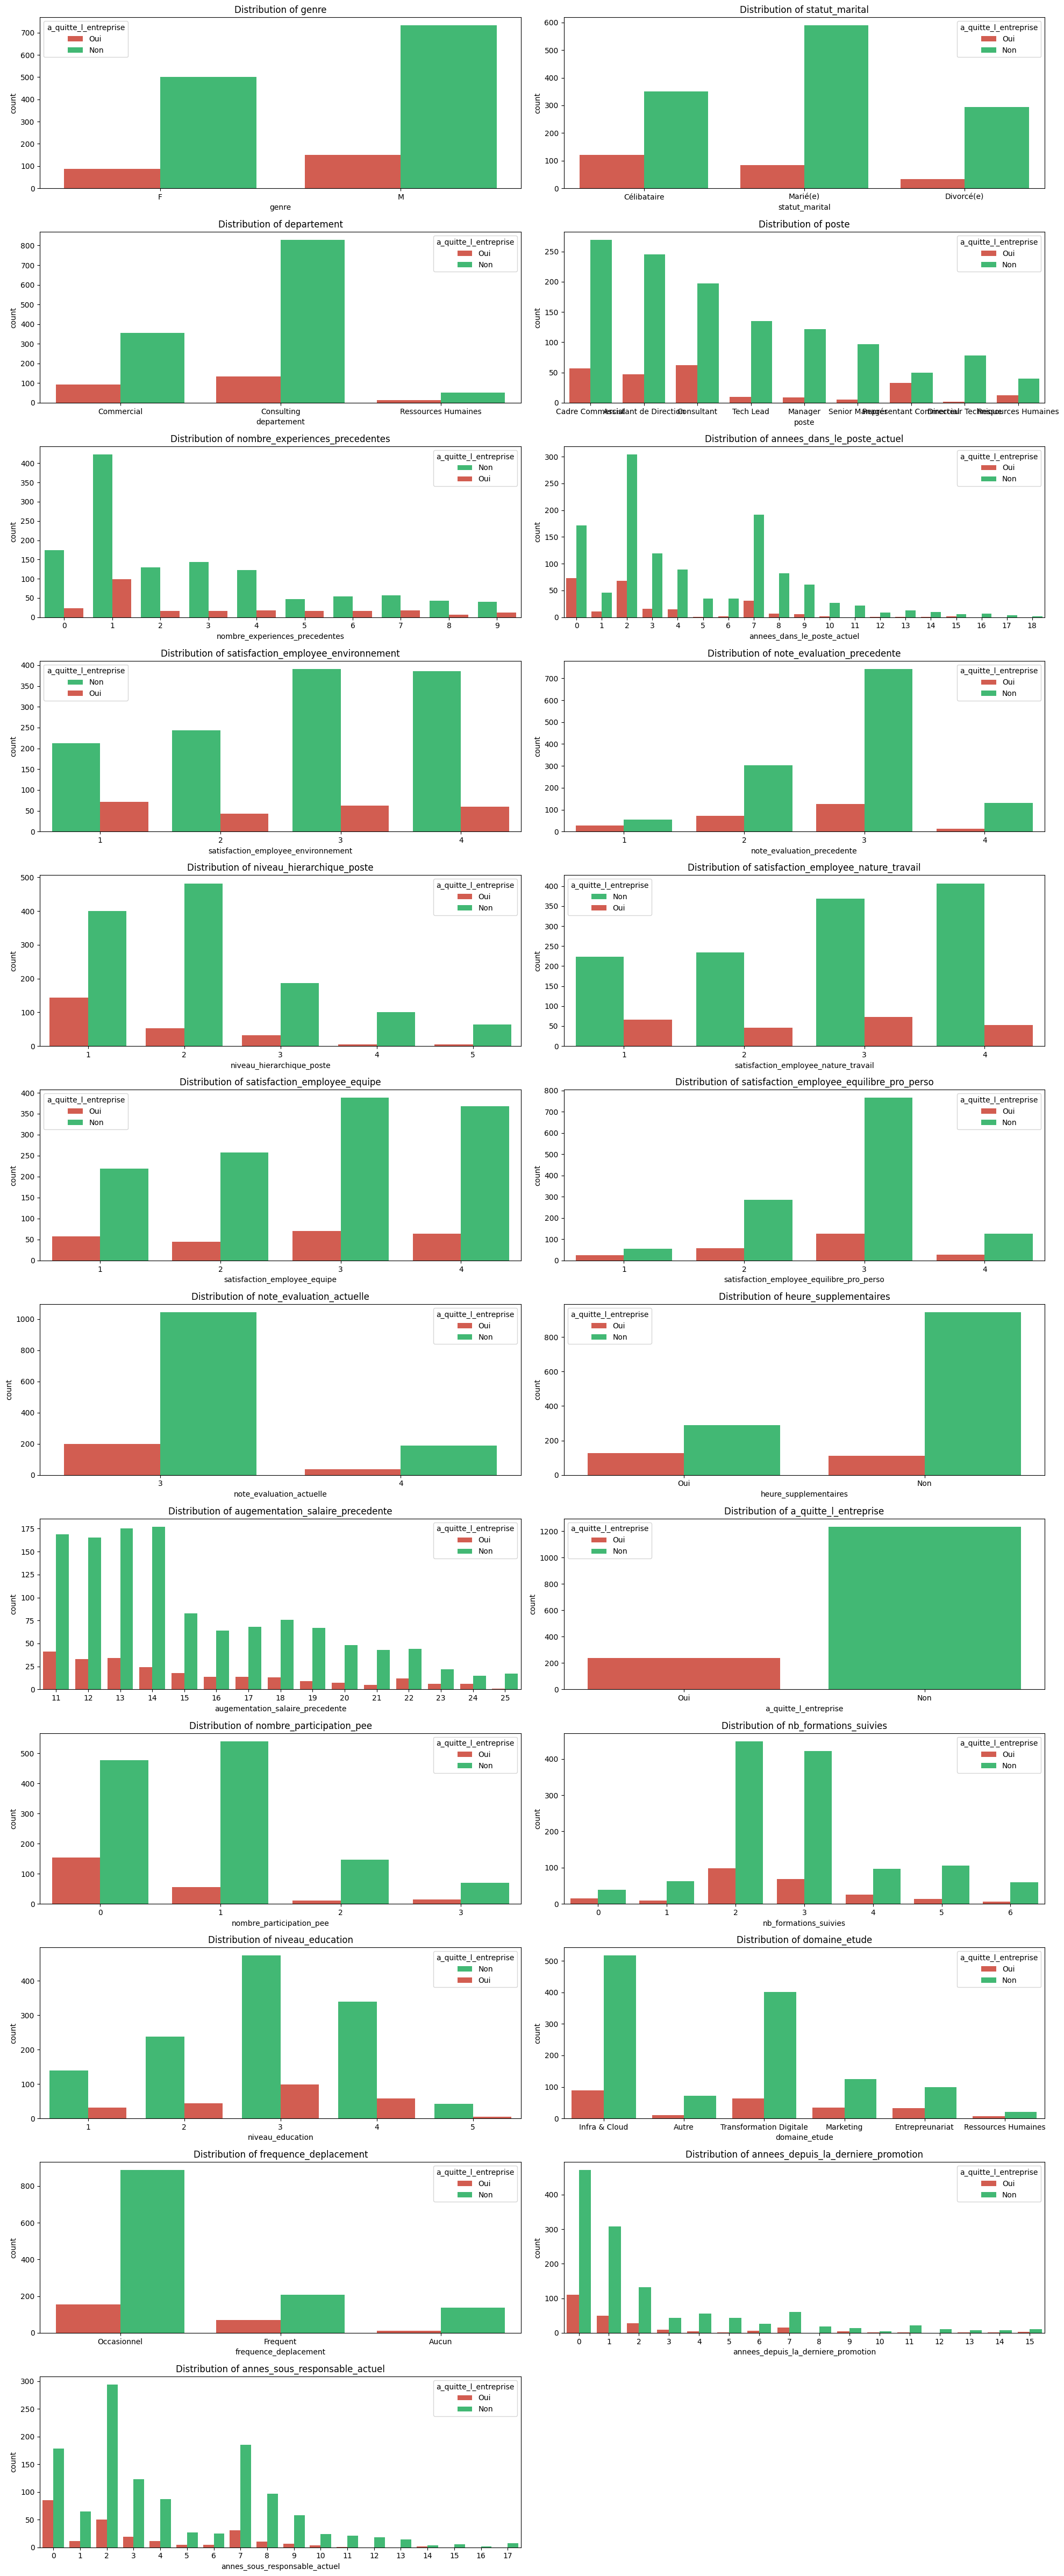

In [57]:
df_cat = merged_cleaned[[c for c in merged_cleaned if merged_cleaned[c].nunique() < 20]]

# Calculate subplot grid (e.g., 2 rows, multiple columns)
n_cols = len(df_cat.columns)
n_rows = (n_cols // 2) + 1  # Adjust layout

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 4 * n_rows))
axes = axes.flat  # Flatten axes array for easy iteration

for ax, col in zip(axes, df_cat):
    sns.countplot(data=df_cat, x=col, ax=ax, hue=target, palette={'Oui': '#e74c3c', 'Non': '#2ecc71'}, legend='brief')
    ax.set_title(f'Distribution of {col}')

# Hide unused subplots
for ax in axes[n_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Étape 2 Préparation de la donnée pour le machine learning

### Data preprocessing & Features Engineering

#### DATA selection 

###### Manual step by step

In [58]:
# data.columns
dataset = data.drop(columns=["id_employee","annes_sous_responsable_actuel","annees_dans_l_entreprise",
                             "niveau_hierarchique_poste","nombre_heures_travailless","nombre_employee_sous_responsabilite","ayant_enfants"])
dataset.nunique()


age                                            43
genre                                           2
revenu_mensuel                               1349
statut_marital                                  3
departement                                     3
poste                                           9
nombre_experiences_precedentes                 10
annee_experience_totale                        40
annees_dans_le_poste_actuel                    19
satisfaction_employee_environnement             4
note_evaluation_precedente                      4
satisfaction_employee_nature_travail            4
satisfaction_employee_equipe                    4
satisfaction_employee_equilibre_pro_perso       4
note_evaluation_actuelle                        2
heure_supplementaires                           2
augementation_salaire_precedente               15
a_quitte_l_entreprise                           2
nombre_participation_pee                        4
nb_formations_suivies                           7


In [59]:
merged, report  = merge_and_report(sirh, eval, sondage)
print(merged.columns)
print(report)
col_to_del = merged.columns[(merged.nunique() == 1) | merged.columns.isin(['id_employee', 'code_sondage', 'eval_number'])]
merged_cleaned = clean_basic(merged, col_to_del)
print(merged_cleaned.info())

Rows before: {'sirh': 1470, 'eval': 1470, 'sondage': 1470}, rows after merged: 1470, lost from sirh: 0
Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'nombre_heures_travailless', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'nombre_employee_sous_responsabilite', 'code_sondage',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'ayant_enfants', 'frequence_deplacement',

###### Automatic function

In [60]:
def remove_high_corr(df, threshold=0.90, ignore_cols=None, target=None, show=True):
    """
    Supprime automatiquement des colonnes numériques corrélées >= threshold (abs).
    Heuristique : pour chaque paire corrélée on supprime la colonne ayant la plus grande moyenne d'|corr| aux autres.
    Retourne (df_reduced, dropped_list)
    """
    X = df.copy()
    if ignore_cols is None:
        ignore_cols = []
    if target and target in X.columns:
        ignore_cols = ignore_cols + [target]
    num = X.select_dtypes(include=['number']).drop(columns=[c for c in ignore_cols if c in X.columns], errors='ignore')
    corr = num.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = set()
    # find pairs >= threshold
    pairs = [(c1, c2, upper.loc[c1, c2]) for c1 in upper.index for c2 in upper.columns if pd.notna(upper.loc[c1, c2]) and upper.loc[c1, c2] >= threshold]
    # decide which to drop
    for c1, c2, val in pairs:
        if c1 in to_drop or c2 in to_drop:
            continue
        mean1 = corr[c1].mean()
        mean2 = corr[c2].mean()
        drop = c1 if mean1 > mean2 else c2
        to_drop.add(drop)
    dropped = [c for c in to_drop if c in X.columns]
    X = X.drop(columns=dropped, errors='ignore')
    if show:
        print(f"Threshold={threshold}, dropped {len(dropped)} columns:", dropped)
    return X, dropped

dataset_no_corr, drop = remove_high_corr(merged_cleaned, target='a_quitte_l_entreprise')


Threshold=0.9, dropped 1 columns: ['niveau_hierarchique_poste']


#### Feature Engineering

##### Manual step by step

In [61]:
df = dataset_no_corr.copy()
df.columns

Index(['age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement',
       'poste', 'nombre_experiences_precedentes', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'heure_supplementaires', 'augementation_salaire_precedente',
       'a_quitte_l_entreprise', 'nombre_participation_pee',
       'nb_formations_suivies', 'distance_domicile_travail',
       'niveau_education', 'domaine_etude', 'frequence_deplacement',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel'],
      dtype='object')

In [62]:
# Ratios Frustration
df['Ratio_Revenu_Experience'] = df['revenu_mensuel'] / df['annee_experience_totale']

df['Ratio_Revenu_Age'] = df['revenu_mensuel'] / df['age']

df.head(1)

age genre  revenu_mensuel statut_marital departement             poste  \
0   41     F            5993    Célibataire  Commercial  Cadre Commercial   

   nombre_experiences_precedentes  annee_experience_totale  \
0                               8                        8   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  ...  \
0                         6                            4  ...   

   nombre_participation_pee  nb_formations_suivies  distance_domicile_travail  \
0                         0                      0                          1   

   niveau_education  domaine_etude  frequence_deplacement  \
0                 2  Infra & Cloud            Occasionnel   

  annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  \
0                                   0                              5   

  Ratio_Revenu_Experience  Ratio_Revenu_Age  
0                 749.125        146.170732  

[1 rows x 29 columns]

In [63]:
# Indicateurs Stagnation / Stabilité
df['Taux_Stagnation']= df['annees_dans_le_poste_actuel'] / df['annees_dans_l_entreprise'] # proche de 1 = aucune évolution

df['Fidelite_Manager']= df['annes_sous_responsable_actuel'] / df['annees_dans_le_poste_actuel'] # fréquence de changement de manager

df.head(1)

age genre  revenu_mensuel statut_marital departement             poste  \
0   41     F            5993    Célibataire  Commercial  Cadre Commercial   

   nombre_experiences_precedentes  annee_experience_totale  \
0                               8                        8   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  ...  \
0                         6                            4  ...   

   distance_domicile_travail  niveau_education  domaine_etude  \
0                          1                 2  Infra & Cloud   

   frequence_deplacement  annees_depuis_la_derniere_promotion  \
0            Occasionnel                                    0   

   annes_sous_responsable_actuel Ratio_Revenu_Experience  Ratio_Revenu_Age  \
0                              5                 749.125        146.170732   

  Taux_Stagnation  Fidelite_Manager  
0        0.666667              1.25  

[1 rows x 31 columns]

In [64]:
# Job Hopping / Chiffre vers le bas égale job hopping chronique
df['Duree_Moyenne_Par_Job'] = df['annee_experience_totale'] / (df['nombre_experiences_precedentes']+1)
df.head(1)

age genre  revenu_mensuel statut_marital departement             poste  \
0   41     F            5993    Célibataire  Commercial  Cadre Commercial   

   nombre_experiences_precedentes  annee_experience_totale  \
0                               8                        8   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  ...  \
0                         6                            4  ...   

   niveau_education  domaine_etude  frequence_deplacement  \
0                 2  Infra & Cloud            Occasionnel   

   annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  \
0                                    0                              5   

   Ratio_Revenu_Experience Ratio_Revenu_Age  Taux_Stagnation Fidelite_Manager  \
0                  749.125       146.170732         0.666667             1.25   

   Duree_Moyenne_Par_Job  
0               0.888889  

[1 rows x 32 columns]

In [65]:
df['distance_domicile_travail'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distance_domicile_travail, dtype: float64

In [66]:
# Discrétisation
## Transformation de la serie distance_domicile_travail pour un groupement  : proche, moyen ,loin ,très loin --> 0,1,2,3
df['distance_cat'] = df['distance_domicile_travail'].apply(
    lambda x: 0 if x <= 2 else  # proche
              1 if x <= 7 else  # moyen
              2 if x <= 14 else # loin
              3                 # très loin
)
df['distance_cat'].unique()

array([0, 2, 1, 3])

##### Auto Function

In [67]:
def features_engineering(df, drop_originals=True):
    ds = df.copy()
    # Ratios Frustration
    ds['Ratio_Revenu_Experience'] = ds['revenu_mensuel'] / (ds['annee_experience_totale']+1)
    ds['Ratio_Revenu_Age'] = ds['revenu_mensuel'] / ds['age']
    # Indicateurs Stagnation / Stabilité
    ds['Taux_Stagnation']= ds['annees_dans_le_poste_actuel'] / (ds['annees_dans_l_entreprise']+1) # proche de 1 = aucune évolution
    ds['Fidelite_Manager']= ds['annes_sous_responsable_actuel'] / (ds['annees_dans_le_poste_actuel']+1) # fréquence de changement de manager
    # Job Hopping / Chiffre vers le bas égale job hopping chronique
    ds['Duree_Moyenne_Par_Job'] = ds['annee_experience_totale'] / (ds['nombre_experiences_precedentes']+1)
    # Discrétisation
    ## Transformation de la serie distance_domicile_travail pour un groupement  : proche, moyen ,loin ,très loin --> 0,1,2,3
    ds['distance_cat'] = ds['distance_domicile_travail'].apply(
        lambda x: 0 if x <= 2 else  # proche
                1 if x <= 7 else  # moyen
                2 if x <= 14 else # loin
                3                 # très loin
    )
    if drop_originals:
        # Option : supprimer les variables utilisées pour créer les ratios
        ds = ds.drop(columns=['revenu_mensuel','annee_experience_totale', 'annees_dans_l_entreprise', 'annes_sous_responsable_actuel', 'distance_domicile_travail'], errors='ignore')

    return ds, ['Ratio_Revenu_Experience', 'Ratio_Revenu_Age', 'Taux_Stagnation', 'Fidelite_Manager', 'Duree_Moyenne_Par_Job', 'distance_cat']

#### DATA Object converting to numerical data
//  Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 1   genre                                      1470 non-null   object
 3   statut_marital                             1470 non-null   object / 'Marié(e)' / 'Célibataire' / 'Divorcé(e)'
 4   departement                                1470 non-null   object / ['Commercial', 'Consulting', 'Ressources Humaines'],
 5   poste                                      1470 non-null   object / ['Cadre Commercial', 'Assistant de Direction', 'Consultant','Tech Lead', 'Manager', 'Senior Manager','Représentant Commercial', 'Directeur Technique', 'Ressources Humaines']

 15  heure_supplementaires                      1470 non-null   object 
 17  a_quitte_l_entreprise                      1470 non-null   object
 22  domaine_etude                              1470 non-null   object / ['Infra & Cloud', 'Autre', 'Transformation Digitale', 'Marketing', 'Entrepreunariat', 'Ressources Humaines']
 23  frequence_deplacement                      1470 non-null   object / ['Occasionnel', 'Frequent', 'Aucun']

// donnée non numérique binaire attention !
genre                                           2 # M/F
heure_supplementaires                           2 # Oui/Non
a_quitte_l_entreprise                           2 # Oui/Non

##### Simple Binary mapping

In [68]:
data_cat.dtypes

genre                                        object
statut_marital                               object
departement                                  object
poste                                        object
nombre_experiences_precedentes                int64
satisfaction_employee_environnement           int64
note_evaluation_precedente                    int64
niveau_hierarchique_poste                     int64
satisfaction_employee_nature_travail          int64
satisfaction_employee_equipe                  int64
satisfaction_employee_equilibre_pro_perso     int64
note_evaluation_actuelle                      int64
heure_supplementaires                        object
a_quitte_l_entreprise                        object
nombre_participation_pee                      int64
nb_formations_suivies                         int64
niveau_education                              int64
domaine_etude                                object
ayant_enfants                                object
frequence_de

###### Panda Apply

In [69]:
cols_binaires_object = data_cat.columns[(data_cat.nunique() == 2) & (data_cat.dtypes == 'object')]
dataset_encoded = dataset.copy()

# Panda apply / map est encore mieux pour ce cas
for col in dataset[cols_binaires_object]:
    loc_value = dataset[col].unique()
    dataset_encoded[col] = dataset[col].apply(
        lambda x: 0 if x == loc_value[0] else 1
    )

dataset_encoded.head(5)

age  genre  revenu_mensuel statut_marital departement  \
0   41      0            5993    Célibataire  Commercial   
1   49      1            5130       Marié(e)  Consulting   
2   37      1            2090    Célibataire  Consulting   
3   33      0            2909       Marié(e)  Consulting   
4   27      1            3468       Marié(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   annee_experience_totale  annees_dans_le_poste_actuel  \
0                        8                            4   
1                       10                            7   
2                        7                            0   
3                        8                            7   
4                        6                            2   

   satisfaction_employee_environnement  ...  heure_supplementaires  \
0                                    2  ...                      0   
1                                    3  ...                      1   
2                                    4  ...                      0   
3                                    4  ...                      0   
4                                    1  ...                      1   

   augementation_salaire_precedente  a_quitte_l_entreprise  \
0                                11                      0   
1                                23                      1   
2                                15                      0   
3                                11                      1   
4                                12                      1   

   nombre_participation_pee  nb_formations_suivies  distance_domicile_travail  \
0                         0                      0                          1   
1                         1                      3                          8   
2                         0                      3                          2   
3                         0                      3                          3   
4                         1                      3                          2   

   niveau_education            domaine_etude  frequence_deplacement  \
0                 2            Infra & Cloud            Occasionnel   
1                 1            Infra & Cloud               Frequent   
2                 2                    Autre            Occasionnel   
3                 4            Infra & Cloud               Frequent   
4                 1  Transformation Digitale            Occasionnel   

   annees_depuis_la_derniere_promotion  
0                                    0  
1                                    1  
2                                    0  
3                                    3  
4                                    2  

[5 rows x 25 columns]

###### Sklearn Label Encode

In [70]:
from sklearn.preprocessing import LabelEncoder
cols_binaires_object = data_cat.columns[(data_cat.nunique() == 2) & (data_cat.dtypes == 'object')]
dataset_encoded = dataset.copy()

# Sklearn apply
for col in dataset[cols_binaires_object]:
    le = LabelEncoder()
    dataset_encoded[col]= le.fit_transform(dataset[col])

dataset_encoded.head(5)

age  genre  revenu_mensuel statut_marital departement  \
0   41      0            5993    Célibataire  Commercial   
1   49      1            5130       Marié(e)  Consulting   
2   37      1            2090    Célibataire  Consulting   
3   33      0            2909       Marié(e)  Consulting   
4   27      1            3468       Marié(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   annee_experience_totale  annees_dans_le_poste_actuel  \
0                        8                            4   
1                       10                            7   
2                        7                            0   
3                        8                            7   
4                        6                            2   

   satisfaction_employee_environnement  ...  heure_supplementaires  \
0                                    2  ...                      1   
1                                    3  ...                      0   
2                                    4  ...                      1   
3                                    4  ...                      1   
4                                    1  ...                      0   

   augementation_salaire_precedente  a_quitte_l_entreprise  \
0                                11                      1   
1                                23                      0   
2                                15                      1   
3                                11                      0   
4                                12                      0   

   nombre_participation_pee  nb_formations_suivies  distance_domicile_travail  \
0                         0                      0                          1   
1                         1                      3                          8   
2                         0                      3                          2   
3                         0                      3                          3   
4                         1                      3                          2   

   niveau_education            domaine_etude  frequence_deplacement  \
0                 2            Infra & Cloud            Occasionnel   
1                 1            Infra & Cloud               Frequent   
2                 2                    Autre            Occasionnel   
3                 4            Infra & Cloud               Frequent   
4                 1  Transformation Digitale            Occasionnel   

   annees_depuis_la_derniere_promotion  
0                                    0  
1                                    1  
2                                    0  
3                                    3  
4                                    2  

[5 rows x 25 columns]

##### One-Hot Encoding

In [71]:
cols_a_ohe = data_cat.columns[(data_cat.nunique() > 2) & (data_cat.dtypes == 'object')]
print(cols_a_ohe)
# Application de la fonction au DataFrame complet
data_final_X = pd.get_dummies(
    dataset_encoded.drop(columns=['a_quitte_l_entreprise']),
    columns=cols_a_ohe, # Pandas va transformer SEULEMENT ces colonnes
    drop_first=True,
    dtype=int           # On garde l'encodage numérique propre
)
data_final_X.info()


Index(['statut_marital', 'departement', 'poste', 'domaine_etude',
       'frequence_deplacement'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        1470 non-null   int64
 1   genre                                      1470 non-null   int64
 2   revenu_mensuel                             1470 non-null   int64
 3   nombre_experiences_precedentes             1470 non-null   int64
 4   annee_experience_totale                    1470 non-null   int64
 5   annees_dans_le_poste_actuel                1470 non-null   int64
 6   satisfaction_employee_environnement        1470 non-null   int64
 7   note_evaluation_precedente                 1470 non-null   int64
 8   satisfaction_employee_nature_travail       1470 non-null   int64
 9

In [72]:
y = dataset_encoded['a_quitte_l_entreprise']
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: a_quitte_l_entreprise, dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder
def encode_features(df, target='a_quitte_l_entreprise', ordinal_maps=None, drop_first=True, ohe_dtype=int):
    """
    Encodage :
      - map binary object cols automatically (nunique==2) -> 0/1
      - apply ordinal_maps: dict col -> ordered list (lowest->highest)
      - one-hot pour le reste des object cols (nunique>2)
    Retourne X (DataFrame numeric ready) et y (Series 0/1)
    """
    import pandas as pd
    X = df.copy()
    # target y
    y = None
    if target and target in X.columns:
        y = X[target].map({'Oui':1, 'Non':0}) if X[target].dtype == object else X[target].copy()
    # binary object
    bin_cols = [c for c in X.columns if X[c].dtype == object and X[c].nunique() == 2 and c != target]
    for c in bin_cols:
        le = LabelEncoder()
        X[c]= le.fit_transform(X[c])

    # ordinal
    if ordinal_maps:
        for c, order in ordinal_maps.items():
            if c in X.columns:
                mapper = {v:i for i,v in enumerate(order)}
                X[c] = X[c].map(mapper)
    # one-hot for remaining object cols (exclude target)
    ohe_cols = [c for c in X.columns if X[c].dtype == object and c != target]
    if ohe_cols:
        X = pd.get_dummies(X, columns=ohe_cols, drop_first=drop_first, dtype=ohe_dtype)
    # final: ensure numeric types
    X = X.select_dtypes(include=['number'])
    return X, y

## PipeLine Etape 1/2

In [74]:
def build_X_y_pipeline(sirh, eval_df, sondage,
                       corr_threshold=0.90,
                       ordinal_maps=None,
                       target='a_quitte_l_entreprise'):
    """
    Workflow complet : merge -> clean -> drop strong corr -> encode -> return X,y + metadata
    """
    merged, report = merge_and_report(sirh, eval_df, sondage, show=False)
    col_to_del = merged.columns[(merged.nunique() == 1) | merged.columns.isin(['id_employee', 'code_sondage', 'eval_number'])]
    cleaned = clean_basic(merged, drop_cols=col_to_del)
    reduced, dropped = remove_high_corr(cleaned, threshold=corr_threshold, ignore_cols=[target], target=target, show=False)
    enhanced, added = features_engineering(reduced)
    X, y = encode_features(enhanced, target=target, ordinal_maps=ordinal_maps)
    meta = {'merge_report': report, 'dropped_corr': dropped, 'features_engineering':  added, 'X_shape': X.shape, 'y_shape': None if y is None else y.shape}
    return X, y, meta

In [75]:
merged, report = merge_and_report(sirh, eval, sondage, show=False)
col_to_del = merged.columns[(merged.nunique() == 1) | merged.columns.isin(['id_employee', 'code_sondage', 'eval_number'])]
cleaned = clean_basic(merged, drop_cols=col_to_del)
X_basic, y_basic = encode_features(cleaned, target=target, ordinal_maps=None)

In [76]:

X, y , meta = build_X_y_pipeline(sirh,eval,sondage)
print(meta)
print("Length of X : {} \nLength of y : {}".format(len(X),len(y)))
print("Columns of X : {} \n\nTarget y : {}\n".format(X.columns,y.name))
X.info()

{'merge_report': {'before': {'sirh': 1470, 'eval': 1470, 'sondage': 1470}, 'after': {'merged': 1470}, 'lost_rows_after_merge': 0}, 'dropped_corr': ['niveau_hierarchique_poste'], 'features_engineering': ['Ratio_Revenu_Experience', 'Ratio_Revenu_Age', 'Taux_Stagnation', 'Fidelite_Manager', 'Duree_Moyenne_Par_Job', 'distance_cat'], 'X_shape': (1470, 41), 'y_shape': (1470,)}
Length of X : 1470 
Length of y : 1470
Columns of X : Index(['age', 'genre', 'nombre_experiences_precedentes',
       'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement',
       'note_evaluation_precedente', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'heure_supplementaires', 'augementation_salaire_precedente',
       'nombre_participation_pee', 'nb_formations_suivies', 'niveau_education',
       'annees_depuis_la_derniere_promotion', 'Ratio_Revenu_Experience',
       'Ratio_Revenu_

##### Verification finale

<Axes: >

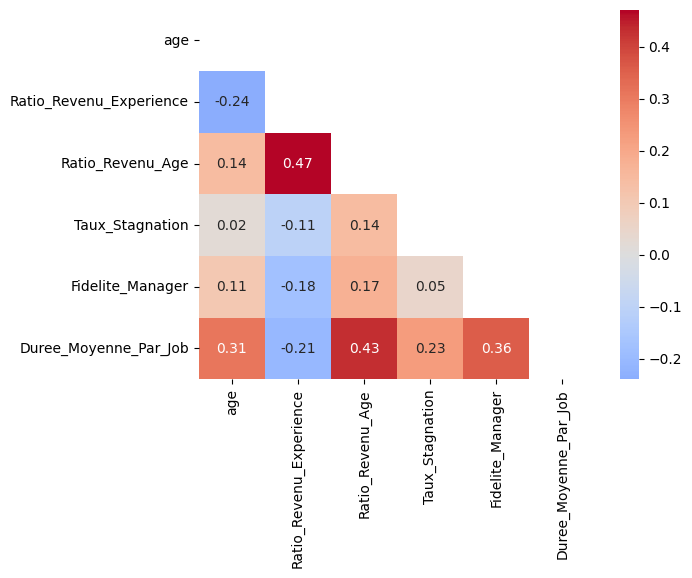

In [77]:
X_continue = X[[c for c in X if X[c].nunique() > 20]];
spearman = X_continue.corr('spearman', numeric_only=True)
figure = plt.plot(12,8)
mask = np.triu(np.ones_like(spearman, dtype=bool))
sns.heatmap(
    spearman,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    mask=mask
)

In [78]:
X.describe()

age        genre  nombre_experiences_precedentes  \
count  1470.000000  1470.000000                     1470.000000   
mean     36.923810     0.600000                        2.693197   
std       9.135373     0.490065                        2.498009   
min      18.000000     0.000000                        0.000000   
25%      30.000000     0.000000                        1.000000   
50%      36.000000     1.000000                        2.000000   
75%      43.000000     1.000000                        4.000000   
max      60.000000     1.000000                        9.000000   

       annees_dans_le_poste_actuel  satisfaction_employee_environnement  \
count                  1470.000000                          1470.000000   
mean                      4.229252                             2.721769   
std                       3.623137                             1.093082   
min                       0.000000                             1.000000   
25%                       2.000000                             2.000000   
50%                       3.000000                             3.000000   
75%                       7.000000                             4.000000   
max                      18.000000                             4.000000   

       note_evaluation_precedente  satisfaction_employee_nature_travail  \
count                 1470.000000                           1470.000000   
mean                     2.729932                              2.728571   
std                      0.711561                              1.102846   
min                      1.000000                              1.000000   
25%                      2.000000                              2.000000   
50%                      3.000000                              3.000000   
75%                      3.000000                              4.000000   
max                      4.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso  note_evaluation_actuelle  \
count                                1470.000000               1470.000000   
mean                                    2.761224                  3.153741   
std                                     0.706476                  0.360824   
min                                     1.000000                  3.000000   
25%                                     2.000000                  3.000000   
50%                                     3.000000                  3.000000   
75%                                     3.000000                  3.000000   
max                                     4.000000                  4.000000   

       ...  poste_Ressources Humaines  poste_Senior Manager  poste_Tech Lead  \
count  ...                1470.000000           1470.000000      1470.000000   
mean   ...                   0.035374              0.069388         0.098639   
std    ...                   0.184786              0.254199         0.298279   
min    ...                   0.000000              0.000000         0.000000   
25%    ...                   0.000000              0.000000         0.000000   
50%    ...                   0.000000              0.000000         0.000000   
75%    ...                   0.000000              0.000000         0.000000   
max    ...                   1.000000              1.000000         1.000000   

       domaine_etude_Entrepreunariat  domaine_etude_Infra & Cloud  \
count                    1470.000000                  1470.000000   
mean                        0.089796                     0.412245   
std                         0.285986                     0.492406   
min    

# Étape 3 - Réalisation d’un premier modèle de classification

## Séparation Train / Test Simple

In [79]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Split d'abord
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_basic, y_basic, test_size=0.25, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scaler ensuite (fit sur train seulement)
scaler = StandardScaler()
cols_to_scale = [c for c in X_train.columns if X_train[c].nunique() > 2]

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

train_y_sum_pos = y_train.loc[lambda x: x==1].value_counts().values
train_y_sum_neg = y_train.loc[lambda x: x==0].value_counts().values
ratio_depart_train = train_y_sum_pos/train_y_sum_neg
print(f"y train dataset number of left = {train_y_sum_pos}")
print(f"y train dataset number of stayed = {train_y_sum_neg}")
print(f"Train Ration Depart Oui/Non = {ratio_depart_train}")
print('='*50)

test_y_sum_pos = y_test.loc[lambda x: x==1].value_counts().values
test_y_sum_neg = y_test.loc[lambda x: x==0].value_counts().values
ratio_depart_test = test_y_sum_pos/test_y_sum_neg
print(f"y test dataset number of left = {test_y_sum_pos}")
print(f"y test dataset number of stayed = {test_y_sum_neg}")
print(f"Test Ration Depart Oui/Non = {ratio_depart_test}")



y train dataset number of left = [178]
y train dataset number of stayed = [924]
Train Ration Depart Oui/Non = [0.19264069]
y test dataset number of left = [59]
y test dataset number of stayed = [309]
Test Ration Depart Oui/Non = [0.19093851]


In [80]:
X_train.head(5)

age  genre  nombre_experiences_precedentes  \
22   -0.319271      0                       -1.080154   
74   -0.101078      0                        0.122604   
1339 -1.628429      1                       -0.679235   
251   0.226212      0                       -1.080154   
1182 -0.101078      0                       -1.080154   

      annees_dans_le_poste_actuel  satisfaction_employee_environnement  \
22                       0.504116                            -1.577764   
74                      -1.170867                            -0.656844   
1339                    -1.170867                             1.184994   
251                      0.504116                             0.264075   
1182                    -0.612539                             1.184994   

      note_evaluation_precedente  satisfaction_employee_nature_travail  \
22                      0.370808                             -0.641268   
74                      1.784752                              1.159183   
1339                    0.370808                             -0.641268   
251                     0.370808                              0.258958   
1182                   -1.043137                              0.258958   

      satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
22                        0.227526                                   0.331829   
74                       -0.694289                                   0.331829   
1339                     -1.616103                                   0.331829   
251                       1.149341                                   0.331829   
1182                      0.227526                                   0.331829   

      note_evaluation_actuelle  ...  poste_Ressources Humaines  \
22                           3  ...                          0   
74                           3  ...                          0   
1339                         4  ...                          0   
251                          4  ...                          0   
1182                         3  ...                          0   

      poste_Senior Manager  poste_Tech Lead  domaine_etude_Entrepreunariat  \
22                       0                0                              0   
74                       0                0                              0   
1339                     0                0                              0   
251                      0                0                              1   
1182                     0                1                              0   

      domaine_etude_Infra & Cloud  domaine_etude_Marketing  \
22                              1                        0   
74                              1                        0   
1339                            1                        0   
251                             0                        0   
1182                            0                        0   

      domaine_etude_Ressources Humaines  \
22                                    0   
74                                    0   
1339                                  0   
251                                   0   
1182                                  0   

      domaine_etude_Transformation Digitale  frequence_deplacement_Frequent  \
22                                        0                               0   
74                                        0                               0   
1339                                      0                               0   
251                                       0                               1   
1182                                      1                               0   

      frequence_deplacement_Occasionnel  
22                                    1  
74                                    1  
1339                                  1  
251                                   0  
1182                                  0  

[5 rows x 41 columns]

## Report init and helper function

In [81]:
models_data = []

def create_model_entry(model_name, model):
    return {
        'model_name': model_name,
        'model': model,
        'metrics': {
            'top_features': [], # Liste si tu fais plusieurs itérations
            'confusion_matrix': [],
            'detailed_report': []
        }
    }

### Best features

In [82]:
# Get indices of top 5 features by importance
def get_top_features(model, k=20):
    try:
        indices = np.argsort(model.feature_importances_)[::-1]
        top_indices = indices[:k]
        top_features = X.columns[top_indices]
        top_importances = model.feature_importances_[top_indices]
        return top_features, top_importances
    except:
        return [''], ['']

def plot_top_features(model_name, top_features, top_importances, k=20):
    # Plot bar chart
    plt.figure(figsize=(14, 6))
    plt.barh(top_features, top_importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title(f"{model_name} Top {k} Feature Importances")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.tight_layout()
    plt.show()

### Confusion Matrix

In [83]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
def get_structured_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        "matrix_raw": cm.tolist(), # Pour archivage
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    }

def get_structured_report(y_test, y_pred):
    # L'argument output_dict=True est la clé ici
    return classification_report(y_test, y_pred, output_dict=True)
def print_confusion_matrix (X_test, y_test, model, model_name):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Matrice de confusion - {model_name}')
    plt.show()

In [84]:
# 3. Fonction de stockage principale

def store_model_metrics(model_entry):
    # Prédiction
    model = model_entry['model']
    y_pred = model.predict(X_test)

    # Récupération des métriques structurées
    # Assure-toi que get_top_features est défini ailleurs
    # top_features, _ = get_top_features(model, k=5)

    cm_data = get_structured_confusion_matrix(y_test, y_pred)
    report_data = get_structured_report(y_test, y_pred)

    # Stockage
    # Note: J'utilise .append() car ta structure utilise des listes (utile pour la validation croisée)
    # model_entry['metrics']['top_features'].append(top_features)
    model_entry['metrics']['confusion_matrix'].append(cm_data)
    model_entry['metrics']['detailed_report'].append(report_data)

    models_data.append(model_entry)

## Dummy Baseline

In [85]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

model_entry = create_model_entry("DummyClassifier", dummy_clf)
store_model_metrics(model_entry)



/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

## LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
model_entry = create_model_entry("log_reg", log_reg)
store_model_metrics(model_entry)

## RandomForest 

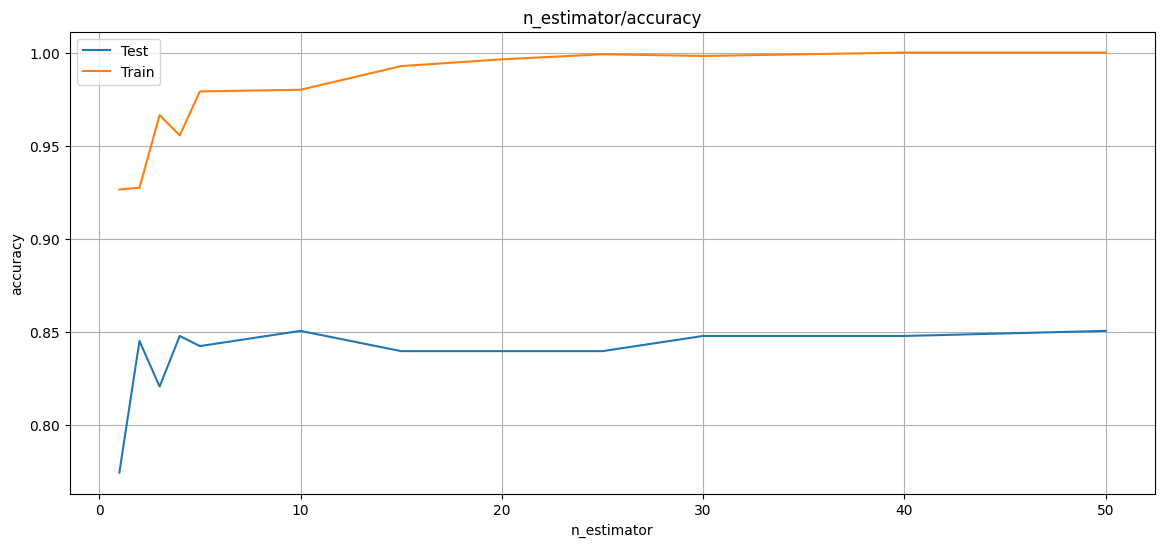

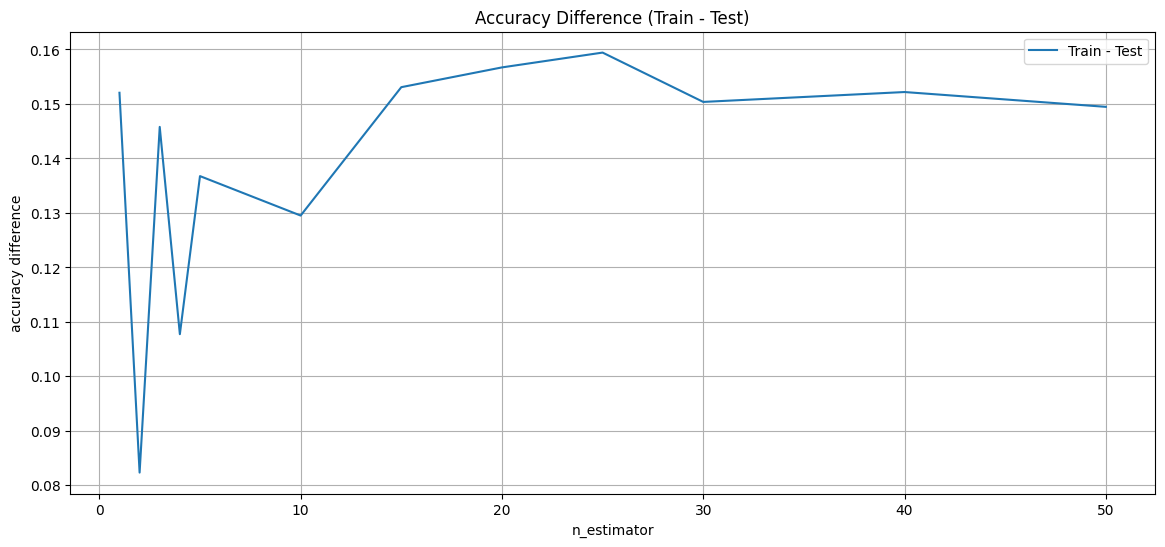

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
tree_counts = [1,2,3,4,5,10,15,20,25,30,40,50]
accuracy_test  = []
accuracy_train  = []
for n_estimator in tree_counts:
    rf_clf = RandomForestClassifier(
        n_estimators = n_estimator,
        max_depth = None,
        max_features=None,
        random_state = 42
        )

    rf_clf.fit(X_train, y_train)
    accuracy_test.append(rf_clf.score(X_test, y_test))
    accuracy_train.append(rf_clf.score(X_train, y_train))

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(tree_counts, accuracy_test, label='Test')
ax.plot(tree_counts, accuracy_train, label='Train')
ax.set(xlabel='n_estimator', ylabel='accuracy',
       title='n_estimator/accuracy')
ax.legend()
ax.grid()
plt.show()
plt.close()

diff_test_train = np.array(accuracy_train) - np.array(accuracy_test)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(tree_counts, diff_test_train, label='Train - Test')
ax.set(xlabel='n_estimator', ylabel='accuracy difference',
       title='Accuracy Difference (Train - Test)')
ax.legend()
ax.grid()
plt.show()


**Première courbe : Accuracy vs n_estimators**

Cette courbe compare l'accuracy (taux de bonnes prédictions) sur le jeu de train et de test en fonction du nombre d'arbres.
à observer :

- La courbe Train est probablement très haute (proche de 100%), car avec max_depth=None, chaque arbre peut parfaitement mémoriser les données d'entraînement.
- La courbe Test est plus basse et se stabilise après un certain nombre d'arbres (généralement autour de 10-50 arbres suffisent).

L'écart entre les deux courbes = l'overfitting. Si la courbe Train est à 99% et la courbe Test à 85%, le modèle "sur-apprend" les données d'entraînement sans bien généraliser.

**Deuxième courbe : Différence Train - Test**

Cette courbe montre directement la magnitude de l'overfitting. Plus la valeur est élevée, plus le modèle mémorise au lieu d'apprendre des patterns généralisables.
Interprétation :

- Différence proche de 0 → Bon équilibre, pas d'overfitting majeur
- Différence > 0.10 (10%) → Overfitting préoccupant
- Différence > 0.15 (15%) → Overfitting sévère, le modèle ne généralisera pas bien

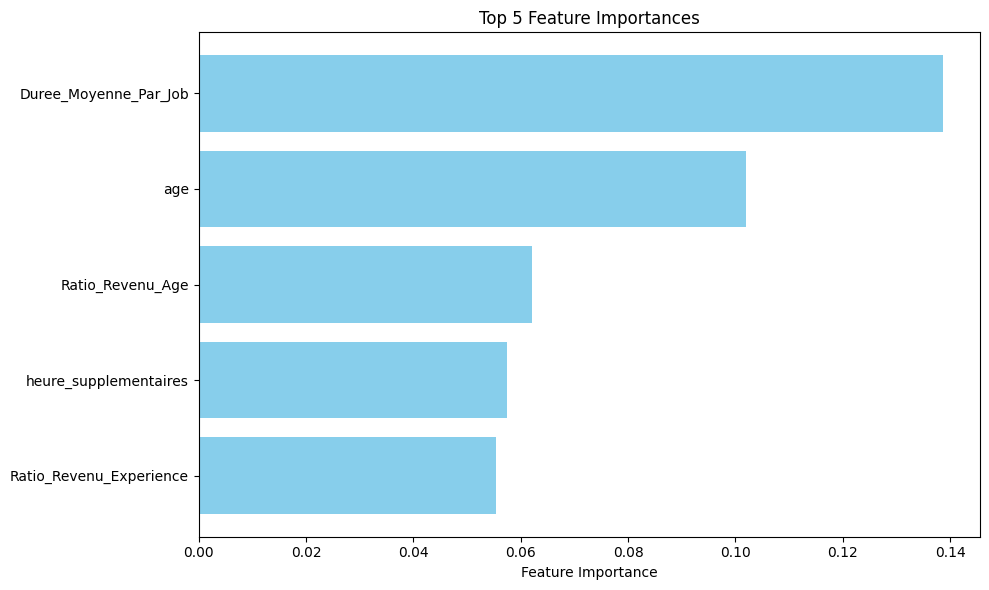

In [88]:
# Get indices of top 5 features by importance
indices = np.argsort(rf_clf.feature_importances_)[::-1]
top_5_indices = indices[:5]
top_5_features = X.columns[top_5_indices]
top_5_importances = rf_clf.feature_importances_[top_5_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_features, top_5_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

### Evaluation préliminaire


Modèle : DummyClassifier

--- Sur le jeu TRAIN ---
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       924
           1       0.00      0.00      0.00       178

    accuracy                           0.84      1102
   macro avg       0.42      0.50      0.46      1102
weighted avg       0.70      0.84      0.76      1102


--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       0.00      0.00      0.00        59

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

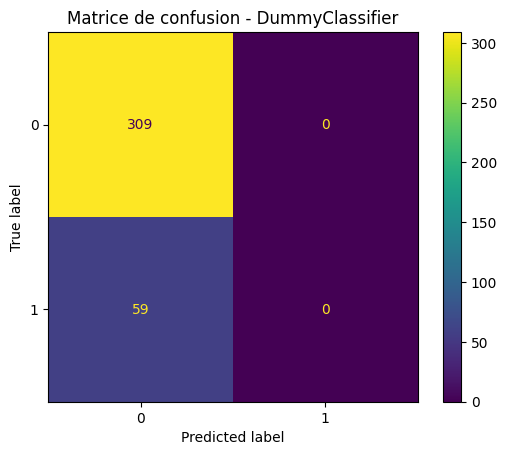


Modèle : LogisticRegression

--- Sur le jeu TRAIN ---
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       924
           1       0.43      0.82      0.57       178

    accuracy                           0.80      1102
   macro avg       0.70      0.81      0.72      1102
weighted avg       0.87      0.80      0.82      1102


--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       309
           1       0.41      0.66      0.51        59

    accuracy                           0.79       368
   macro avg       0.67      0.74      0.69       368
weighted avg       0.84      0.79      0.81       368



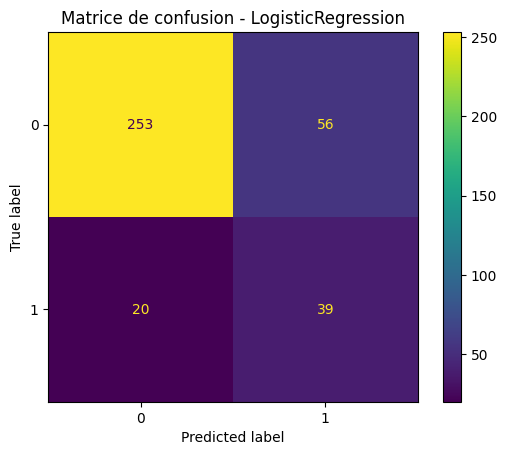


Modèle : RandomForest

--- Sur le jeu TRAIN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       309
           1       0.58      0.24      0.34        59

    accuracy                           0.85       368
   macro avg       0.73      0.60      0.63       368
weighted avg       0.82      0.85      0.82       368



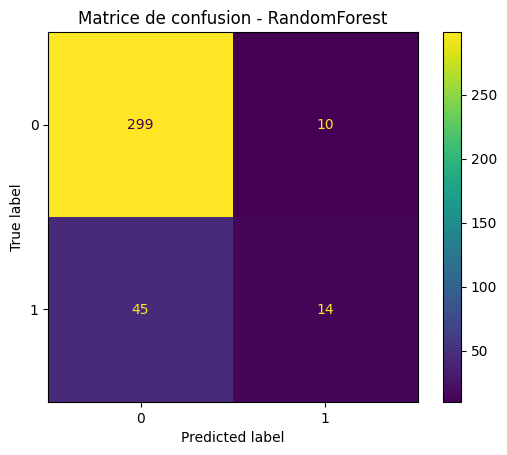

In [89]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

for name, model in [('DummyClassifier', dummy_clf), ('LogisticRegression', log_reg), ('RandomForest', rf_clf)]:
    print(f"\n{'='*50}")
    print(f"Modèle : {name}")

    # Sur le TRAIN
    y_train_pred = model.predict(X_train)
    print("\n--- Sur le jeu TRAIN ---")
    print(classification_report(y_train, y_train_pred))

    # Sur le TEST
    y_test_pred = model.predict(X_test)
    print("\n--- Sur le jeu TEST ---")
    print(classification_report(y_test, y_test_pred))

    # Matrice de confusion (sur test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Matrice de confusion - {name}')
    plt.show()

### Conclusion préliminaire


Composition du dataset de test : 309 employés qui restent (classe 0) contre seulement 59 qui démissionnent (classe 1). Cela représente environ 81% de "reste" et 19% de "démission".

---

##### Analyse modèle par modèle

###### Le DummyClassifier : ta référence zéro

Matrice de confusion : il prédit **toujours** la classe 0. Les 309 employés qui restent sont correctement classés (coin supérieur gauche), mais les 59 démissionnaires sont tous ratés (coin inférieur gauche montre 59 erreurs).

Son accuracy de 80% semble impressionnante, mais c'est une illusion. Il ne fait que parier systématiquement sur la majorité. C'est exactement pourquoi l'accuracy seule est trompeuse sur un dataset déséquilibré. Le recall de 0% pour la classe 1 révèle la vérité : ce modèle est incapable de détecter une seule démission.

**Conclusion :** Tout modèle qui ne fait pas mieux que 80% d'accuracy ou qui a un recall proche de 0% pour les démissions n'apporte aucune valeur.

---

###### La Régression Logistique : un modèle qui apprend vraiment

Comparons avec le Dummy. L'accuracy passe de 79%, ce qui semble marginal. Mais dans la matrice de confusion : le modèle détecte maintenant 39 démissions sur 59 (coin inférieur droit). C'est un recall de 66% pour la classe 1, contre 0% pour le Dummy.

Le modèle fait aussi 56 fausses alertes (coin supérieur droit) : des employés qu'il pensait voir partir mais qui sont restés. Et il rate encore 20 démissions (coin inférieur gauche).

**Ce que ça signifie en termes RH :** Sur 59 employés qui vont démissionner, le modèle linéaire en identifie 39 à l'avance. Ce n'est pas parfait, mais c'est déjà une information exploitable pour les ressources humaines.

---

###### Le Random Forest : Arbre de décision


**Sur le jeu TEST :** l'accuracy passe à 85%. Le recall pour la classe 1 tombe à 25%. Le modèle ne détecte que 15 démissions sur 59.

Le modèle fait aussi 10 fausses alertes (coin supérieur droit) : des employés qu'il pensait voir partir mais qui sont restés. Et il rate encore 44 démissions (coin inférieur gauche).

**Ce que ça signifie en termes RH :** Sur 59 employés qui vont démissionner, le modèle d'assemblage par arbre de décision en identifie 15 à l'avance. On observe qu'il gagné légerement en accuracy en optimisant le groupe qui reste qui a le plus souvent raison cependant le taux de recall chute significativement par rapport au modele de Regression Logistic et donc le score F1 sur la classe 1 passe respectivement de 51% à 36%. Le modèle RandomForest sous-performe par rapport au modele de RégressionLogistic.

---

##### Enseignement de cette expérience

**Premier enseignement :** L'accuracy est une métrique trompeuse sur un dataset déséquilibré. Le Dummy fait 87%, le Random Forest fait 87% aussi. Sans regarder le recall et la matrice de confusion, tu pourrais croire qu'ils sont équivalents alors que l'un détecte des démissions et l'autre non.

**Deuxième enseignement :** Un modèle plus complexe n'est pas automatiquement meilleur. Le Random Forest sans contraintes a sur-appris les données. La régression logistique, plus simple, généralise mieux.


### Amélioration

--- Sur le jeu TRAIN ---
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       924
           1       0.53      0.69      0.60       178

    accuracy                           0.85      1102
   macro avg       0.74      0.79      0.76      1102
weighted avg       0.87      0.85      0.86      1102


--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       309
           1       0.40      0.54      0.46        59

    accuracy                           0.80       368
   macro avg       0.65      0.69      0.67       368
weighted avg       0.83      0.80      0.81       368



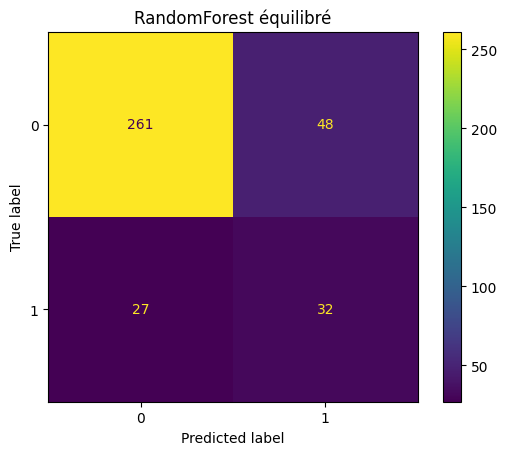

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# RandomForest avec équilibrage des classes
rf_balanced = RandomForestClassifier(
    n_estimators=10,
    max_depth=4,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(X_train, y_train)

# Évaluation
print("--- Sur le jeu TRAIN ---")
print(classification_report(y_train, rf_balanced.predict(X_train)))

print("\n--- Sur le jeu TEST ---")
print(classification_report(y_test, rf_balanced.predict(X_test)))

# Matrice de confusion
ConfusionMatrixDisplay.from_estimator(rf_balanced, X_test, y_test)
plt.title('RandomForest équilibré')
plt.show()

### Cross Validation Dataset Training

In [91]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
import numpy as np

n_splits = [2,3,4,5,6,7,8,9,10]
for n_split in n_splits:
    skf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=42)

    # Stocker plusieurs métriques, pas seulement le recall
    recalls = []
    precisions = []
    f1_scores = []

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_fold = X.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_train_fold = y.iloc[train_index]
        y_test_fold = y.iloc[test_index]

        rf = RandomForestClassifier(
            n_estimators=10,
            max_depth=4,
            min_samples_leaf=4,
            class_weight='balanced',
            random_state=42
        )
        rf.fit(X_train_fold, y_train_fold)
        y_pred = rf.predict(X_test_fold)

        recalls.append(recall_score(y_test_fold, y_pred, pos_label=1))
        precisions.append(precision_score(y_test_fold, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test_fold, y_pred, pos_label=1))

        # print(f"Fold {i+1}: Recall={recalls[-1]:.2%}, Precision={precisions[-1]:.2%}, F1={f1_scores[-1]:.2%}")

    print(f"\n{'='*50}")
    print(f"Nombre de split : {n_split}")
    print(f"Recall moyen : {np.mean(recalls):.2%} (± {np.std(recalls):.2%})")
    print(f"Precision moyenne : {np.mean(precisions):.2%} (± {np.std(precisions):.2%})")
    print(f"F1-score moyen : {np.mean(f1_scores):.2%} (± {np.std(f1_scores):.2%})")


Nombre de split : 2
Recall moyen : 48.10% (± 1.48%)
Precision moyenne : 35.58% (± 1.08%)
F1-score moyen : 40.87% (± 0.18%)

Nombre de split : 3
Recall moyen : 56.96% (± 3.73%)
Precision moyenne : 39.87% (± 6.91%)
F1-score moyen : 46.75% (± 5.90%)

Nombre de split : 4
Recall moyen : 59.51% (± 9.03%)
Precision moyenne : 37.88% (± 3.33%)
F1-score moyen : 46.09% (± 4.61%)

Nombre de split : 5
Recall moyen : 50.22% (± 5.44%)
Precision moyenne : 38.06% (± 3.91%)
F1-score moyen : 43.14% (± 3.60%)

Nombre de split : 6
Recall moyen : 52.37% (± 6.95%)
Precision moyenne : 39.16% (± 5.40%)
F1-score moyen : 44.73% (± 5.78%)

Nombre de split : 7
Recall moyen : 54.86% (± 7.07%)
Precision moyenne : 38.26% (± 6.34%)
F1-score moyen : 44.91% (± 6.31%)

Nombre de split : 8
Recall moyen : 53.59% (± 6.20%)
Precision moyenne : 38.33% (± 8.24%)
F1-score moyen : 44.20% (± 5.57%)

Nombre de split : 9
Recall moyen : 56.57% (± 8.18%)
Precision moyenne : 38.54% (± 4.79%)
F1-score moyen : 45.77% (± 5.81%)

Nombre 

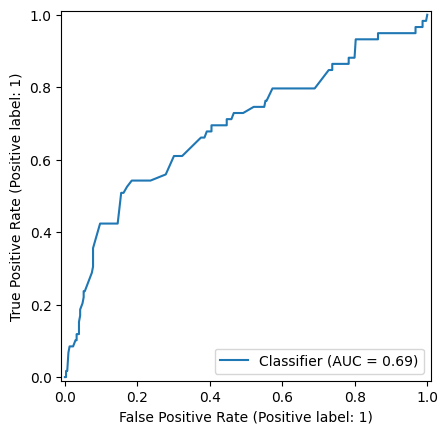

In [92]:
from sklearn.metrics import roc_curve, RocCurveDisplay
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

### Fine-tuning des hyper-paramètre

#### GridSearchCV

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits

Meilleure configuration RandomForest :
  Paramètres : {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 20}
  Best F1 score : 51.86%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       309
           1       0.41      0.49      0.45        59

    accuracy                           0.81       368
   macro avg       0.66      0.68      0.67       368
weighted avg       0.82      0.81      0.81       368



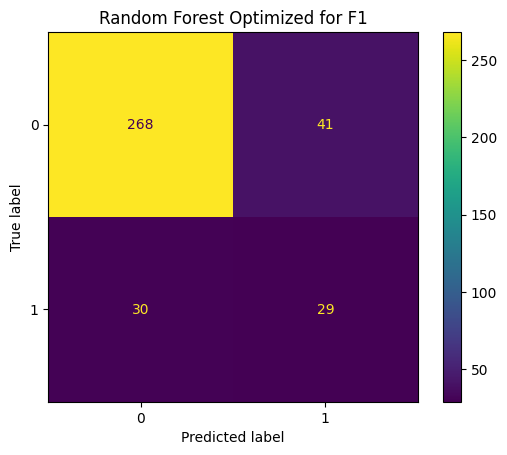

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def train_rf(rf_X_train, rf_y_train, rf_X_test, rf_y_test, log=True):
    # --- Paramètres ---
    param_grid = {
        # On force des arbres plus profonds car 'balanced' réduit le risque d'ignorer la classe minoritaire
        'n_estimators': [1, 3, 5, 7, 10, 14, 20, 40, 80],
        'max_depth': [2, 4, 6, 8, 10, None], # None = arbre complet (la régularisation se fera par min_samples)
        'min_samples_leaf': [2, 4, 6, 12],   # Pas trop gros pour garder de la précision
        'class_weight': ['balanced', 'balanced_subsample'], # Teste les deux modes d'équilibrage
        'criterion': ['gini', 'entropy', 'log_loss'],
        'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
    }

    rf_base = RandomForestClassifier(random_state=42)
    cv_rf_train = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    # --- GridSearch ---
    rf_grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid,
        scoring='f1',      # Optimisation du Rappel
        cv=cv_rf_train,
        n_jobs=-1,
        verbose=1
    )

    rf_grid_search.fit(rf_X_train, rf_y_train)

    # --- Résultats ---
    print(f"\nMeilleure configuration RandomForest :")
    print(f"  Paramètres : {rf_grid_search.best_params_}")
    print(f"  Best F1 score : {rf_grid_search.best_score_:.2%}")

    best_rf = rf_grid_search.best_estimator_

    print("\n--- Sur le jeu TEST ---")
    print(classification_report(rf_y_test, best_rf.predict(rf_X_test)))

    ConfusionMatrixDisplay.from_estimator(best_rf, rf_X_test, rf_y_test)
    plt.title('Random Forest Optimized for F1')
    plt.show()

    model_entry = create_model_entry("RandomForest", best_rf)
    if log==True: store_model_metrics(model_entry)
    return best_rf

best_rf = train_rf(X_train, y_train, X_test, y_test)

#### RandomizedSearchCV

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Meilleure configuration RandomForest :
  Paramètres : {'ccp_alpha': np.float64(0.008134878064189976), 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 9, 'n_estimators': 65}
  Best F1 score : 49.99%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       309
           1       0.41      0.49      0.45        59

    accuracy                           0.80       368
   macro avg       0.65      0.68      0.66       368
weighted avg       0.82      0.80      0.81       368



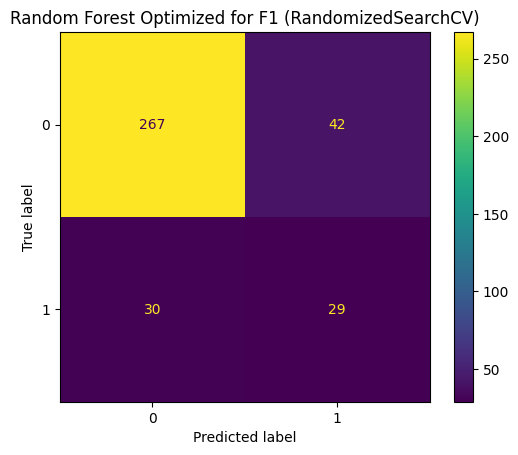

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Définition des distributions pour RandomizedSearchCV
distributions = {
    'n_estimators': randint(1, 81),  # Entiers entre 1 et 80
    'max_depth': [2, 4, 6, 8, 10, None],  # Liste discrète (on garde tel quel)
    'min_samples_leaf': randint(2, 13),  # Entiers entre 2 et 12
    'class_weight': ['balanced', 'balanced_subsample'],  # Liste discrète
    'criterion': ['gini', 'entropy', 'log_loss'],  # Liste discrète
    'ccp_alpha': uniform(0.0, 0.1)  # Distribution uniforme entre 0.0 et 0.1
}

rf_base = RandomForestClassifier(random_state=42)
cv_rf_train = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# --- RandomizedSearch ---
rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=distributions,
    n_iter=100,  # Nombre d'échantillonnages (ajuste selon ton budget temps)
    scoring='f1',
    cv=cv_rf_train,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)

# --- Résultats ---
print(f"\nMeilleure configuration RandomForest :")
print(f"  Paramètres : {rf_random_search.best_params_}")
print(f"  Best F1 score : {rf_random_search.best_score_:.2%}")

random_rf = rf_random_search.best_estimator_

print("\n--- Sur le jeu TEST ---")
print(classification_report(y_test, random_rf.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(random_rf, X_test, y_test)
plt.title('Random Forest Optimized for F1 (RandomizedSearchCV)')
plt.show()

## Gradient Boosting

Gradient Boosting Tree F1-score: 0.8559782608695652
Gradient Boosting Tree F1-score: 0.8532608695652174
Gradient Boosting Tree F1-score: 0.8532608695652174
Gradient Boosting Tree F1-score: 0.8396739130434783


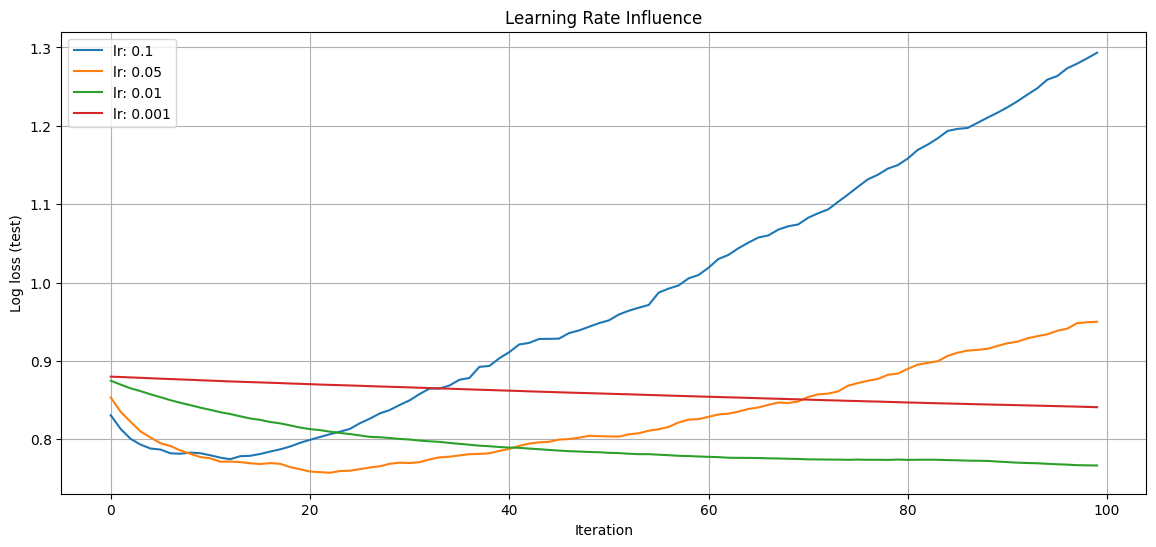

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss, f1_score

learning_rates = [0.1, 0.05, 0.01, 0.001]
fig, ax = plt.subplots(figsize=(14, 6))
for lr in learning_rates:
    clf = GradientBoostingClassifier(
        n_estimators=100,
        max_depth=8,
        random_state=42,
        learning_rate=lr
    )
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score = f1_score(y_test, y_pred, average="micro")
    print("Gradient Boosting Tree F1-score: "+str(score))
    # compute test set deviance
    test_deviance  = np.zeros((clf.n_estimators,), dtype=np.float64)
    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        test_deviance [i] = 2 * log_loss(y_test, y_proba[:, 1])

    # Plot iterations (0 to n_estimators-1) vs scores
    ax.plot(range(clf.n_estimators), test_deviance, label=f'lr: {lr}')

ax.set(xlabel='Iteration', ylabel='Log loss (test)',
       title='Learning Rate Influence')
ax.legend()
ax.grid()
plt.show()
plt.close()

**Une courbe de Log Loss idéale ressemblerait à ceci :**

```bash
Log Loss
   |
 1.0|--\
    |   \
 0.6|    \___________  ← Zone optimale (le modèle a appris, pas encore overfitté)
    |                \
 0.4|                 \____  ← Début d'overfitting léger
    |________________________
    0   100  200  300  400  500  Itérations
```

Fitting 2 folds for each of 42 candidates, totalling 84 fits

Meilleure configuration GradientBoost :
  Paramètres : {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20}
  Best F1 score : 43.44%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       309
           1       0.37      0.56      0.45        59

    accuracy                           0.78       368
   macro avg       0.64      0.69      0.65       368
weighted avg       0.82      0.78      0.79       368



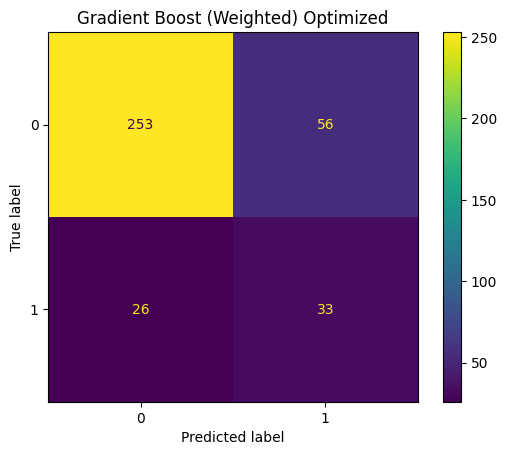

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# --- Calcul dynamique du déséquilibre ---
count_neg = y_train.value_counts()[0]
count_pos = y_train.value_counts()[1]
scale_pos_weight = count_neg / count_pos
# --- Calcul des poids pour chaque échantillon ---
# On donne un poids fort (ex: 9.0) aux lignes "Départ" et 1.0 aux "Reste"
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 1.0
sample_weights[y_train == 1] = scale_pos_weight

# --- Paramètres ---
param_grid = {
    'n_estimators': [20],
    'max_depth': [1,2,3,4,5,6,8],
    'learning_rate': [0.05],
    'min_samples_leaf': [1, 5, 10], # Important pour éviter l'overfitting sur les poids forts
    'min_weight_fraction_leaf': [0.0, 0.5]
}

gbc_base = GradientBoostingClassifier(random_state=42)
cv_gbc_train = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# --- GridSearch ---
gbc_grid_search = GridSearchCV(
    estimator=gbc_base,
    param_grid=param_grid,
    scoring='f1',      # Optimisation du Rappel
    cv=cv_gbc_train,
    n_jobs=-1,
    verbose=1
)

# ASTUCE : On passe les sample_weight ici !
gbc_grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# --- Résultats ---
print(f"\nMeilleure configuration GradientBoost :")
print(f"  Paramètres : {gbc_grid_search.best_params_}")
print(f"  Best F1 score : {gbc_grid_search.best_score_:.2%}")

best_gbc = gbc_grid_search.best_estimator_

print("\n--- Sur le jeu TEST ---")
print(classification_report(y_test, best_gbc.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(best_gbc, X_test, y_test)
plt.title('Gradient Boost (Weighted) Optimized')
plt.show()

model_entry = create_model_entry("GradientBoost", best_gbc)
store_model_metrics(model_entry)

## XG Boost

X test dataset = (1102, 41)
Ratio de déséquilibre (scale_pos_weight) : 5.19
Fitting 2 folds for each of 144 candidates, totalling 288 fits

Meilleure configuration XGBoost :
  Paramètres : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
  Best F1 score (CV) : 54.24%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       309
           1       0.49      0.58      0.53        59

    accuracy                           0.84       368
   macro avg       0.70      0.73      0.72       368
weighted avg       0.85      0.84      0.84       368



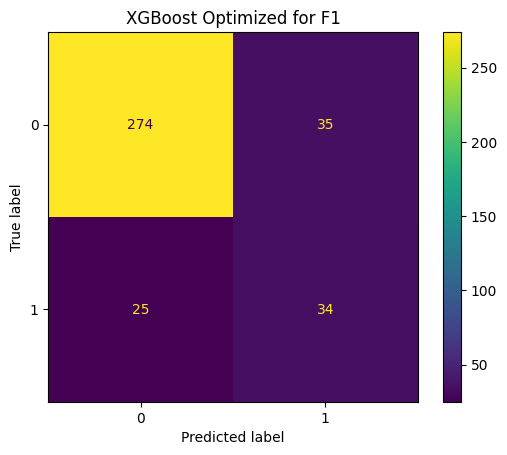

In [97]:
import xgboost as xgb

def train_xgb(xgb_X_train, xgb_y_train, xgb_X_test, xgb_y_test, log=True):
    # --- Calcul dynamique du déséquilibre ---
    count_neg = xgb_y_train.value_counts()[0]
    count_pos = xgb_y_train.value_counts()[1]
    scale_pos_weight = count_neg / count_pos

    print(f"X test dataset = {xgb_X_train.shape}")
    print(f"Ratio de déséquilibre (scale_pos_weight) : {scale_pos_weight:.2f}")

    # --- Paramètres ---
    # On étend un peu la profondeur car avec scale_pos_weight, on peut se permettre plus de complexité
    # sans ignorer la classe minoritaire.
    param_grid = {
        'n_estimators': [100, 200, 300],      # Assez d'arbres pour stabiliser
        'max_depth': [3, 5, 7, 10],           # Profondeur variée (10 pour capturer les motifs complexes)
        'learning_rate': [0.01, 0.05, 0.1],   # Learning rate plus doux pour la convergence
        'subsample': [0.8, 1.0],              # Pour éviter l'overfitting
        'colsample_bytree': [0.8, 1.0]        # Idem
    }

    # --- Modèle ---
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss'
    )
    cv_xgb_train = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

    # --- GridSearch ---
    xgb_grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='f1',
        cv=cv_xgb_train,
        n_jobs=-1,
        verbose=1
    )

    xgb_grid_search.fit(xgb_X_train, xgb_y_train)

    # --- Résultats ---
    print(f"\nMeilleure configuration XGBoost :")
    print(f"  Paramètres : {xgb_grid_search.best_params_}")
    print(f"  Best F1 score (CV) : {xgb_grid_search.best_score_:.2%}")

    best_xgb = xgb_grid_search.best_estimator_

    print("\n--- Sur le jeu TEST ---")
    print(classification_report(xgb_y_test, best_xgb.predict(xgb_X_test)))

    # Matrice de confusion
    ConfusionMatrixDisplay.from_estimator(best_xgb, xgb_X_test, xgb_y_test)
    plt.title('XGBoost Optimized for F1')
    plt.show()

    # Stockage
    model_entry = create_model_entry("XGBoost", best_xgb)
    if log==True: store_model_metrics(model_entry) # Décommentez si votre fonction est définie
    return best_xgb
best_xgb = train_xgb(X_train,y_train,X_test,y_test)

## Model Benchmark

In [98]:
models_data

[{'model_name': 'DummyClassifier',
  'model': DummyClassifier(strategy='most_frequent'),
  'metrics': {'top_features': [],
   'confusion_matrix': [{'matrix_raw': [[309, 0], [59, 0]],
     'TN': 309,
     'FP': 0,
     'FN': 59,
     'TP': 0}],
   'detailed_report': [{'0': {'precision': 0.8396739130434783,
      'recall': 1.0,
      'f1-score': 0.912850812407681,
      'support': 309.0},
     '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 59.0},
     'accuracy': 0.8396739130434783,
     'macro avg': {'precision': 0.41983695652173914,
      'recall': 0.5,
      'f1-score': 0.4564254062038405,
      'support': 368.0},
     'weighted avg': {'precision': 0.7050522802457467,
      'recall': 0.8396739130434783,
      'f1-score': 0.7664970136792756,
      'support': 368.0}}]}},
 {'model_name': 'log_reg',
  'model': LogisticRegression(class_weight='balanced', max_iter=1000),
  'metrics': {'top_features': [],
   'confusion_matrix': [{'matrix_raw': [[253, 56], [20, 39]],
     

In [99]:
def create_comparison_table(models_data, target_class='1'):
    rows = []

    for entry in models_data:
        metrics = entry['metrics']

        # Sécurité : on vérifie que les données existent
        if not metrics['confusion_matrix'] or not metrics['detailed_report']:
            continue

        cm_data = metrics['confusion_matrix'][0]
        report_data = metrics['detailed_report'][0]

        # Sécurité : Si la classe cible n'est pas dans le rapport (ex: pas de prédictions pour cette classe)
        if target_class not in report_data:
            print(f"Attention: Classe '{target_class}' non trouvée pour {entry['model_name']}")
            continue

        row = {
            'Model': entry['model_name'],

            # Scores Globaux
            'Accuracy': report_data.get('accuracy', 0),
            'Macro F1': report_data.get('macro avg', {}).get('f1-score', 0),

            # Focus sur la Classe Cible (Dynamique)
            f'Class {target_class} Precision': report_data[target_class]['precision'],
            f'Class {target_class} Recall': report_data[target_class]['recall'],
            f'Class {target_class} F1': report_data[target_class]['f1-score'],

            # Matrice de Confusion
            'TP': cm_data.get('TP', 0),
            'FP': cm_data.get('FP', 0),
            'TN': cm_data.get('TN', 0),
            'FN': cm_data.get('FN', 0)
        }
        rows.append(row)

    df = pd.DataFrame(rows)
    return df.sort_values(by='Macro F1', ascending=False)

# --- UTILISATION ---

# On appelle la fonction (vous pouvez changer '1' par le nom de votre classe si besoin)
df_comparatif = create_comparison_table(models_data, target_class='1')

# Affichage avec Style
styled_table = (df_comparatif.style
    .background_gradient(cmap='Greens', subset=['Accuracy', 'Macro F1', 'Class 1 F1'])
    # On met en évidence les Vrais Positifs (TP) en vert foncé
    .highlight_max(subset=['TP'], color='#d1e7dd')
    # On met en évidence les erreurs (FP, FN) en rouge pâle si elles sont élevées, ou vert si basses
    # Note: highlight_min est bien pour montrer le meilleur, mais background_gradient est souvent plus clair pour les erreurs
    .background_gradient(cmap='Reds', subset=['FP', 'FN'])
    .format("{:.3f}", subset=['Accuracy', 'Macro F1', 'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1'])
    .set_caption("Comparaison des performances des modèles (Trié par Macro F1)")
)

# Dans Jupyter, la dernière ligne doit être l'objet stylé pour qu'il s'affiche
styled_table

### Best features

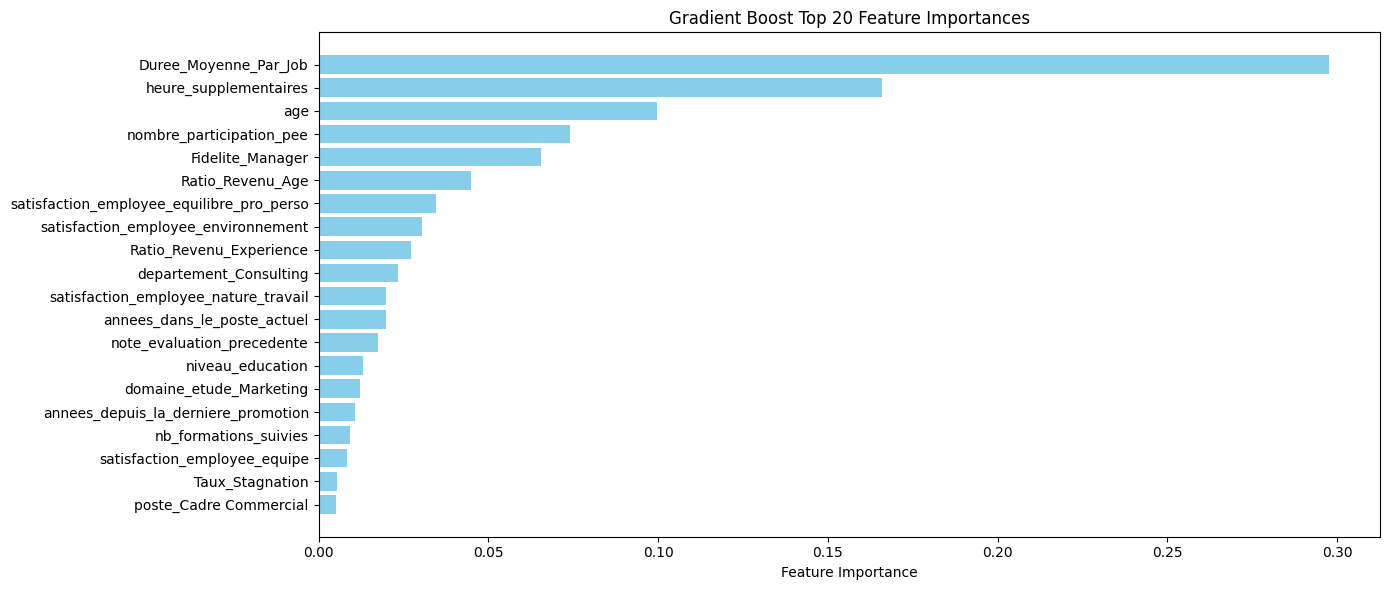

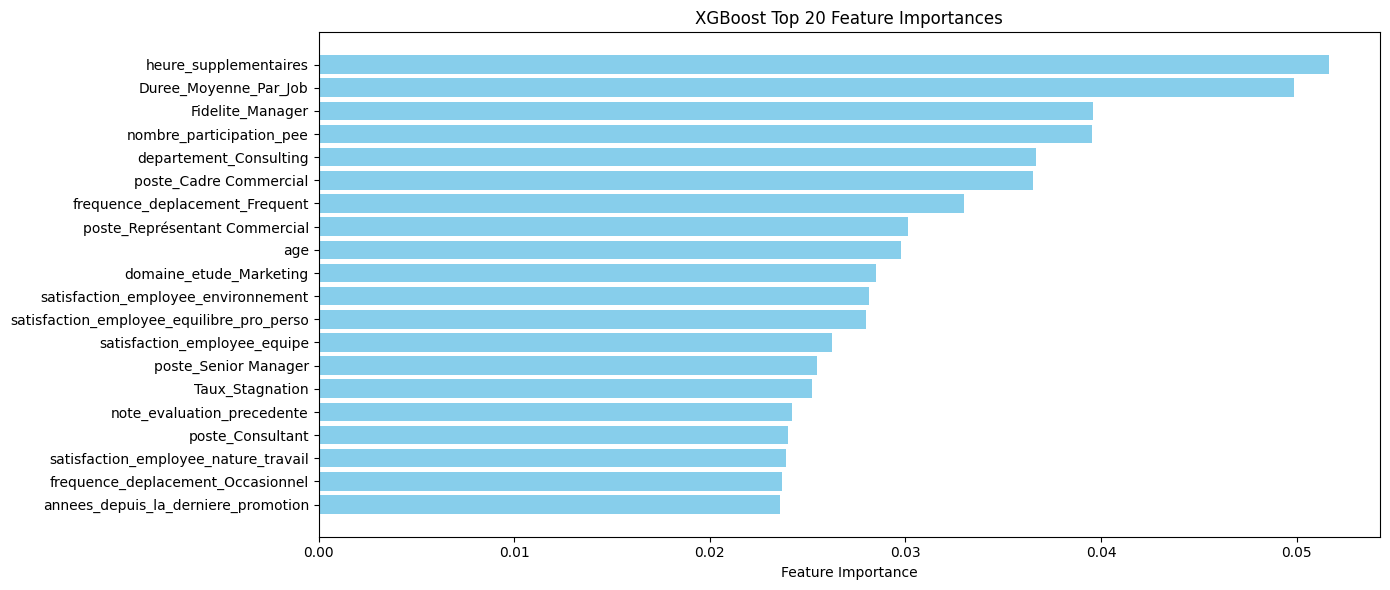

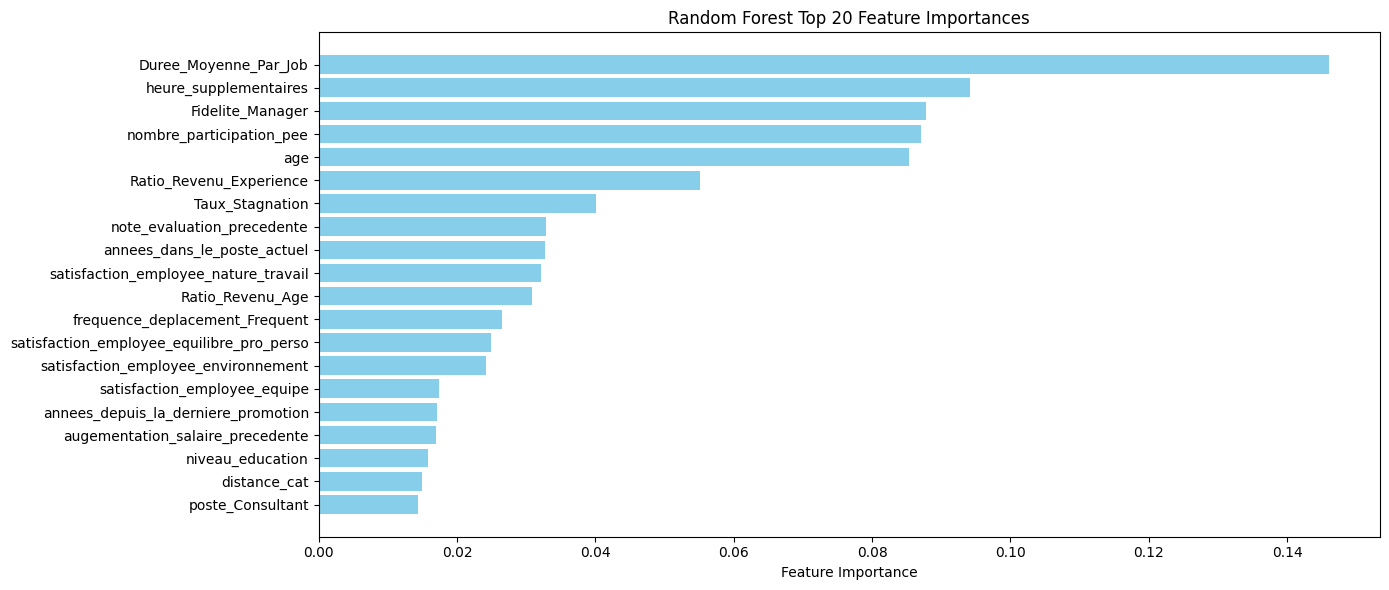

In [100]:
models_list = [
    ("Gradient Boost", best_gbc),
    ("XGBoost", best_xgb),
    ("Random Forest", best_rf)
]

for name, model in models_list:
    try:
        top_features, top_importances = get_top_features(model)
        plot_top_features(name, top_features, top_importances)
    except Exception as e:
        print(f"Erreur sur {name} : {e}")

## SHAP Préliminaire

/home/will/Work/formation-OC/P10/OC-P10-TechNova/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Calcul des SHAP values pour : Régression Logistique


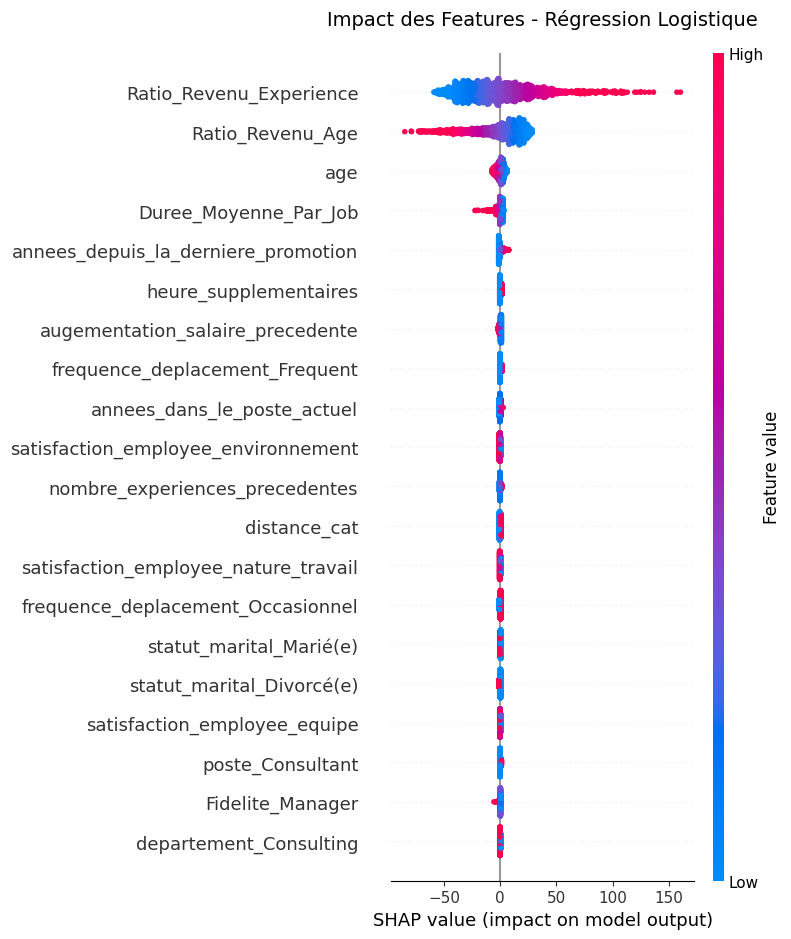

Calcul des SHAP values pour : Gradient Boost


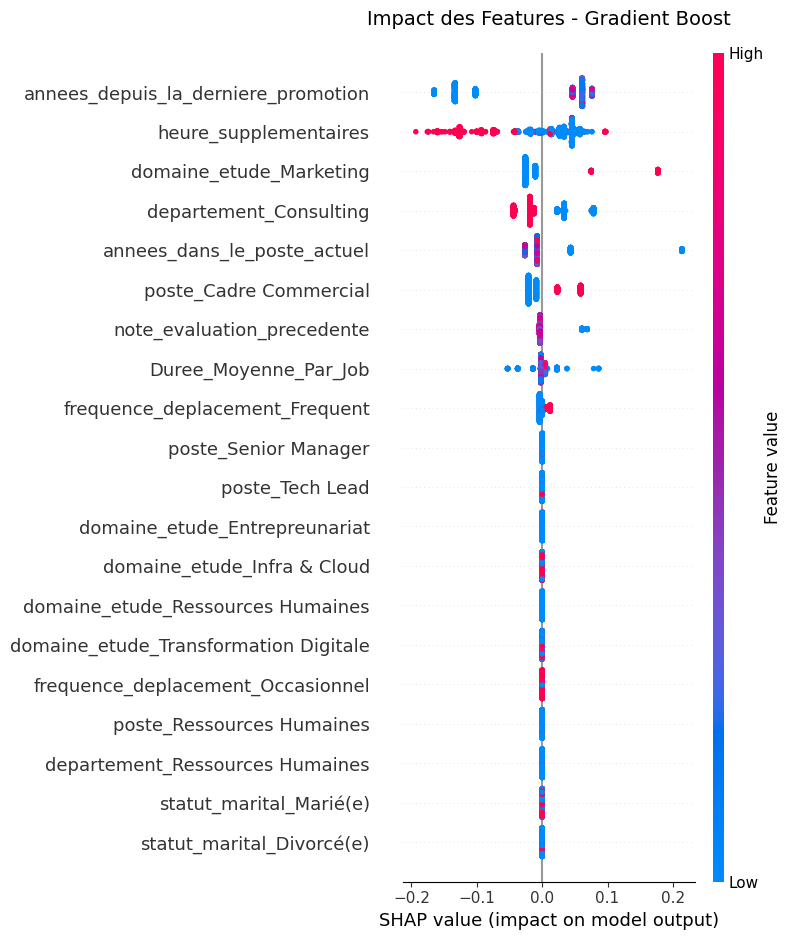

Calcul des SHAP values pour : XGBoost


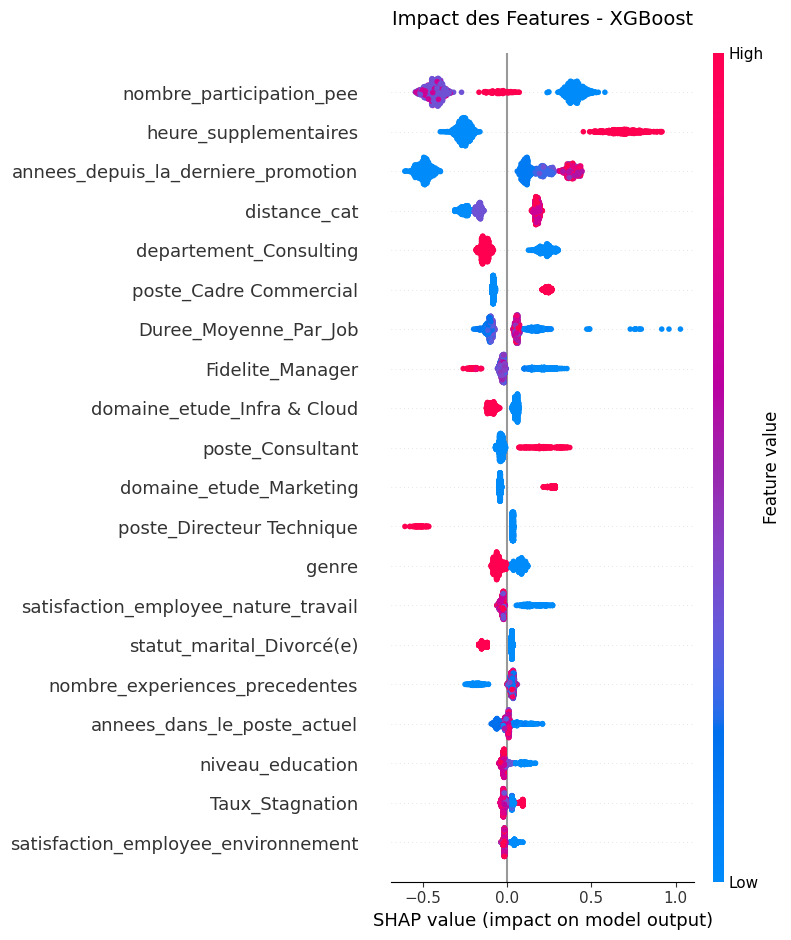

Calcul des SHAP values pour : Random Forest
-> Détection format multiclasse (1470, 41, 2). Sélection de la classe 1 (Départ).


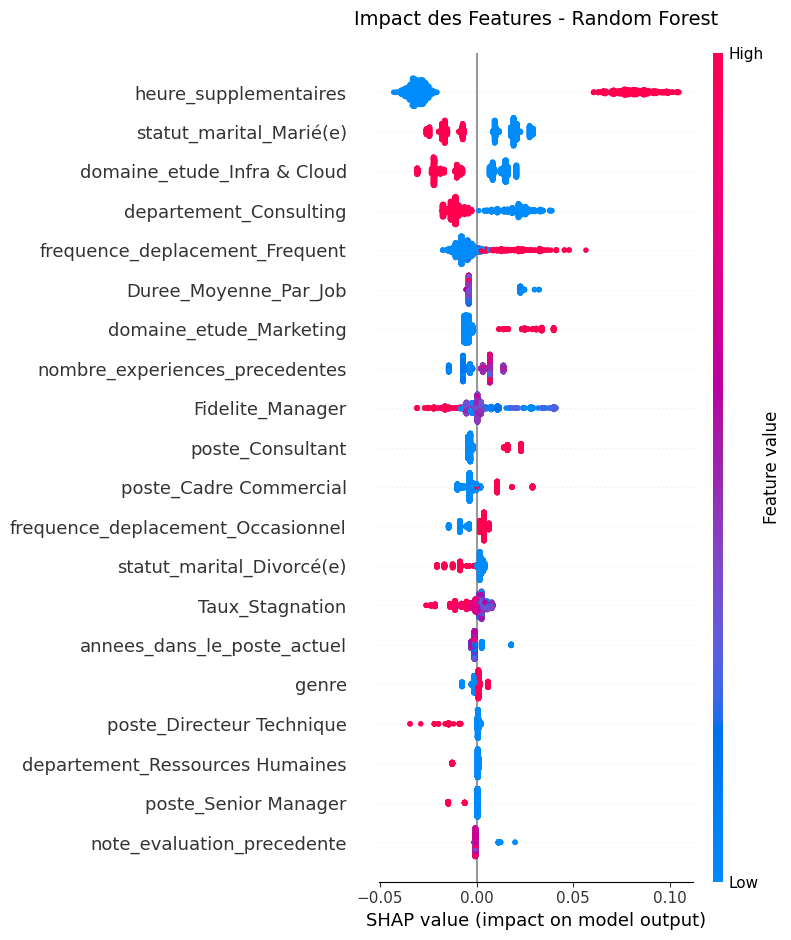

In [101]:
import shap


def plot_shap_analysis(model, model_name, X_data):
    print("="*60)
    print(f"Calcul des SHAP values pour : {model_name}")

    # 1. Création de l'explainer
    # Pour les modèles linéaires (LogReg), on passe souvent X_data comme masker
    # Pour les arbres, shap détecte automatiquement TreeExplainer
    try:
        explainer = shap.Explainer(model, X_data)
    except Exception:
        # Fallback pour certains modèles complexes ou versions anciennes
        explainer = shap.Explainer(model)

    # 2. Calcul des valeurs (avec gestion d'erreur XGBoost)
    try:
        shap_values = explainer(X_data)
    except Exception as e:
        if "Additivity check failed" in str(e):
            print("-> Mode tolérant activé (check_additivity=False)")
            shap_values = explainer(X_data, check_additivity=False)
        else:
            raise e

    # 3. Gestion intelligente des dimensions (Binaire vs Multiclasse)
    # L'objet 'shap_values' moderne contient .values
    # Si la forme est (Lignes, Colonnes, 2), c'est qu'il y a 2 classes (0 et 1).
    # On veut la classe 1 (Départ).
    if len(shap_values.shape) == 3:
        print(f"-> Détection format multiclasse {shap_values.shape}. Sélection de la classe 1 (Départ).")
        shap_values_to_plot = shap_values[:, :, 1]
    else:
        # Cas XGBoost binaire ou Regression standard
        shap_values_to_plot = shap_values

    # 4. Affichage Graphique
    plt.figure(figsize=(10, 6)) # On crée une nouvelle figure propre pour chaque modèle
    plt.title(f"Impact des Features - {model_name}", fontsize=14, pad=20)

    # show=False permet de garder la figure ouverte pour ajouter le titre
    shap.summary_plot(shap_values_to_plot, X_data, show=False)

    plt.tight_layout()
    plt.show()
    plt.close()

# --- Exécution propre ---

# Liste des modèles (Nom, Objet Modèle)
models_list = [
    ("Régression Logistique", log_reg),
    ("Gradient Boost", best_gbc),
    ("XGBoost", best_xgb),
    ("Random Forest", best_rf)
]

for name, model in models_list:
    try:
        plot_shap_analysis(model, name, X)
    except Exception as e:
        print(f"Erreur sur {name} : {e}")

# Etape 4 Améliorez l'approche de classification

## Etude des Faux positif du modele RandomForest

In [102]:
# --- 1. Définition des masques et indices ---
y_pred = best_rf.predict(X_test)
# On s'assure d'avoir les indices des faux positifs
faux_positifs_mask = (y_pred == 1) & (y_test.values == 0)
indices_fp = X_test[faux_positifs_mask].index

# --- 2. Calcul SHAP ---
explainer = shap.Explainer(best_rf)
shap_values_fp = explainer.shap_values(X_test[faux_positifs_mask])
shap_values_fp = shap_values_fp[:, :, 1]

# --- 3. Création du DataFrame ---
df_shap_fp = pd.DataFrame(
    shap_values_fp, 
    columns=X_test.columns,
    index=indices_fp
)

# --- 4. Analyse (Ton code original) ---
print(f"\nDimensions du DF SHAP final : {df_shap_fp.shape}")
print("\n--- Explication de chaque Faux Positif ---")

# Petite sécurité : on ne boucle que s'il y a des faux positifs
if len(indices_fp) > 0:
    for idx in indices_fp[:5]:  
        print(f"\n=== Faux Positif (Employé ID: {idx}) ===")
        # On récupère la ligne correspondant à cet index
        row_shap = df_shap_fp.loc[idx]
        
        # Top 5 features qui ont poussé vers la classe 1 (Démission)
        top_features = row_shap.sort_values(ascending=False).head(5)
        
        print("Ce qui a trompé le modèle (a poussé vers 'Démission') :")
        for feat, val in top_features.items():
            # On récupère la valeur brute originale dans X_test
            valeur_reelle = X_test.loc[idx, feat]
            print(f"  - {feat} : SHAP = +{val:.3f} (Valeur réelle : {valeur_reelle:.2f})")
else:
    print("Aucun faux positif trouvé ! Le modèle est parfait sur ce point (ou seuil trop haut).")

    


Dimensions du DF SHAP final : (41, 41)

--- Explication de chaque Faux Positif ---

=== Faux Positif (Employé ID: 670) ===
Ce qui a trompé le modèle (a poussé vers 'Démission') :
  - Duree_Moyenne_Par_Job : SHAP = +0.130 (Valeur réelle : -0.93)
  - nombre_participation_pee : SHAP = +0.061 (Valeur réelle : -0.93)
  - age : SHAP = +0.054 (Valeur réelle : -1.08)
  - Fidelite_Manager : SHAP = +0.039 (Valeur réelle : -0.84)
  - annees_dans_le_poste_actuel : SHAP = +0.030 (Valeur réelle : -0.89)

=== Faux Positif (Employé ID: 292) ===
Ce qui a trompé le modèle (a poussé vers 'Démission') :
  - Duree_Moyenne_Par_Job : SHAP = +0.127 (Valeur réelle : -0.80)
  - frequence_deplacement_Frequent : SHAP = +0.051 (Valeur réelle : 1.00)
  - age : SHAP = +0.039 (Valeur réelle : -0.65)
  - Ratio_Revenu_Experience : SHAP = +0.022 (Valeur réelle : 1.20)
  - poste_Représentant Commercial : SHAP = +0.018 (Valeur réelle : 1.00)

=== Faux Positif (Employé ID: 3) ===
Ce qui a trompé le modèle (a poussé vers '

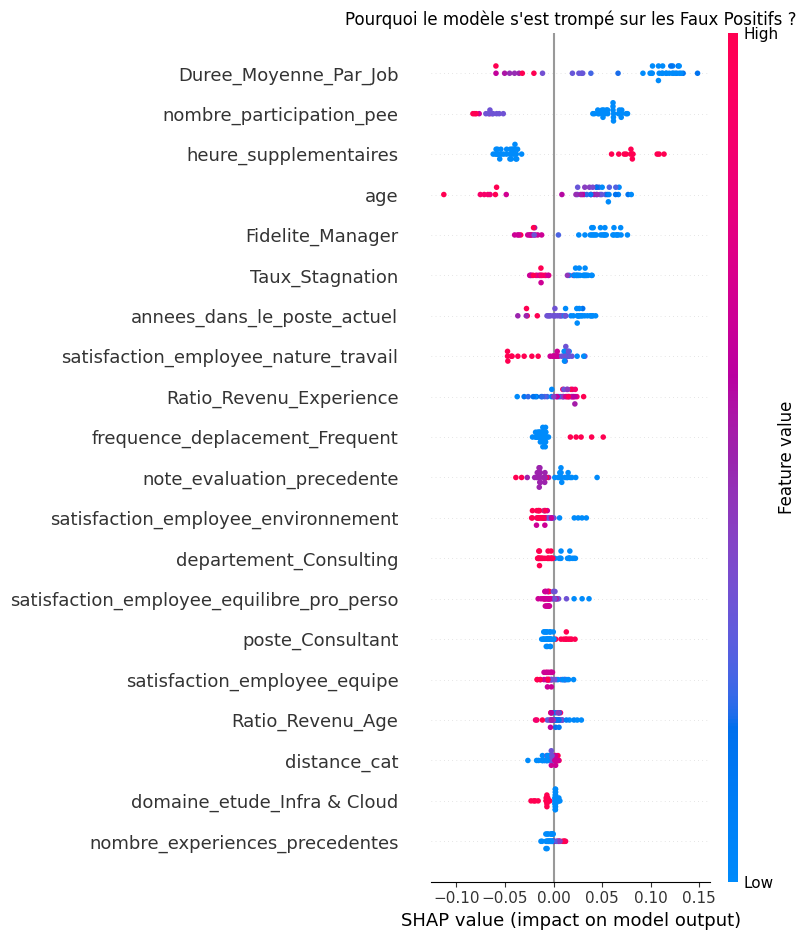

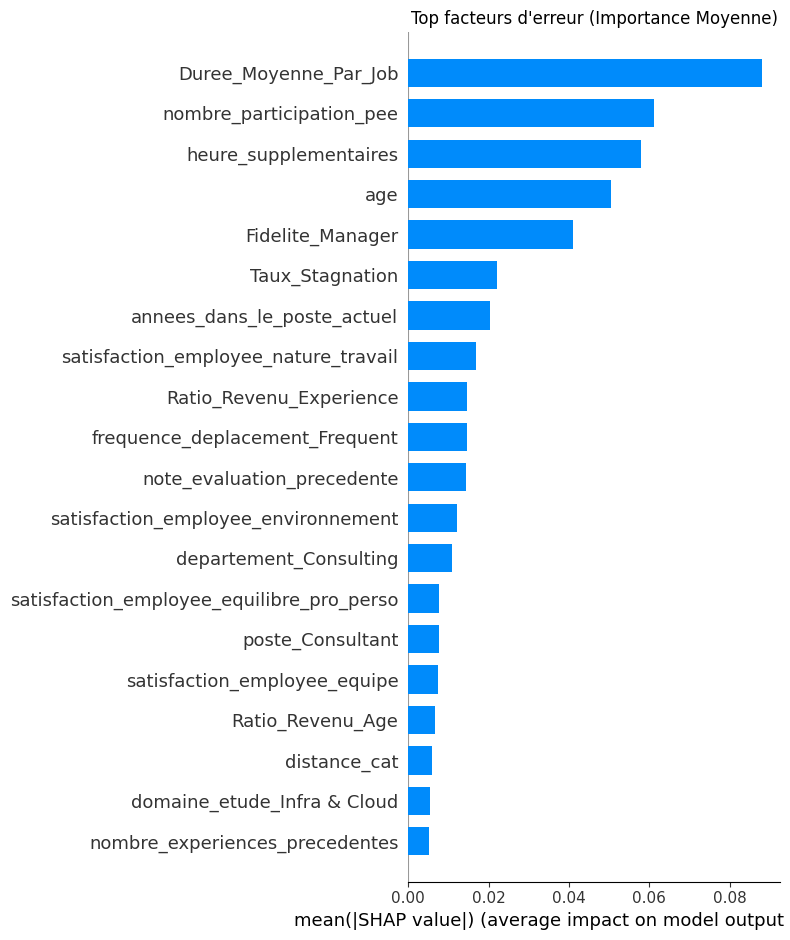

In [103]:
# 1. Le Beeswarm Plot (Le plus complet)
plt.figure(figsize=(10, 6))
plt.title("Pourquoi le modèle s'est trompé sur les Faux Positifs ?")
shap.summary_plot(
    shap_values_fp,                 # Tes valeurs SHAP calculées (matrice numpy)
    X_test[faux_positifs_mask],     # Tes données (DataFrame) pour avoir les noms de colonnes et les couleurs
    show=False                      # Permet de modifier le titre ou la taille avant d'afficher
)
plt.show()

# 2. Le Bar Plot (Plus simple pour les slides de présentation)
# Il montre juste l'importance moyenne "globale" sur ce groupe
plt.figure(figsize=(10, 6))
plt.title("Top facteurs d'erreur (Importance Moyenne)")
shap.summary_plot(
    shap_values_fp, 
    X_test[faux_positifs_mask], 
    plot_type="bar",
    show=False
)
plt.show()

In [119]:
# --- 1. Définition des masques et indices ---
y_pred = best_rf.predict(X_test)
# On s'assure d'avoir les indices des faux négatif
faux_negatif_mask = (y_pred == 0) & (y_test.values == 1)
indices_fp = X_test[faux_negatif_mask].index

# --- 2. Calcul SHAP ---
explainer = shap.Explainer(best_rf)
shap_values_fp = explainer.shap_values(X_test[faux_negatif_mask])
shap_values_fp = shap_values_fp[:, :, 0]

# --- 3. Création du DataFrame ---
df_shap_fp = pd.DataFrame(
    shap_values_fp, 
    columns=X_test.columns,
    index=indices_fp
)

# --- 4. Analyse (Ton code original) ---
print(f"\nDimensions du DF SHAP final : {df_shap_fp.shape}")
print("\n--- Explication de chaque Faux Négatif ---")

# Petite sécurité : on ne boucle que s'il y a des faux positifs
if len(indices_fp) > 0:
    for idx in indices_fp[:5]:  
        print(f"\n=== Faux Négatif (Employé ID: {idx}) ===")
        # On récupère la ligne correspondant à cet index
        row_shap = df_shap_fp.loc[idx]
        
        # Top 5 features qui ont poussé vers la classe  0 (dans l'entreprise)
        top_features = row_shap.sort_values(ascending=False).head(5)
        
        print("Ce qui a trompé le modèle (n'a pas poussé vers 'Démission') :")
        for feat, val in top_features.items():
            # On récupère la valeur brute originale dans X_test
            valeur_reelle = X_test.loc[idx, feat]
            print(f"  - {feat} : SHAP = +{val:.3f} (Valeur réelle : {valeur_reelle:.2f})")
else:
    print("Aucun faux Négatif trouvé ! Le modèle est parfait sur ce point (ou seuil trop haut).")

    


Dimensions du DF SHAP final : (30, 41)

--- Explication de chaque Faux Négatif ---

=== Faux Négatif (Employé ID: 122) ===
Ce qui a trompé le modèle (n'a pas poussé vers 'Démission') :
  - nombre_participation_pee : SHAP = +0.079 (Valeur réelle : 2.61)
  - age : SHAP = +0.066 (Valeur réelle : 2.08)
  - note_evaluation_precedente : SHAP = +0.021 (Valeur réelle : 0.37)
  - domaine_etude_Infra & Cloud : SHAP = +0.018 (Valeur réelle : 1.00)
  - frequence_deplacement_Frequent : SHAP = +0.015 (Valeur réelle : 0.00)

=== Faux Négatif (Employé ID: 126) ===
Ce qui a trompé le modèle (n'a pas poussé vers 'Démission') :
  - nombre_participation_pee : SHAP = +0.049 (Valeur réelle : 0.25)
  - Duree_Moyenne_Par_Job : SHAP = +0.048 (Valeur réelle : 4.01)
  - heure_supplementaires : SHAP = +0.041 (Valeur réelle : 0.00)
  - age : SHAP = +0.039 (Valeur réelle : 2.30)
  - satisfaction_employee_nature_travail : SHAP = +0.021 (Valeur réelle : 1.16)

=== Faux Négatif (Employé ID: 789) ===
Ce qui a trompé l

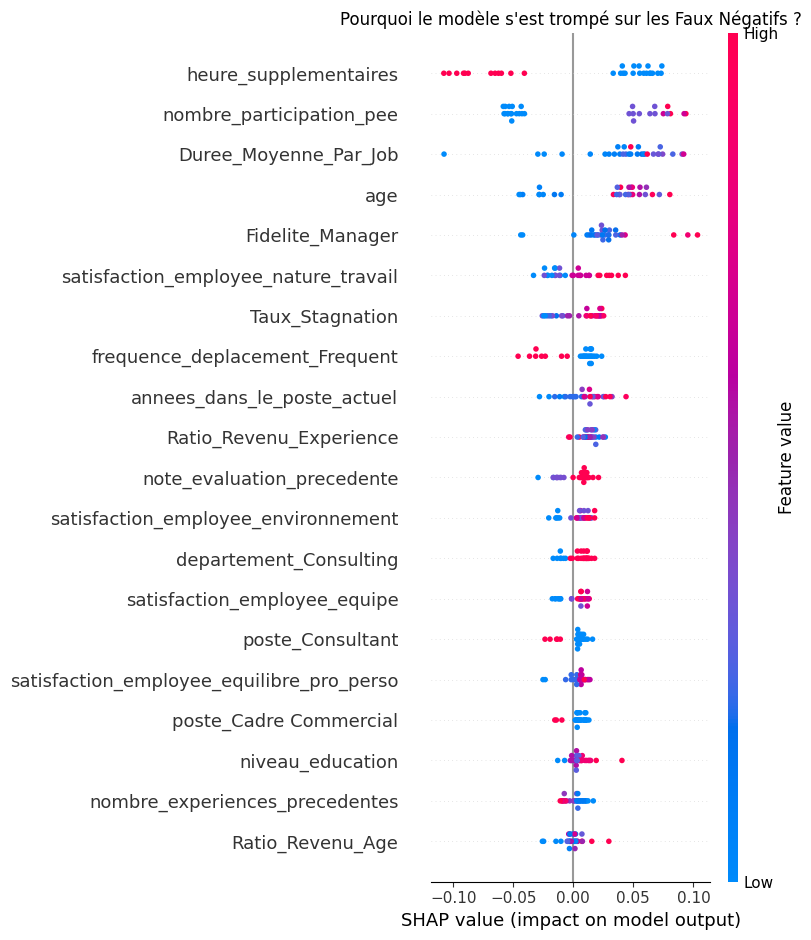

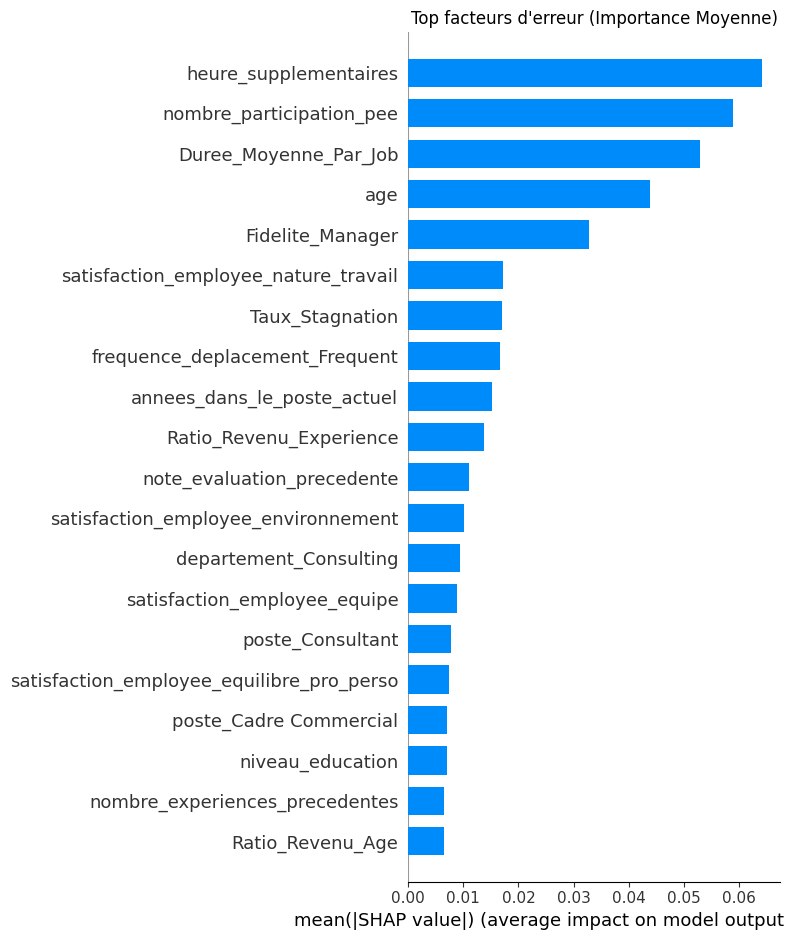

In [120]:
# 1. Le Beeswarm Plot (Le plus complet)
plt.figure(figsize=(10, 6))
plt.title("Pourquoi le modèle s'est trompé sur les Faux Négatifs ?")
shap.summary_plot(
    shap_values_fp,                 # Tes valeurs SHAP calculées (matrice numpy)
    X_test[faux_negatif_mask],     # Tes données (DataFrame) pour avoir les noms de colonnes et les couleurs
    show=False                      # Permet de modifier le titre ou la taille avant d'afficher
)
plt.show()

# 2. Le Bar Plot (Plus simple pour les slides de présentation)
# Il montre juste l'importance moyenne "globale" sur ce groupe
plt.figure(figsize=(10, 6))
plt.title("Top facteurs d'erreur (Importance Moyenne)")
shap.summary_plot(
    shap_values_fp, 
    X_test[faux_negatif_mask], 
    plot_type="bar",
    show=False
)
plt.show()

## Features Engineering : Ajout de context sur les Top features d'impact des False Positiv

La features top 1 source de faux positif est Duree_Moyenne_Par_Job (Job Hopping). Lui apporter un contexte pour aider le modele a determiner dans quel cas l'employé reste même si c'est un job hopper. Pour cela il faut combiner a Duree_Moyenne_Par_Job une features très puissante pour déterminer un true négativ mais avec une corrélation très faible avec Duree_Moyenne_Par_Job.

Plan d'action : 
- Identifier une top liste de features à très fort impact sur le true négatif
- verifier avec une heatmap qu'elle features a une corrélation très faible avec Duree_Moyenne_Par_Job
- Combiné Duree_Moyenne_Par_Job avec la features selectionné.

#### Identification des features à combiner

In [104]:
import pandas as pd
import numpy as np
import shap

# 1. Identifier les Vrais Négatifs (Ceux qui sont restés et que le modèle a bien prédit)
# Note : On s'intéresse à la classe 0 (Reste)
vrais_negatifs_mask = (y_pred == 0) & (y_test.values == 0)
X_vn = X_test[vrais_negatifs_mask]

# 2. Calculer les SHAP values pour ce groupe (vers la classe 0 "Reste")
# Attention : explainer.shap_values renvoie souvent [valeurs_classe_0, valeurs_classe_1]
shap_values_vn_all = explainer.shap_values(X_vn)

if isinstance(shap_values_vn_all, list):
    shap_values_vn_class0 = shap_values_vn_all[0] # Classe 0 = Reste
elif len(shap_values_vn_all.shape) == 3:
    shap_values_vn_class0 = shap_values_vn_all[:, :, 0] # Classe 0

# 3. Calculer l'impact moyen positif (Ce qui les a fait rester)
# On prend la moyenne des SHAP values (en gardant le signe pour voir si ça pousse vers 0 ou 1)
# Ici on veut ce qui pousse vers 0 (donc SHAP positif pour la classe 0)
mean_shap_impact = pd.Series(shap_values_vn_class0.mean(axis=0), index=X_vn.columns)
top_retention_drivers = mean_shap_impact.sort_values(ascending=False).head(10)

# 4. Vérifier la corrélation avec "Duree_Moyenne_Par_Job"
target_col = 'heure_supplementaires' # A modifier pour de nouvelles combinaison !
analysis_df = pd.DataFrame({
    'Impact_Retention (SHAP moyen)': top_retention_drivers,
    'Correlation_avec_JobHopping': X_vn[top_retention_drivers.index].corrwith(X_vn[target_col])
})

# 5. Afficher les meilleurs candidats (Fort Impact Rétention + Faible Corrélation)
print(f"--- Candidats pour interagir avec {target_col} ---")
# On cherche une corrélation faible (proche de 0)
analysis_df['Abs_Correlation'] = analysis_df['Correlation_avec_JobHopping'].abs()
best_candidates = analysis_df.sort_values('Abs_Correlation')

print(best_candidates[['Impact_Retention (SHAP moyen)', 'Correlation_avec_JobHopping']])

--- Candidats pour interagir avec heure_supplementaires ---
                                      Impact_Retention (SHAP moyen)  \
Taux_Stagnation                                            0.007311   
Fidelite_Manager                                           0.019770   
Ratio_Revenu_Age                                           0.005567   
Duree_Moyenne_Par_Job                                      0.034611   
annees_dans_le_poste_actuel                                0.009377   
nombre_participation_pee                                   0.023851   
age                                                        0.027316   
Ratio_Revenu_Experience                                    0.008056   
satisfaction_employee_nature_travail                       0.007218   
heure_supplementaires                                      0.028393   

                                      Correlation_avec_JobHopping  
Taux_Stagnation                                         -0.001645  
Fidelite_Manager      

On identifie nombre_participation_pee et heure_supplementaires comme indice fort et peu corrélé donc parfait candidat à créer en interaction

#### Combinaison des features

In [105]:
X_enhanced = X.copy()
# 1. L'Ancrage Financier (Job Hopper vs PEE)
# Logique : L'instabilité passée est annulée par l'investissement financier actuel
# On ajoute +1 pour éviter les multiplications par 0 si le PEE est vide
X_enhanced['Interaction_Stabilite_Financiere'] = X['Duree_Moyenne_Par_Job'] * (X['nombre_participation_pee'] + 1)

# 2. L'Engagement (Taux de Stagnation vs Heures Sup)
# 'heure_supplementaires' est binaire (0/1), c'est simple.
X_enhanced['Interaction_Stabilite_Engagement'] = X['Duree_Moyenne_Par_Job'] * (X['heure_supplementaires']+1)

# 2. L'Engagement (Age vs taux de fidélité manager)
# les deux metrics sont numérique continue
X_enhanced['Interaction_Age_Fidelité'] = X['age'] * X['Fidelite_Manager']
df_test = X_enhanced.copy()

df_test['a_quitte_l_entreprise'] = y

#### Visualisation du potentiel descriminant des features par rapport à la target

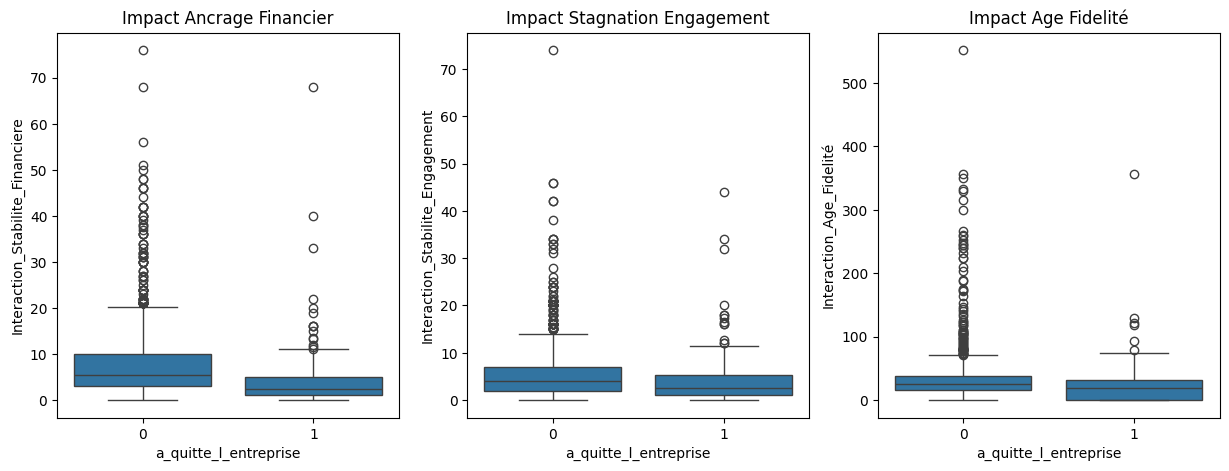

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# On regarde si notre nouvelle feature sépare bien ceux qui partent (1) de ceux qui restent (0)
sns.boxplot(data=df_test, x='a_quitte_l_entreprise', y='Interaction_Stabilite_Financiere', ax=ax[0])
ax[0].set_title("Impact Ancrage Financier")

sns.boxplot(data=df_test, x='a_quitte_l_entreprise', y='Interaction_Stabilite_Engagement', ax=ax[1])
ax[1].set_title("Impact Stagnation Engagement")

sns.boxplot(data=df_test, x='a_quitte_l_entreprise', y='Interaction_Age_Fidelité', ax=ax[2])
ax[2].set_title("Impact Age Fidelité")

plt.show()

In [107]:
# Vérifier si la moyenne est différente pour ceux qui restent vs ceux qui partent
check = df_test.groupby('a_quitte_l_entreprise')[['Interaction_Stabilite_Financiere', 'Interaction_Stabilite_Engagement', 'Interaction_Age_Fidelité']].mean()
print(check)

                       Interaction_Stabilite_Financiere  \
a_quitte_l_entreprise                                     
0                                               8.11316   
1                                               4.28953   

                       Interaction_Stabilite_Engagement  \
a_quitte_l_entreprise                                     
0                                              5.624272   
1                                              4.242313   

                       Interaction_Age_Fidelité  
a_quitte_l_entreprise                            
0                                     32.956877  
1                                     21.943427  


#### Test résultat prélimaire avec nouvelles features

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits

Meilleure configuration RandomForest :
  Paramètres : {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'n_estimators': 80}
  Best F1 score : 50.73%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       309
           1       0.34      0.46      0.39        59

    accuracy                           0.77       368
   macro avg       0.61      0.64      0.62       368
weighted avg       0.80      0.77      0.78       368



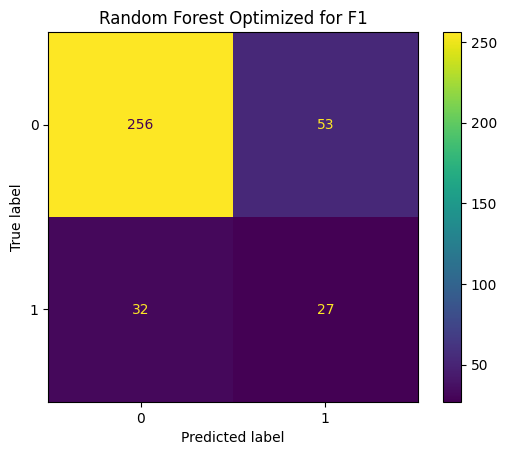

In [108]:
# Rappel : Il faut bien créer les V2 avant d'appeler la fonction
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_enhanced, # <--- C'est bien X_enhanced ici ?
    y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)
test_enhanced_rf = train_rf(X_train_v2, y_train_v2, X_test_v2, y_test_v2, log=False)

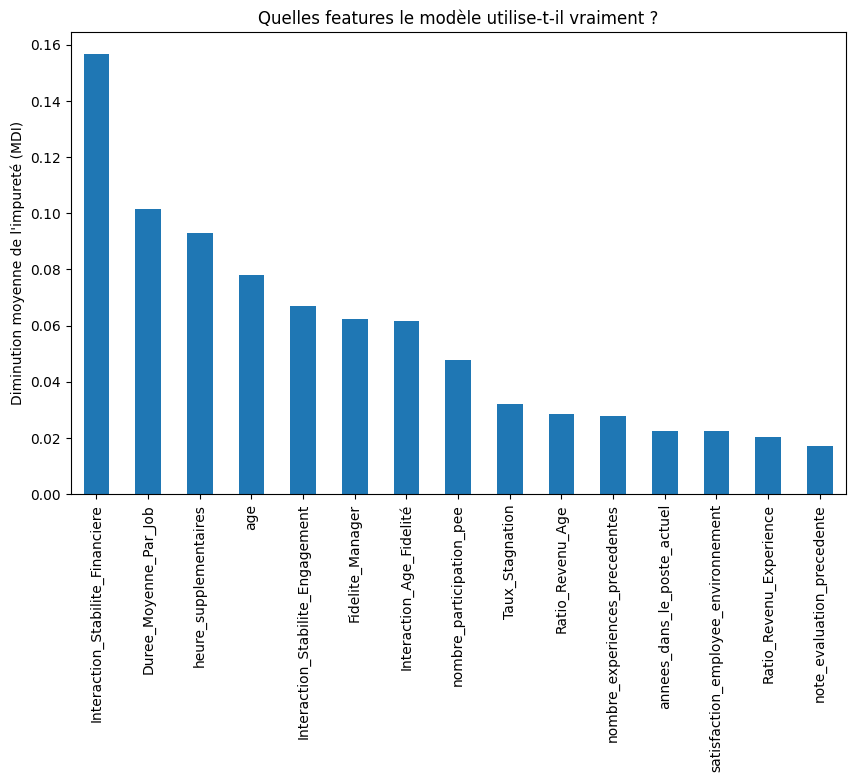

Interaction_Stabilite_Financiere             0.156666
Duree_Moyenne_Par_Job                        0.101404
heure_supplementaires                        0.093022
age                                          0.078005
Interaction_Stabilite_Engagement             0.067006
Fidelite_Manager                             0.062317
Interaction_Age_Fidelité                     0.061548
nombre_participation_pee                     0.047785
Taux_Stagnation                              0.032147
Ratio_Revenu_Age                             0.028605
nombre_experiences_precedentes               0.027896
annees_dans_le_poste_actuel                  0.022590
satisfaction_employee_environnement          0.022285
Ratio_Revenu_Experience                      0.020476
note_evaluation_precedente                   0.017132
satisfaction_employee_equilibre_pro_perso    0.016453
poste_Cadre Commercial                       0.013092
satisfaction_employee_nature_travail         0.012533
annees_depuis_la_derniere_pr

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Récupération des importances
importances = test_enhanced_rf.feature_importances_
feature_names = X_train_v2.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Affichage du Top 15
plt.figure(figsize=(10, 6))
forest_importances.head(15).plot.bar()
plt.title("Quelles features le modèle utilise-t-il vraiment ?")
plt.ylabel("Diminution moyenne de l'impureté (MDI)")
plt.show()
forest_importances

X test dataset = (1102, 44)
Ratio de déséquilibre (scale_pos_weight) : 5.19
Fitting 2 folds for each of 144 candidates, totalling 288 fits

Meilleure configuration XGBoost :
  Paramètres : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
  Best F1 score (CV) : 52.92%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       309
           1       0.49      0.61      0.54        59

    accuracy                           0.83       368
   macro avg       0.70      0.74      0.72       368
weighted avg       0.85      0.83      0.84       368



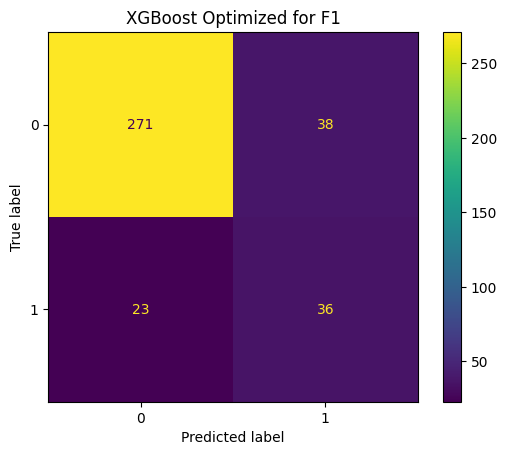

In [110]:
test_enhanced_xgb = train_xgb(X_train_v2, y_train_v2, X_test_v2, y_test_v2, log=False)

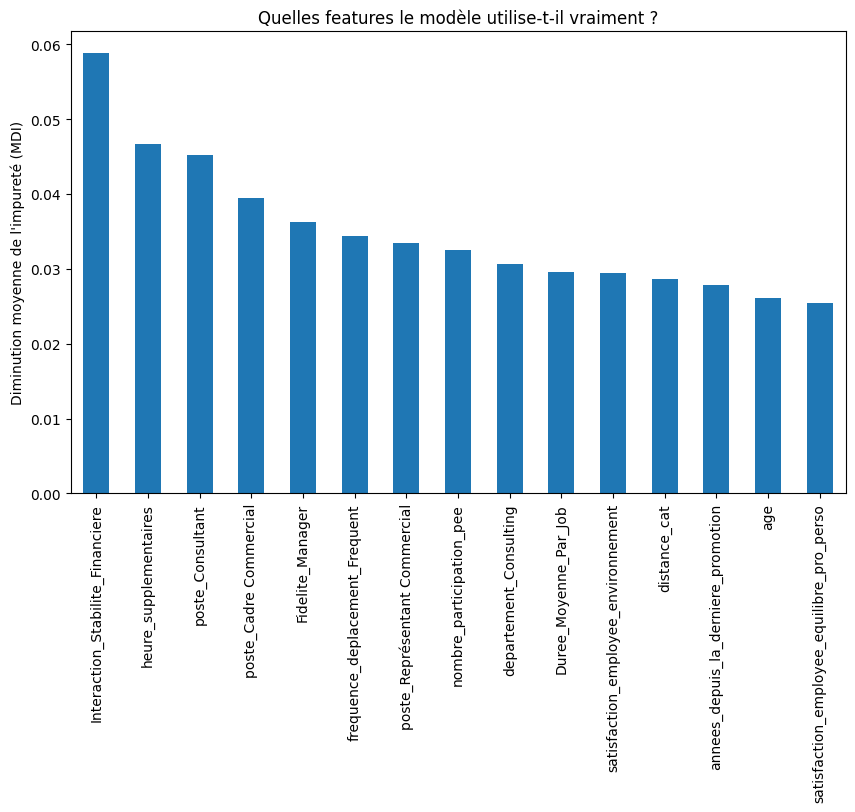

Interaction_Stabilite_Financiere             0.058774
heure_supplementaires                        0.046615
poste_Consultant                             0.045154
poste_Cadre Commercial                       0.039444
Fidelite_Manager                             0.036263
frequence_deplacement_Frequent               0.034352
poste_Représentant Commercial                0.033485
nombre_participation_pee                     0.032568
departement_Consulting                       0.030587
Duree_Moyenne_Par_Job                        0.029580
satisfaction_employee_environnement          0.029431
distance_cat                                 0.028680
annees_depuis_la_derniere_promotion          0.027898
age                                          0.026066
satisfaction_employee_equilibre_pro_perso    0.025411
domaine_etude_Infra & Cloud                  0.024121
satisfaction_employee_equipe                 0.024115
satisfaction_employee_nature_travail         0.024003
Taux_Stagnation             

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Récupération des importances
importances = test_enhanced_xgb.feature_importances_
feature_names = X_train_v2.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Affichage du Top 15
plt.figure(figsize=(10, 6))
forest_importances.head(15).plot.bar()
plt.title("Quelles features le modèle utilise-t-il vraiment ?")
plt.ylabel("Diminution moyenne de l'impureté (MDI)")
plt.show()
forest_importances

## Filtrage des features avec RandomForest & SHAP avec la méthode RFE 

In [112]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Calcul des SHAP values
print("Calcul des SHAP values en cours...")
explainer = shap.Explainer(best_xgb)
shap_values = explainer.shap_values(X)

# --- CORRECTION CRITIQUE DES DIMENSIONS ---
# On s'assure de ne garder que la matrice 2D correspondant à la Classe 1 (Démission)
if isinstance(shap_values, list):
    # Cas ancienne version : Liste de tableaux
    print("Format détecté : Liste")
    shap_values_class1 = shap_values[1]
elif len(shap_values.shape) == 3:
    # Cas nouvelle version : Array 3D (Samples, Features, Classes)
    print("Format détecté : 3D Array")
    shap_values_class1 = shap_values[:, :, 1]
else:
    # Cas rare : Déjà 2D (ex: régression ou binaire géré différemment)
    print("Format détecté : 2D Array")
    shap_values_class1 = shap_values

# Vérification de sécurité
if shap_values_class1.shape[1] != X.shape[1]:
    raise ValueError(f"Erreur dimensions : SHAP a trouvé {shap_values_class1.shape[1]} features, mais X en a {X.shape[1]}")

# 2. Création du DataFrame d'importance
shap_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_shap_mean': np.abs(shap_values_class1).mean(axis=0), # Moyenne de l'impact absolu
    'importance_shap_std': np.abs(shap_values_class1).std(axis=0)    # Stabilité de l'importance
})

# Trier par importance
shap_importance_sorted = shap_importance.sort_values('importance_shap_mean', ascending=True)

# 3. Affichage des résultats
print("\n=== 📉 TOP 10 Features les MOINS importantes (Candidats à la suppression) ===")
print(shap_importance_sorted.head(10)[['feature', 'importance_shap_mean']])

print("\n=== 📈 TOP 10 Features les PLUS importantes ===")
print(shap_importance_sorted.tail(10)[['feature', 'importance_shap_mean']])

# 4. Filtrage par seuil
seuil_importance = 0.0001 # Je l'ai baissé un peu par sécurité, à ajuster
features_inutiles = shap_importance_sorted[
    shap_importance_sorted['importance_shap_mean'] < seuil_importance
]['feature'].tolist()

print(f"\n🗑️ Features sous le seuil de {seuil_importance} : {len(features_inutiles)}")
print(f"Liste : {features_inutiles}")

# 5. Comparaison SHAP vs RandomForest Classic (Gini)
fi_classic = pd.DataFrame({
    'feature': X.columns,
    'importance_classic': best_rf.feature_importances_
})

# Fusion
comparaison = shap_importance_sorted.merge(fi_classic, on='feature')

# Calcul des rangs (1 = le moins important, N = le plus important)
comparaison['rang_shap'] = comparaison['importance_shap_mean'].rank(ascending=True)
comparaison['rang_classic'] = comparaison['importance_classic'].rank(ascending=True)

# L'écart de rang montre les désaccords entre les deux méthodes
comparaison['ecart_rang'] = abs(comparaison['rang_shap'] - comparaison['rang_classic'])

print("\n=== ⚔️ Conflits : Features où SHAP et Gini ne sont pas d'accord ===")
print(comparaison.sort_values('ecart_rang', ascending=False).head(10))

Calcul des SHAP values en cours...
Format détecté : 2D Array

=== 📉 TOP 10 Features les MOINS importantes (Candidats à la suppression) ===
                                  feature  importance_shap_mean
25        departement_Ressources Humaines              0.000000
31              poste_Ressources Humaines              0.000000
37      domaine_etude_Ressources Humaines              0.001607
33                        poste_Tech Lead              0.002814
34          domaine_etude_Entrepreunariat              0.003034
38  domaine_etude_Transformation Digitale              0.007306
9                note_evaluation_actuelle              0.007675
23                statut_marital_Marié(e)              0.007857
32                   poste_Senior Manager              0.008441
40      frequence_deplacement_Occasionnel              0.014231

=== 📈 TOP 10 Features les PLUS importantes ===
                                 feature  importance_shap_mean
4    satisfaction_employee_environnement      

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits

Meilleure configuration RandomForest :
  Paramètres : {'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'n_estimators': 14}
  Best F1 score : 52.14%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       309
           1       0.30      0.42      0.35        59

    accuracy                           0.75       368
   macro avg       0.59      0.62      0.60       368
weighted avg       0.79      0.75      0.77       368



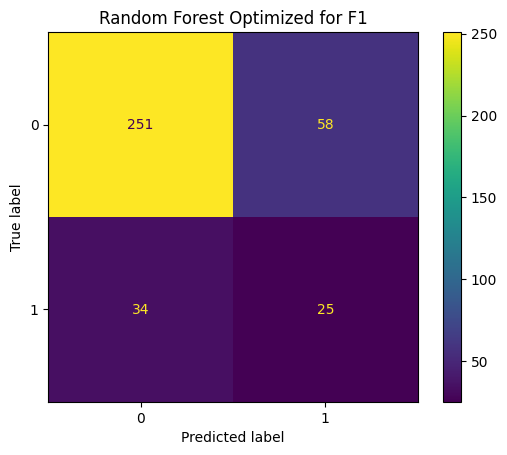

X test dataset = (1102, 42)
Ratio de déséquilibre (scale_pos_weight) : 5.19
Fitting 2 folds for each of 144 candidates, totalling 288 fits

Meilleure configuration XGBoost :
  Paramètres : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
  Best F1 score (CV) : 53.80%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       309
           1       0.53      0.49      0.51        59

    accuracy                           0.85       368
   macro avg       0.72      0.70      0.71       368
weighted avg       0.84      0.85      0.85       368



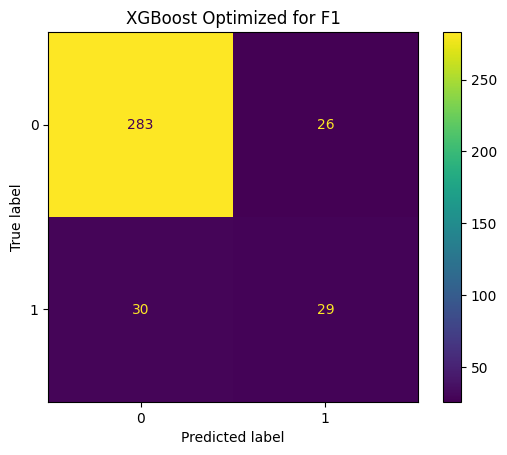

In [113]:
# 1. Liste des features identifiées comme "inutiles" par SHAP
features_to_drop = ['departement_Ressources Humaines','poste_Ressources Humaines']

# 2. Création des datasets réduits (Filtrage)
# On utilise 'errors=ignore' au cas où une colonne aurait déjà été supprimée ou renommée
X_train_v3 = X_train_v2.drop(columns=features_to_drop, errors='ignore')
X_test_v3 = X_test_v2.drop(columns=features_to_drop, errors='ignore')

test_enhanced_rf = train_rf(X_train_v3, y_train_v2, X_test_v3, y_test_v2, log=False)
test_enhanced_xgb = train_xgb(X_train_v3, y_train_v2, X_test_v3, y_test_v2, log=False)

X test dataset = (1102, 41)
Ratio de déséquilibre (scale_pos_weight) : 5.19
Fitting 2 folds for each of 144 candidates, totalling 288 fits

Meilleure configuration XGBoost :
  Paramètres : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
  Best F1 score (CV) : 52.75%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       309
           1       0.48      0.59      0.53        59

    accuracy                           0.83       368
   macro avg       0.70      0.74      0.71       368
weighted avg       0.85      0.83      0.84       368



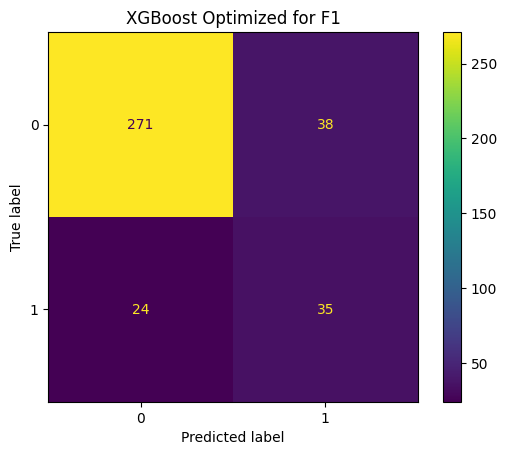

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits

Meilleure configuration RandomForest :
  Paramètres : {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'n_estimators': 80}
  Best F1 score : 49.87%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       309
           1       0.43      0.51      0.47        59

    accuracy                           0.81       368
   macro avg       0.67      0.69      0.68       368
weighted avg       0.83      0.81      0.82       368



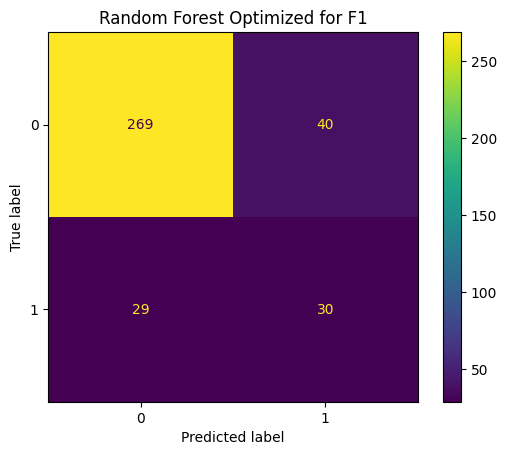

Lancement de la sélection récursive (ça peut prendre quelques minutes)...
Nombre optimal de features : 40
Meilleur F1-Score moyen atteint : 46.90%

--- Features Sélectionnées ---
['age', 'genre', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'statut_marital_Divorcé(e)', 'statut_marital_Marié(e)', 'departement_Consulting', 'poste_Cadre Commercial', 'poste_Consultant', 'poste_Directeur Technique', 'poste_Manager', 'poste_Représe

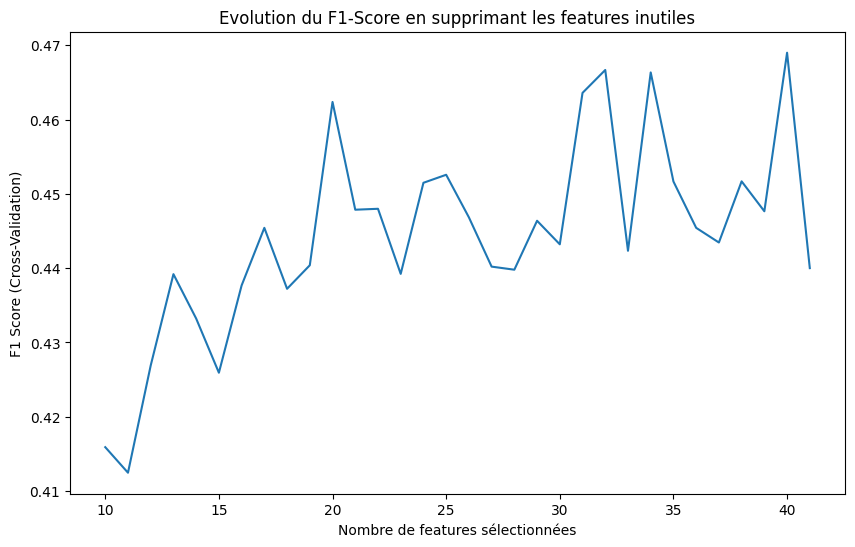

In [114]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# 1. Configuration du modèle (On garde celui qui marche bien)
xgb_selector = train_xgb(X_b_train, y_b_train, X_b_test, y_b_test, log=False)
rf_selector = train_rf(X_b_train, y_b_train, X_b_test, y_b_test, log=False)
# 2. Configuration du RFE avec Cross-Validation
# step=1 : On supprime 1 feature à chaque tour (c'est le plus précis)
# min_features_to_select=10 : On garde au moins 10 features de sécurité
# scoring='f1' : On optimise SPECIFIQUEMENT le F1-score (pas l'accuracy !)
rfecv = RFECV(
    estimator=rf_selector,
    step=1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=2,shuffle=True,random_state=42),
    min_features_to_select=10,
    n_jobs=-1
)

print("Lancement de la sélection récursive (ça peut prendre quelques minutes)...")
rfecv.fit(X_b_train, y_b_train)

# 3. Résultats
print(f"Nombre optimal de features : {rfecv.n_features_}")
print(f"Meilleur F1-Score moyen atteint : {max(rfecv.cv_results_['mean_test_score']):.2%}")

# 4. Quelles features ont survécu ?
features_retenues = X_b_train.columns[rfecv.support_]
print("\n--- Features Sélectionnées ---")
print(features_retenues.tolist())

# 5. Visualisation de la courbe de performance
plt.figure(figsize=(10, 6))
plt.xlabel("Nombre de features sélectionnées")
plt.ylabel("F1 Score (Cross-Validation)")
plt.plot(range(10, len(rfecv.cv_results_['mean_test_score']) + 10), rfecv.cv_results_['mean_test_score'])
plt.title("Evolution du F1-Score en supprimant les features inutiles")
plt.show()

# 6. Création des nouveaux X réduits "Safe"
X_train_final = X_b_train[features_retenues]
X_test_final = X_b_test[features_retenues]

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits

Meilleure configuration RandomForest :
  Paramètres : {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'n_estimators': 80}
  Best F1 score : 51.00%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       309
           1       0.41      0.59      0.48        59

    accuracy                           0.80       368
   macro avg       0.66      0.71      0.68       368
weighted avg       0.83      0.80      0.81       368



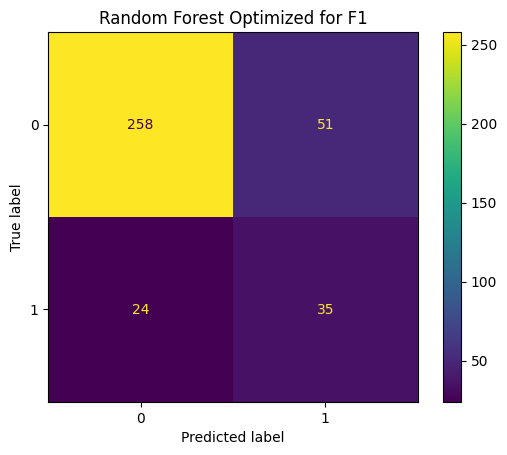

X test dataset = (1102, 40)
Ratio de déséquilibre (scale_pos_weight) : 5.19
Fitting 2 folds for each of 144 candidates, totalling 288 fits

Meilleure configuration XGBoost :
  Paramètres : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
  Best F1 score (CV) : 52.95%

--- Sur le jeu TEST ---
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       309
           1       0.50      0.44      0.47        59

    accuracy                           0.84       368
   macro avg       0.70      0.68      0.69       368
weighted avg       0.83      0.84      0.84       368



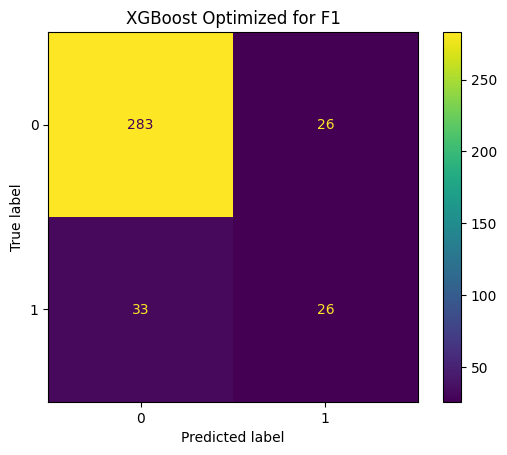

In [115]:
test_enhanced_rf = train_rf(X_train_final, y_b_train, X_test_final, y_b_test, log=False)
test_enhanced_xgb = train_xgb(X_train_final, y_b_train, X_test_final, y_b_test, log=False)

## SMOTE (Synthetic Minority Over-sampling Technique)

In [116]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report

# 1. On définit la stratégie SMOTE
# sampling_strategy=0.5 signifie : "Augmente la classe minoritaire pour qu'elle atteigne 50% de la taille de la majoritaire"
# (Souvent mieux que 1.0 qui peut créer trop de bruit)
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# 2. On crée un Pipeline "SMOTE -> Modèle"
# L'avantage du Pipeline imblearn : il n'applique SMOTE que pendant le FIT (train), jamais pendant le PREDICT (test).
pipeline_smote = IMBPipeline([
    ('smote', smote),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))
])

# 3. Entraînement sur le TRAIN set uniquement (v2 contient tes interactions)
print("Entraînement avec SMOTE en cours...")
pipeline_smote.fit(X_b_train, y_b_train)

# 4. Évaluation sur le TEST set (qui reste pur, sans fausses données)
y_pred_smote = pipeline_smote.predict(X_b_test)

print("--- RÉSULTATS AVEC SMOTE ---")
print(classification_report(y_b_test, y_pred_smote))

# Comparaison rapide avec le modèle sans SMOTE (mais avec class_weight)
rf_balanced = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
rf_balanced.fit(X_b_train, y_b_train)
print("\n--- RÉSULTATS SANS SMOTE (Class Weight) ---")
print(classification_report(y_b_test, rf_balanced.predict(X_b_test)))

Entraînement avec SMOTE en cours...
--- RÉSULTATS AVEC SMOTE ---
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       309
           1       0.46      0.19      0.27        59

    accuracy                           0.83       368
   macro avg       0.66      0.57      0.59       368
weighted avg       0.80      0.83      0.80       368


--- RÉSULTATS SANS SMOTE (Class Weight) ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       309
           1       0.48      0.36      0.41        59

    accuracy                           0.83       368
   macro avg       0.68      0.64      0.66       368
weighted avg       0.82      0.83      0.82       368



🏆 Meilleur seuil trouvé : 0.55
📈 F1-Score correspondant : 52.89%
   (Rappel : 54.24% | Précision : 51.61%)


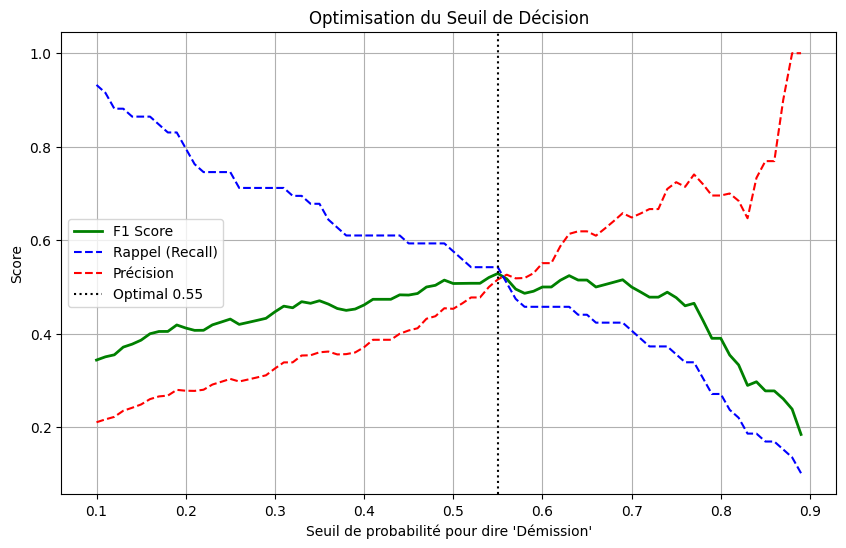

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# 1. On reprend ton MEILLEUR modèle (XGBoost sur X_enhanced)
# Recalcul du ratio pour XGBoost
ratio = float(np.sum(y_train_v2 == 0)) / np.sum(y_train_v2 == 1)

model_final = best_xgb
model_final.fit(X_train_v2, y_train_v2)

# 2. On prédit les PROBABILITÉS (pas juste 0 ou 1)
# La colonne [:, 1] contient la probabilité de "Démission" (Classe 1)
y_probs = model_final.predict_proba(X_test_v2)[:, 1]

# 3. On teste tous les seuils de 10% à 90%
seuils = np.arange(0.1, 0.9, 0.01)
scores_f1 = []
scores_recall = []
scores_precision = []

for t in seuils:
    # Si proba > t, on prédit 1, sinon 0
    preds_t = (y_probs >= t).astype(int)
    scores_f1.append(f1_score(y_test_v2, preds_t))
    scores_recall.append(recall_score(y_test_v2, preds_t))
    scores_precision.append(precision_score(y_test_v2, preds_t))

# 4. Trouver le meilleur seuil
best_idx = np.argmax(scores_f1)
best_threshold = seuils[best_idx]
best_score = scores_f1[best_idx]

print(f"🏆 Meilleur seuil trouvé : {best_threshold:.2f}")
print(f"📈 F1-Score correspondant : {best_score:.2%}")
print(f"   (Rappel : {scores_recall[best_idx]:.2%} | Précision : {scores_precision[best_idx]:.2%})")

# 5. Visualisation
plt.figure(figsize=(10, 6))
plt.plot(seuils, scores_f1, label='F1 Score', color='green', linewidth=2)
plt.plot(seuils, scores_recall, label='Rappel (Recall)', color='blue', linestyle='--')
plt.plot(seuils, scores_precision, label='Précision', color='red', linestyle='--')
plt.axvline(best_threshold, color='black', linestyle=':', label=f'Optimal {best_threshold:.2f}')
plt.title("Optimisation du Seuil de Décision")
plt.xlabel("Seuil de probabilité pour dire 'Démission'")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Sur le jeu TEST ---")
threshold_xgb = train_xgb(X_b_train,y_b_train,X_b_test, y_b_test)
y_pred = best_xgb.predict_proba(X_b_test)[:, 1]
preds_t = (y_probs >= 0.55).astype(int)

print(classification_report(y_test_v2, preds_t))


--- Sur le jeu TEST ---


ValueError: feature_names mismatch: ['age', 'genre', 'nombre_experiences_precedentes', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'Ratio_Revenu_Experience', 'Ratio_Revenu_Age', 'Taux_Stagnation', 'Fidelite_Manager', 'Duree_Moyenne_Par_Job', 'distance_cat', 'statut_marital_Divorcé(e)', 'statut_marital_Marié(e)', 'departement_Consulting', 'departement_Ressources Humaines', 'poste_Cadre Commercial', 'poste_Consultant', 'poste_Directeur Technique', 'poste_Manager', 'poste_Représentant Commercial', 'poste_Ressources Humaines', 'poste_Senior Manager', 'poste_Tech Lead', 'domaine_etude_Entrepreunariat', 'domaine_etude_Infra & Cloud', 'domaine_etude_Marketing', 'domaine_etude_Ressources Humaines', 'domaine_etude_Transformation Digitale', 'frequence_deplacement_Frequent', 'frequence_deplacement_Occasionnel', 'Interaction_Stabilite_Financiere', 'Interaction_Stabilite_Engagement', 'Interaction_Age_Fidelité'] ['age', 'genre', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'statut_marital_Divorcé(e)', 'statut_marital_Marié(e)', 'departement_Consulting', 'departement_Ressources Humaines', 'poste_Cadre Commercial', 'poste_Consultant', 'poste_Directeur Technique', 'poste_Manager', 'poste_Représentant Commercial', 'poste_Ressources Humaines', 'poste_Senior Manager', 'poste_Tech Lead', 'domaine_etude_Entrepreunariat', 'domaine_etude_Infra & Cloud', 'domaine_etude_Marketing', 'domaine_etude_Ressources Humaines', 'domaine_etude_Transformation Digitale', 'frequence_deplacement_Frequent', 'frequence_deplacement_Occasionnel']
expected Ratio_Revenu_Age, Taux_Stagnation, Interaction_Stabilite_Financiere, Interaction_Stabilite_Engagement, Fidelite_Manager, Ratio_Revenu_Experience, Duree_Moyenne_Par_Job, distance_cat, Interaction_Age_Fidelité in input data
training data did not have the following fields: annee_experience_totale, niveau_hierarchique_poste, revenu_mensuel, annees_dans_l_entreprise, distance_domicile_travail, annes_sous_responsable_actuel